In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')



<div align="center"><h2>Column name changing</h2></div>

In [2]:
df=pd.read_csv("Dataset.csv")

In [3]:
df

school sex address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F       U     GT3       A     4   4.0   at_home   teacher   
1       GP   F       U     GT3       T     1   1.0   at_home     other   
2       GP   F       U     LE3       T     1   1.0   at_home     other   
3       GP   F       U     GT3       T     4   2.0    health  services   
4       GP   F       U     GT3       T     3   3.0     other     other   
..     ...  ..     ...     ...     ...   ...   ...       ...       ...   
644     MS   F       R     GT3       T     2   3.0  services     other   
645     MS   F       U     LE3       T     3   1.0   teacher  services   
646     MS   F       U     GT3       T     1   1.0     other     other   
647     MS   M       U     LE3       T     3   1.0  services  services   
648     MS   M       R     LE3       T     3   2.0  services     other   

     reason guardian  traveltime  failures schoolsup famsup paid activities  \
0    course   mother         2.0         0       yes     no   no         no   
1    course   father         NaN         0        no    yes   no         no   
2     other   mother         1.0         0       yes     no   no         no   
3      home   mother         1.0         0        no    yes   no        yes   
4      home   father         1.0         0        no    yes   no         no   
..      ...      ...         ...       ...       ...    ...  ...        ...   
644  course   mother         1.0         1        no     no   no        yes   
645  course   mother         1.0         0        no    yes   no         no   
646  course   mother         2.0         0        no     no   no        yes   
647  course   mother         2.0         0        no     no   no         no   
648  course   mother         3.0         0        no     no   no         no   

    nursery higher internet  famrel  freetime  goout  Dalc  health  absences  \
0       yes    yes       no       4       3.0      4     1       3       4.0   
1        no    yes      yes       5       3.0      3     1       3       2.0   
2       yes    yes      yes       4       3.0      2     2       3       6.0   
3       yes    yes      yes       3       2.0      2     1       5       0.0   
4       yes    yes       no       4       3.0      2     1       5       0.0   
..      ...    ...      ...     ...       ...    ...   ...     ...       ...   
644      no    yes      yes       5       4.0      2     1       5       4.0   
645     yes    NaN      yes       4       NaN      4     1       1       NaN   
646     yes    yes       no       1       1.0      1     1       5       6.0   
647      no    yes      yes       2       4.0      5     3       2       6.0   
648      no    NaN      yes       4       4.0      1     3       5       4.0   

     G1    G2  G3  Feature_1  Feature_2  Feature_3 romantic  
0     0  11.0  11       18.0        2.0        1.0       no  
1     9  11.0  11       17.0        2.0        1.0       no  
2    12  13.0  12       15.0        NaN        3.0       no  
3    14  14.0  14       15.0        3.0        1.0      yes  
4    11  13.0  13       16.0        NaN        2.0       no  
..   ..   ...  ..        ...        ...        ...      ...  
644  10  11.0  10       19.0        3.0        2.0       no  
645  15  15.0  16       18.0        2.0        1.0       no  
646  11  12.0   9       18.0        NaN        1.0       no  
647  10  10.0  10        NaN        1.0        4.0       no  
648  10  11.0  11       18.0        1.0        4.0       no  

[649 rows x 33 columns]

In [4]:
df["Feature_1"].describe()

count    611.000000
mean      16.747954
std        1.216812
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: Feature_1, dtype: float64

In [5]:
df["Feature_1"].isna().sum()

np.int64(38)

In [6]:
df["Feature_1"].value_counts()

Feature_1
17.0    170
16.0    169
18.0    130
15.0    103
19.0     30
20.0      6
21.0      2
22.0      1
Name: count, dtype: int64

<Axes: xlabel='Feature_1', ylabel='count'>

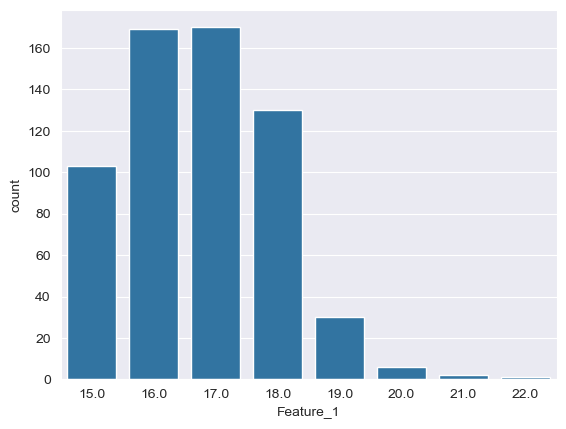

In [7]:
sns.barplot(df["Feature_1"].value_counts())

In [8]:
pd.DataFrame(df["Feature_2"].value_counts()).sort_index()

count
Feature_2       
1.0          204
2.0          279
3.0           88
4.0           32

<Axes: xlabel='Feature_2', ylabel='count'>

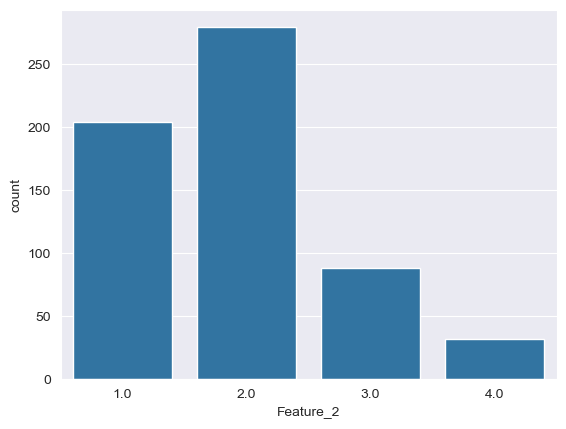

In [9]:
sns.barplot(df["Feature_2"].value_counts())

<Axes: xlabel='Feature_3', ylabel='count'>

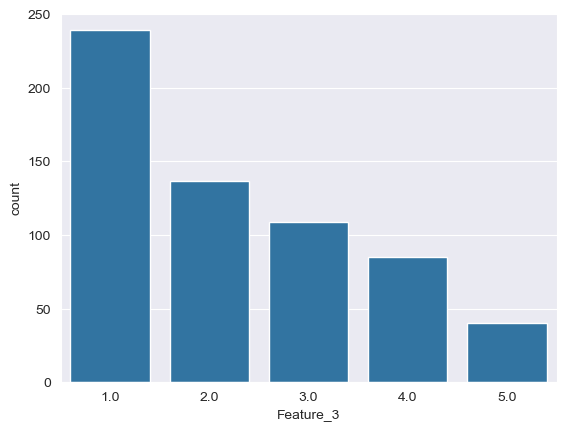

In [10]:
sns.barplot(df["Feature_3"].value_counts())

Column renaming

In [11]:
df.rename(columns={'famsize':'family_size', 'Pstatus':'parent_status', 'Medu':'mother_education', 'Fedu':'father_education', 'Mjob':'mother_job', 'Fjob':'father_job','reason':'school_reason','traveltime':'travel_time','schoolsup':'school_extra_support','famsup':'family_education_support','paid':'extra_classes','activities':'extra_activities','nursery':'attended_nursery','higher':'higher_education','internet':'home_internet','famrel':'family_relation_quality','freetime':'free_time','goout':'friends_hangout_frequency','Dalc':'weekday_alcohol_consumption','health':'health_status','absences':'absence_count','G1':'term_1_grade','G2':'term_2_grade','G3':'final_grade'}, inplace=True)

In [12]:
df

school sex address family_size parent_status  mother_education  \
0       GP   F       U         GT3             A                 4   
1       GP   F       U         GT3             T                 1   
2       GP   F       U         LE3             T                 1   
3       GP   F       U         GT3             T                 4   
4       GP   F       U         GT3             T                 3   
..     ...  ..     ...         ...           ...               ...   
644     MS   F       R         GT3             T                 2   
645     MS   F       U         LE3             T                 3   
646     MS   F       U         GT3             T                 1   
647     MS   M       U         LE3             T                 3   
648     MS   M       R         LE3             T                 3   

     father_education mother_job father_job school_reason guardian  \
0                 4.0    at_home    teacher        course   mother   
1                 1.0    at_home      other        course   father   
2                 1.0    at_home      other         other   mother   
3                 2.0     health   services          home   mother   
4                 3.0      other      other          home   father   
..                ...        ...        ...           ...      ...   
644               3.0   services      other        course   mother   
645               1.0    teacher   services        course   mother   
646               1.0      other      other        course   mother   
647               1.0   services   services        course   mother   
648               2.0   services      other        course   mother   

     travel_time  failures school_extra_support family_education_support  \
0            2.0         0                  yes                       no   
1            NaN         0                   no                      yes   
2            1.0         0                  yes                       no   
3            1.0         0                   no                      yes   
4            1.0         0                   no                      yes   
..           ...       ...                  ...                      ...   
644          1.0         1                   no                       no   
645          1.0         0                   no                      yes   
646          2.0         0                   no                       no   
647          2.0         0                   no                       no   
648          3.0         0                   no                       no   

    extra_classes extra_activities attended_nursery higher_education  \
0              no               no              yes              yes   
1              no               no               no              yes   
2              no               no              yes              yes   
3              no              yes              yes              yes   
4              no               no              yes              yes   
..            ...              ...              ...              ...   
644            no              yes               no              yes   
645            no               no              yes              NaN   
646            no              yes              yes              yes   
647            no               no               no              yes   
648            no               no               no              NaN   

    home_internet  family_relation_quality  free_time  \
0              no                        4        3.0   
1             yes                        5        3.0   
2             yes                        4        3.0   
3             yes                        3        2.0   
4              no                        4        3.0   
..            ...                      ...        ...   
644           yes                        5        4.0   
645           yes                        4        NaN   
646            no              

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   school                       649 non-null    object 
 1   sex                          649 non-null    object 
 2   address                      649 non-null    object 
 3   family_size                  599 non-null    object 
 4   parent_status                649 non-null    object 
 5   mother_education             649 non-null    int64  
 6   father_education             576 non-null    float64
 7   mother_job                   649 non-null    object 
 8   father_job                   649 non-null    object 
 9   school_reason                649 non-null    object 
 10  guardian                     649 non-null    object 
 11  travel_time                  576 non-null    float64
 12  failures                     649 non-null    int64  
 13  school_extra_support

In [14]:
binarydict={'yes':1,'no':0}

create df2 to store some columns with yes no as 0 an 1

In [15]:
df2=df.copy()   #df2 to store columns with binary value as 0 and 1

In [16]:
df2['school_extra_support'].map(binarydict)

0      1
1      0
2      1
3      0
4      0
      ..
644    0
645    0
646    0
647    0
648    0
Name: school_extra_support, Length: 649, dtype: int64

In [17]:
target_obj_cols=['school_extra_support','family_education_support','extra_classes','extra_activities','attended_nursery','higher_education','home_internet','romantic']

In [18]:
for i in target_obj_cols:
    df2[i]=df2[i].map(binarydict)

In [19]:
df2

school sex address family_size parent_status  mother_education  \
0       GP   F       U         GT3             A                 4   
1       GP   F       U         GT3             T                 1   
2       GP   F       U         LE3             T                 1   
3       GP   F       U         GT3             T                 4   
4       GP   F       U         GT3             T                 3   
..     ...  ..     ...         ...           ...               ...   
644     MS   F       R         GT3             T                 2   
645     MS   F       U         LE3             T                 3   
646     MS   F       U         GT3             T                 1   
647     MS   M       U         LE3             T                 3   
648     MS   M       R         LE3             T                 3   

     father_education mother_job father_job school_reason guardian  \
0                 4.0    at_home    teacher        course   mother   
1                 1.0    at_home      other        course   father   
2                 1.0    at_home      other         other   mother   
3                 2.0     health   services          home   mother   
4                 3.0      other      other          home   father   
..                ...        ...        ...           ...      ...   
644               3.0   services      other        course   mother   
645               1.0    teacher   services        course   mother   
646               1.0      other      other        course   mother   
647               1.0   services   services        course   mother   
648               2.0   services      other        course   mother   

     travel_time  failures  school_extra_support  family_education_support  \
0            2.0         0                     1                         0   
1            NaN         0                     0                         1   
2            1.0         0                     1                         0   
3            1.0         0                     0                         1   
4            1.0         0                     0                         1   
..           ...       ...                   ...                       ...   
644          1.0         1                     0                         0   
645          1.0         0                     0                         1   
646          2.0         0                     0                         0   
647          2.0         0                     0                         0   
648          3.0         0                     0                         0   

     extra_classes  extra_activities  attended_nursery  higher_education  \
0                0                 0                 1               1.0   
1                0                 0                 0               1.0   
2                0                 0                 1               1.0   
3                0                 1                 1               1.0   
4                0                 0                 1               1.0   
..             ...               ...               ...               ...   
644              0                 1                 0               1.0   
645              0                 0                 1               NaN   
646              0                 1                 1               1.0   
647              0                 0                 0               1.0   
648              0                 0                 0               NaN   

     home_internet  family_relation_quality  free_time  \
0                0                        4        3.0   
1                1                        5        3.0   
2                1                        4        3.0   
3                1                        3        2.0   
4                0                        4        3.0   
..             ...                      ...        ...   
644              1                        5        4.0   
645     

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   school                       649 non-null    object 
 1   sex                          649 non-null    object 
 2   address                      649 non-null    object 
 3   family_size                  599 non-null    object 
 4   parent_status                649 non-null    object 
 5   mother_education             649 non-null    int64  
 6   father_education             576 non-null    float64
 7   mother_job                   649 non-null    object 
 8   father_job                   649 non-null    object 
 9   school_reason                649 non-null    object 
 10  guardian                     649 non-null    object 
 11  travel_time                  576 non-null    float64
 12  failures                     649 non-null    int64  
 13  school_extra_support

<div align="center"><h2>Missing Feature identification</h2></div>

<Axes: >

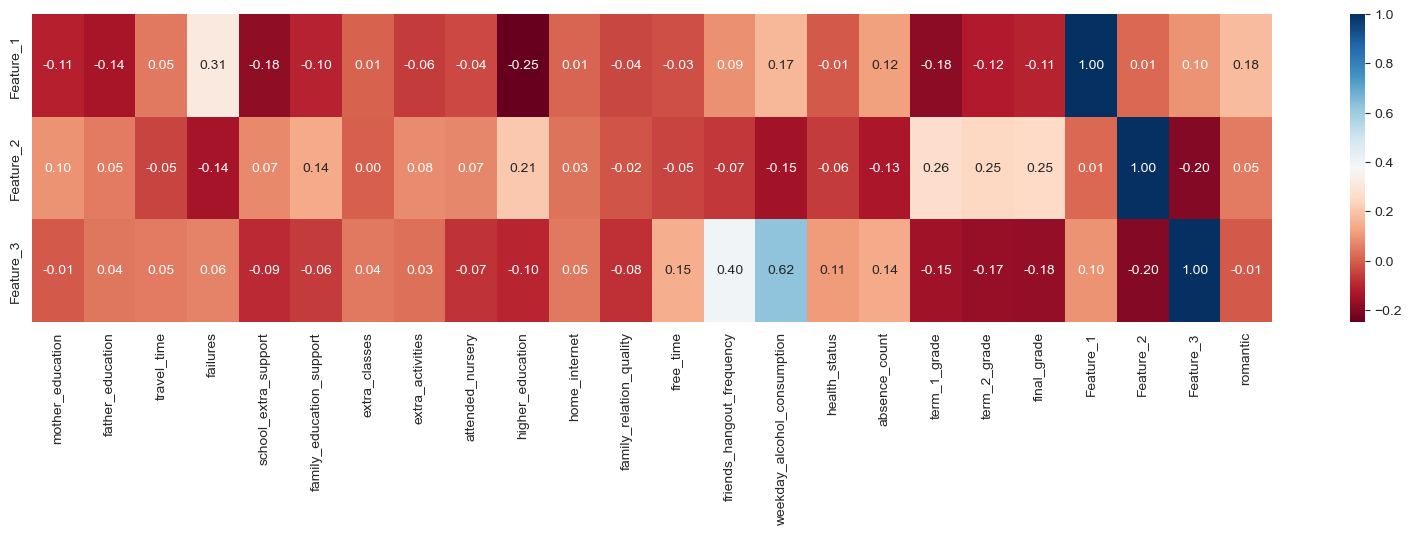

In [21]:
plt.figure(figsize=(20,4))
sns.heatmap(df2.select_dtypes(np.number).corr().iloc[-4:-1,:],annot=True,cmap='RdBu',fmt='.2f')

In [22]:
px.box(df,x='Feature_1',y='failures')

<h3>Feature 1 has positive correlation with the number of failures and the value of feature_1 is in the range of the ages of the secondary school students so if we assume that the feature_1 is age then with increasing age the number of failures is increasing which is very evident that's why the feature one is the AGE of the students</h3>

In [23]:
px.box(df,x='Feature_2',y='final_grade')

In [24]:
px.box(df,x='Feature_2',y='term_1_grade')

In [25]:
px.box(df,x='Feature_2',y='term_2_grade')

In [26]:
px.violin(df2,y='final_grade',x='Feature_2').update_layout(width=1500,height=1000).show()

<h3>Feature_2 and positive correlation with grades and preference for higher studies.So this feature is indicating more studious students.So this feature can be a measure on some scale of STUDIOUSNESS of students or how much THEY STUDY</h3>

In [27]:
px.box(df,x='Feature_3',y='weekday_alcohol_consumption').update_layout(width=1000, height=800).show()

In [28]:
px.box(df,x='Feature_3',y='friends_hangout_frequency').update_layout(width=1000, height=800).show()

Feature_3 has strong Positive correlation with weekday alcohol consumption and friends hang out frequency,so this feature is indicative of some type the social activeness of the student.It might be related to the parting nature of the students.It can also be the weakend alcohol consumption as that column is not there.It may be the tendency of the student to go to in some scale.So Feature_3 is WEEKEND ALCOHOL CONSUMPTION OR PARTYING FREQUENCY

<DIV ALIGN="CENTER"><H2>Handling missing values

In [29]:
pd.DataFrame(df.isna().sum())[pd.DataFrame(df.isna().sum())[0]!=0] 


0
family_size       50
father_education  73
travel_time       73
higher_education  76
free_time         45
absence_count     69
term_2_grade      35
Feature_1         38
Feature_2         46
Feature_3         39

In [30]:
df['family_size'].value_counts()

family_size
GT3    424
LE3    175
Name: count, dtype: int64

<h3>Father education

In [31]:
df[df['father_education'].isnull()]

school sex address family_size parent_status  mother_education  \
11      GP   F       U         GT3             T                 2   
32      GP   M       R         GT3             T                 4   
47      GP   M       U         GT3             T                 4   
51      GP   F       U         LE3             T                 4   
56      GP   F       U         GT3             A                 4   
57      GP   M       U         GT3             T                 4   
69      GP   F       R         LE3             T                 3   
74      GP   F       U         GT3             T                 3   
88      GP   M       U         GT3             T                 2   
96      GP   M       R         GT3             T                 4   
102     GP   M       U         GT3             T                 4   
115     GP   M       U         GT3             T                 4   
132     GP   F       U         LE3             A                 2   
143     GP   F       U         GT3             A                 3   
144     GP   F       R         GT3             T                 1   
165     GP   F       R         GT3             T                 3   
170     GP   F       R         GT3             T                 1   
182     GP   F       U         GT3             T                 2   
185     GP   M       U         GT3             T                 1   
190     GP   F       U         GT3             T                 2   
192     GP   M       R         GT3             T                 4   
193     GP   M       U         GT3             T                 4   
198     GP   F       U         GT3             T                 3   
200     GP   M       U         GT3             T                 1   
203     GP   M       R         GT3             T                 1   
204     GP   F       U         GT3             T                 2   
212     GP   F       U         GT3             T                 4   
223     GP   F       R         GT3             T                 4   
229     GP   F       U         LE3             T                 3   
233     GP   F       U         GT3             T                 2   
236     GP   F       U         GT3             T                 2   
245     GP   M       R         GT3             T                 2   
246     GP   M       U         GT3             T                 4   
253     GP   F       U         NaN             A                 2   
275     GP   F       U         GT3             T                 2   
276     GP   M       U         GT3             T                 2   
280     GP   M       R         LE3             T                 3   
283     GP   M       U         GT3             T                 3   
295     GP   M       U         LE3             A                 4   
301     GP   M       U         GT3             T                 4   
306     GP   M       R         LE3             A                 3   
313     GP   F       U         LE3             T                 1   
319     GP   M       U         GT3             T                 4   
343     GP   F       U         GT3             T                 4   
351     GP   M       U         GT3             A                 3   
362     GP   F       U         GT3             T                 4   
372     GP   F       U         GT3             T                 2   
379     GP   M       R         NaN             T                 2   
408     GP   M       U         LE3             T                 2   
418     GP   M       R         GT3             T                 2   
420     GP   F       U         LE3             A                 2   
431     MS   F       R         GT3             T                 3   
436     MS   F       R         LE3             T                 1   
437     MS   F       R         GT3             T                 0   
447     MS   M       R         GT3             T                 2   
497     MS   M       U         GT3             T                 3   
529     MS   F

<Axes: >

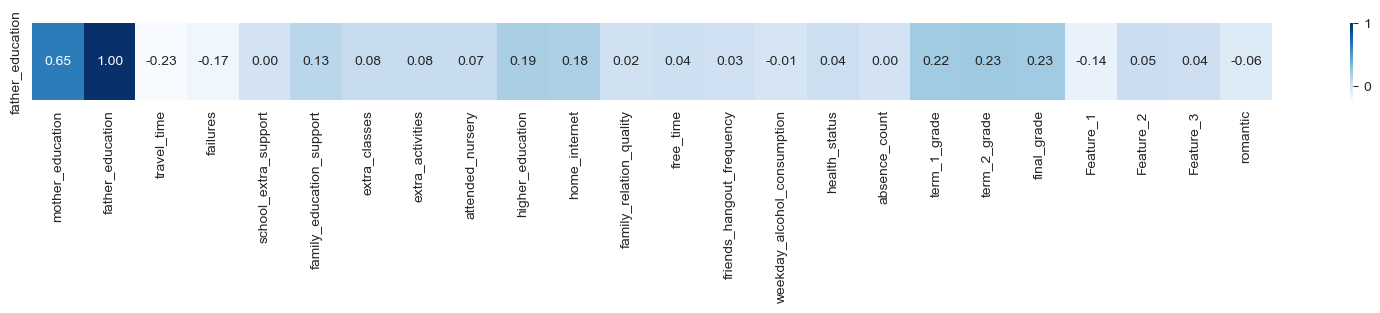

In [32]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['father_education']],annot=True,fmt='.2f',cmap='Blues')

In [33]:
df[df['father_education'].isnull()]['parent_status'].value_counts()

parent_status
T    62
A    11
Name: count, dtype: int64

In [34]:
px.box(df,x='father_education',y='mother_education')

<Axes: xlabel='father_education', ylabel='count'>

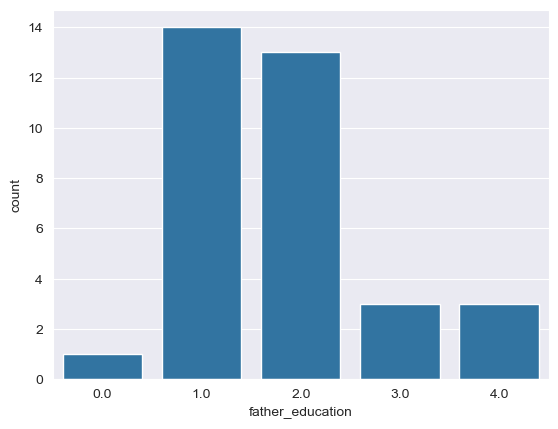

In [35]:
sns.barplot(df[df['father_job']=='at_home'].father_education.value_counts())

<Axes: xlabel='mother_education', ylabel='count'>

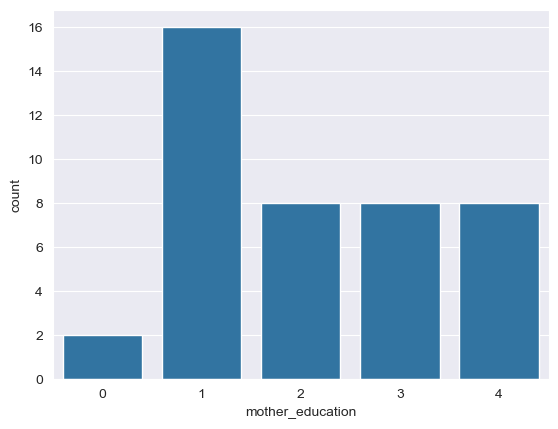

In [36]:
sns.barplot(df[df['father_job']=='at_home'].mother_education.value_counts())

In [37]:
(df[df['father_job']=='at_home'].mother_job.value_counts())

mother_job
at_home     18
other       14
services     7
teacher      2
health       1
Name: count, dtype: int64

In [38]:
df[df['father_job']=='at_home'][df['mother_job']=='at_home'][df['mother_education']==1].shape[0]


11

<Axes: >

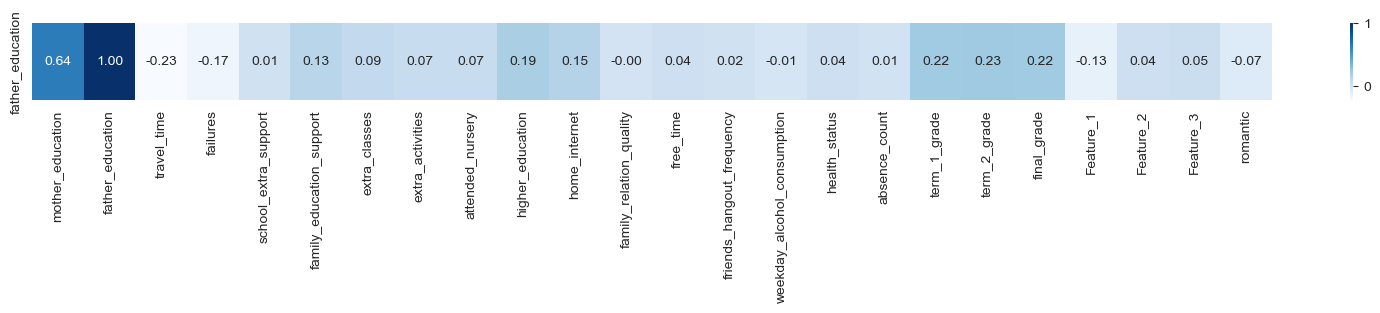

In [39]:
plt.figure(figsize=(20,1))
sns.heatmap(df2[df2['father_job']!='at_home'].select_dtypes(np.number).corr().loc[['father_education']],annot=True,fmt='.2f',cmap='Blues')


In [ ]:
df[df['father_education'].isnull()].guardian.value_counts()

guardian
mother    55
father    13
other      5
Name: count, dtype: int64

In [41]:
df2.loc[(df2['father_job']=='at_home') & (df2['father_education'].isnull()),'father_education']=1

In [42]:
df.loc[(df['father_job']=='at_home') & (df['father_education'].isnull()),'father_education']=1

In [43]:
df2[df2['father_job']=='at_home'][df2['father_education'].isnull()].shape[0]

0

In [44]:
df[df['father_job']=='at_home'][df['father_education'].isnull()].shape[0]

0

In [45]:
df['father_education'].fillna(df['mother_education'],axis=0,inplace=True)

In [46]:
df2['father_education'].fillna(df2['mother_education'],axis=0,inplace=True)

In [47]:
df['father_education'].isna().sum()

np.int64(0)

<h3>Term_2_grade

<Axes: >

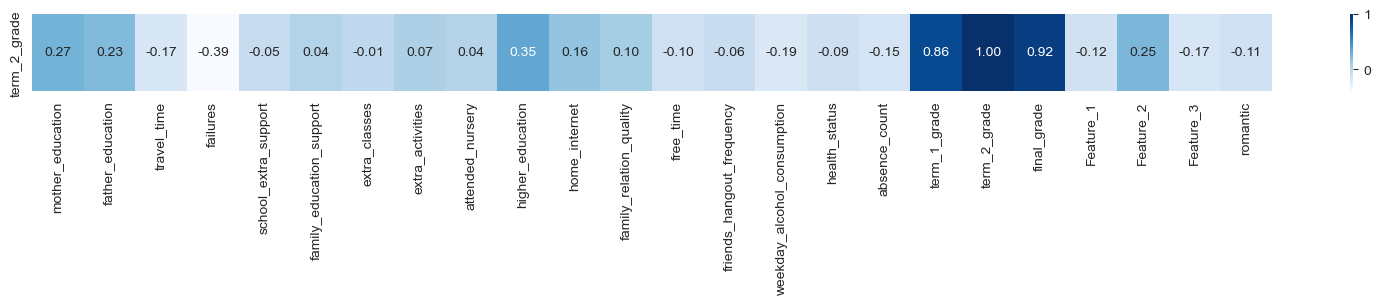

In [48]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['term_2_grade']],annot=True,fmt='.2f',cmap='Blues')

In [49]:
df2.term_1_grade.describe()

count    649.000000
mean      11.399076
std        2.745265
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: term_1_grade, dtype: float64

In [50]:
df2.final_grade.describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: final_grade, dtype: float64

In [51]:
term2missing=df[df['term_2_grade'].isnull()].index.to_list()

In [52]:
df.term_2_grade.fillna((df.term_1_grade+df.final_grade)/2,inplace=True)

In [53]:
df2.term_2_grade.fillna((df2.term_1_grade+df2.final_grade)/2,inplace=True)

In [54]:
df.loc[term2missing,['term_1_grade','term_2_grade','final_grade']]

term_1_grade  term_2_grade  final_grade
26             11          11.5           12
39             14          13.0           12
55             12          12.0           12
60             17          16.5           16
63             14          13.5           13
89              9           9.5           10
126            10          10.5           11
137            13          12.0           11
140            10          10.0           10
157            11          10.5           10
168             7           7.5            8
170            11          11.0           11
232            12          12.5           13
327            17          17.5           18
350             9          10.0           11
379            11          10.5           10
396            16          16.5           17
411            12          13.5           15
426            10          10.5           11
427            16          16.5           17
444             9          10.0           11
457            10          10.5           11
458            13          13.0           13
474            10          10.5           11
494             8           8.5            9
505            11          11.0           11
508            10           9.5            9
577            10          10.5           11
585             8           8.0            8
586             8           4.0            0
590             7           7.0            7
607            11          11.5           12
618            16          15.5           15
621            13          13.0           13
622             8           8.5            9

<h3>Absence count

<Axes: >

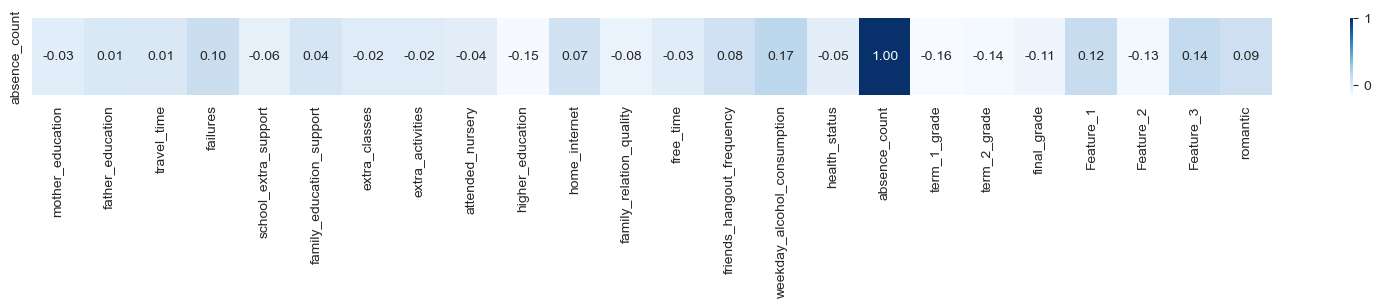

In [55]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['absence_count']],annot=True,fmt='.2f',cmap='Blues')

In [56]:
df.absence_count.describe()

count    580.000000
mean       3.746552
std        4.732890
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absence_count, dtype: float64

<Axes: xlabel='absence_count', ylabel='count'>

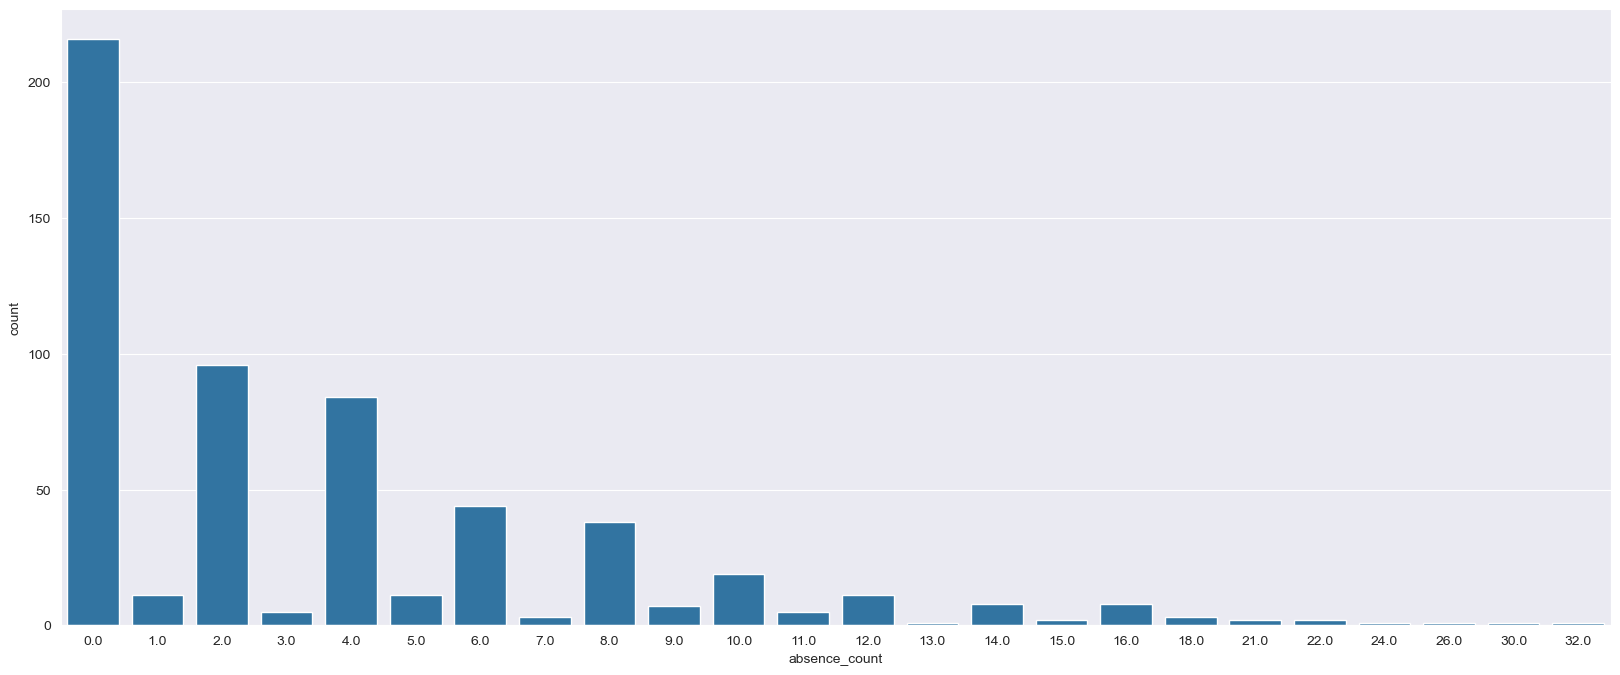

In [57]:
plt.figure(figsize=(20,8))
sns.barplot(df.absence_count.value_counts())

In [58]:
df[df['absence_count']>6].shape[0]

113

<Axes: >

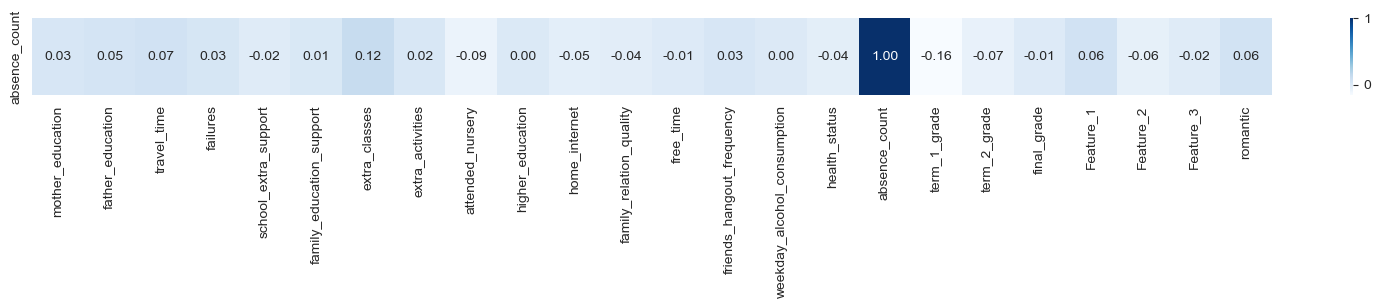

In [59]:
plt.figure(figsize=(20,1))
sns.heatmap(df2[df2['absence_count']<6].select_dtypes(np.number).corr().loc[['absence_count']],annot=True,fmt='.2f',cmap='Blues')

In [60]:
px.box(df2,x='health_status',y='absence_count')

In [61]:
df2.groupby('health_status')['absence_count'].median()

health_status
1    3.5
2    2.0
3    2.0
4    2.0
5    2.0
Name: absence_count, dtype: float64

In [62]:
df[df.health_status==1]['absence_count'].isna().sum()

np.int64(8)

In [63]:
df.loc[df.health_status==1 & df.absence_count.isna(),'absence_count']=3
df2.loc[df2.health_status==1 & df2.absence_count.isna(),'absence_count']=3

In [64]:
df.absence_count.fillna(2,inplace=True)
df2.absence_count.fillna(2,inplace=True)

In [65]:
df.absence_count.isna().sum()

np.int64(0)

<h3>Feature_1

<Axes: >

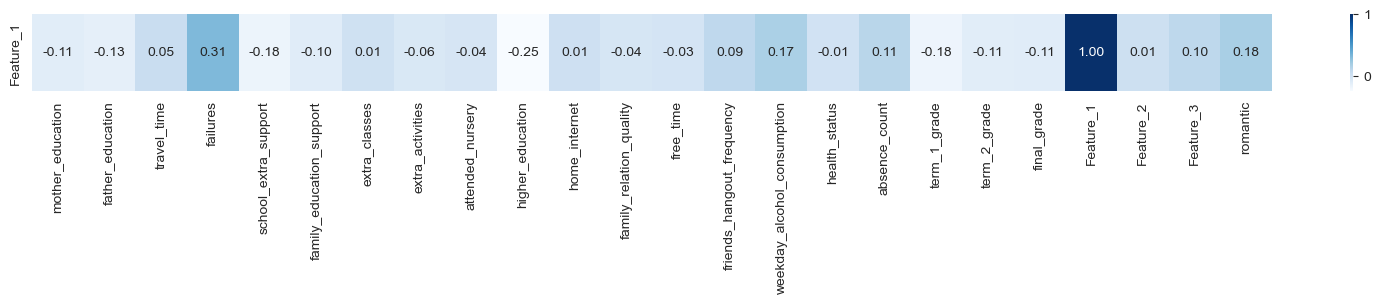

In [66]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['Feature_1']],annot=True,fmt='.2f',cmap='Blues')

In [67]:
px.box(df,x='failures',y='Feature_1')

In [68]:
px.violin(df,x='failures',y='Feature_1')

In [69]:
df[df.failures>=2]

school sex address family_size parent_status  mother_education  \
18      GP   M       U         GT3             T                 3   
78      GP   M       U         GT3             T                 2   
127     GP   F       U         GT3             T                 0   
131     GP   F       U         GT3             T                 2   
146     GP   M       U         LE3             T                 1   
163     GP   M       U         LE3             T                 1   
169     GP   M       R         LE3             T                 1   
170     GP   F       R         GT3             T                 1   
173     GP   M       U         LE3             T                 1   
175     GP   M       R         GT3             T                 3   
179     GP   M       U         GT3             T                 3   
237     GP   M       U         NaN             T                 2   
279     GP   M       U         GT3             T                 3   
284     GP   M       U         GT3             T                 2   
351     GP   M       U         GT3             A                 3   
370     GP   F       U         LE3             A                 1   
407     GP   F       U         LE3             T                 4   
413     GP   M       R         LE3             T                 1   
478     MS   F       R         GT3             T                 1   
487     MS   F       R         LE3             A                 3   
543     MS   M       R         GT3             T                 4   
552     MS   M       U         GT3             T                 1   
557     MS   F       R         NaN             T                 3   
568     MS   M       U         GT3             T                 3   
569     MS   M       U         GT3             T                 3   
571     MS   M       U         GT3             T                 2   
572     MS   F       U         GT3             A                 3   
581     MS   F       U         GT3             A                 1   
590     MS   F       U         GT3             T                 1   
610     MS   F       R         GT3             A                 1   

     father_education mother_job father_job school_reason guardian  \
18                2.0   services   services        course   mother   
78                1.0      other      other          home   mother   
127               1.0    at_home      other        course    other   
131               1.0   services      other    reputation   mother   
146               1.0   services      other        course   mother   
163               1.0      other      other        course   mother   
169               2.0      other      other    reputation   mother   
170               1.0    at_home      other        course   mother   
173               2.0     health   services        course   mother   
175               2.0      other      other        course   mother   
179               2.0   services   services        course   mother   
237               2.0      other      other          home   mother   
279               1.0   services   services         other   mother   
284               1.0   services   services         other   mother   
351               3.0   services      other        course    other   
370               1.0      other      other        course    other   
407               4.0      other      other    reputation    other   
413               1.0    at_home      other        course    other   
478               1.0    at_home      other        course   father   
487               2.0      other      other        course    other   
543               4.0     health      other        course   father   
552               1.0      other      other         other   mother   
557               1.0      other      other        course   mother   
568               2.0    at_home   services        course   mother   
569               3.0    at_home    at_home        course   mother   
571          

In [70]:
(df[df.Feature_1.isna()].failures.value_counts())

failures
0    34
3     2
2     1
1     1
Name: count, dtype: int64

In [71]:
df[df.failures==0].Feature_1.describe()

count    515.000000
mean      16.580583
std        1.106583
min       15.000000
25%       16.000000
50%       17.000000
75%       17.000000
max       20.000000
Name: Feature_1, dtype: float64

In [72]:
df[df.failures==1].Feature_1.describe()

count    69.000000
mean     17.478261
std       1.267335
min      15.000000
25%      17.000000
50%      17.000000
75%      18.000000
max      20.000000
Name: Feature_1, dtype: float64

In [73]:
df[df.failures==2].Feature_1.describe()

count    15.000000
mean     18.266667
std       1.624221
min      16.000000
25%      17.500000
50%      18.000000
75%      19.000000
max      21.000000
Name: Feature_1, dtype: float64

In [74]:
df[df.failures==3].Feature_1.describe()

count    12.000000
mean     17.833333
std       1.585923
min      16.000000
25%      17.000000
50%      17.000000
75%      18.250000
max      22.000000
Name: Feature_1, dtype: float64

In [75]:
df.loc[((df.failures==0) | (df.failures==1)) & df.Feature_1.isna(),'Feature_1']=17
df2.loc[((df2.failures==0) | (df2.failures==1)) & df2.Feature_1.isna(),'Feature_1']=17
df.loc[((df.failures==2) | (df.failures==3)) & df.Feature_1.isna(),'Feature_1']=18
df2.loc[((df2.failures==3) | (df2.failures==2)) & df2.Feature_1.isna(),'Feature_1']=18


In [76]:
df2.Feature_1.isna().sum()

np.int64(0)

In [77]:
df[df.Feature_1.isna()].failures.value_counts()

Series([], Name: count, dtype: int64)

<h3>Higher Education

In [78]:
df2[df2['higher_education'].isnull()]

school sex address family_size parent_status  mother_education  \
8       GP   M       U         LE3             A                 3   
10      GP   F       U         GT3             T                 4   
15      GP   F       U         GT3             T                 4   
16      GP   F       U         NaN             T                 4   
25      GP   F       U         GT3             T                 2   
26      GP   M       U         GT3             T                 2   
28      GP   M       U         LE3             A                 3   
30      GP   M       U         GT3             T                 4   
44      GP   F       U         LE3             T                 2   
46      GP   F       U         LE3             A                 3   
52      GP   M       U         LE3             A                 4   
55      GP   F       U         GT3             A                 2   
57      GP   M       U         GT3             T                 4   
64      GP   F       U         LE3             T                 4   
92      GP   F       U         LE3             T                 3   
96      GP   M       R         GT3             T                 4   
114     GP   M       R         NaN             T                 2   
122     GP   F       U         LE3             T                 2   
123     GP   M       U         GT3             T                 4   
128     GP   M       R         GT3             T                 4   
143     GP   F       U         GT3             A                 3   
147     GP   F       U         GT3             T                 4   
159     GP   F       U         GT3             T                 1   
184     GP   M       U         GT3             T                 3   
192     GP   M       R         GT3             T                 4   
193     GP   M       U         GT3             T                 4   
196     GP   F       U         GT3             T                 2   
199     GP   M       U         GT3             T                 3   
204     GP   F       U         GT3             T                 2   
208     GP   M       U         NaN             T                 2   
227     GP   M       U         GT3             T                 2   
232     GP   F       U         GT3             T                 2   
246     GP   M       U         GT3             T                 4   
261     GP   F       R         GT3             T                 2   
267     GP   M       U         LE3             T                 4   
269     GP   M       U         LE3             T                 4   
270     GP   M       U         GT3             T                 4   
281     GP   M       U         GT3             T                 0   
290     GP   F       U         GT3             T                 2   
300     GP   F       U         GT3             T                 4   
306     GP   M       R         LE3             A                 3   
313     GP   F       U         LE3             T                 1   
345     GP   F       U         LE3             A                 4   
348     GP   F       U         GT3             T                 4   
352     GP   M       R         GT3             T                 3   
373     GP   F       R         LE3             T                 2   
385     GP   F       U         GT3             T                 2   
406     GP   F       U         GT3             T                 3   
414     GP   F       R         GT3             T                 1   
419     GP   M       U         NaN             T                 2   
454     MS   F       U         GT3             T                 1   
456     MS   F       U         GT3             T                 1   
461     MS   F       R         GT3             T                 1   
470     MS   F       R         GT3             T                 3   
485     MS   F       R         GT3             T                 2   
487     MS   F       R         LE3             A                 3   
492     MS   F

In [79]:
df2.higher_education.value_counts()

higher_education
1.0    509
0.0     64
Name: count, dtype: int64

<Axes: >

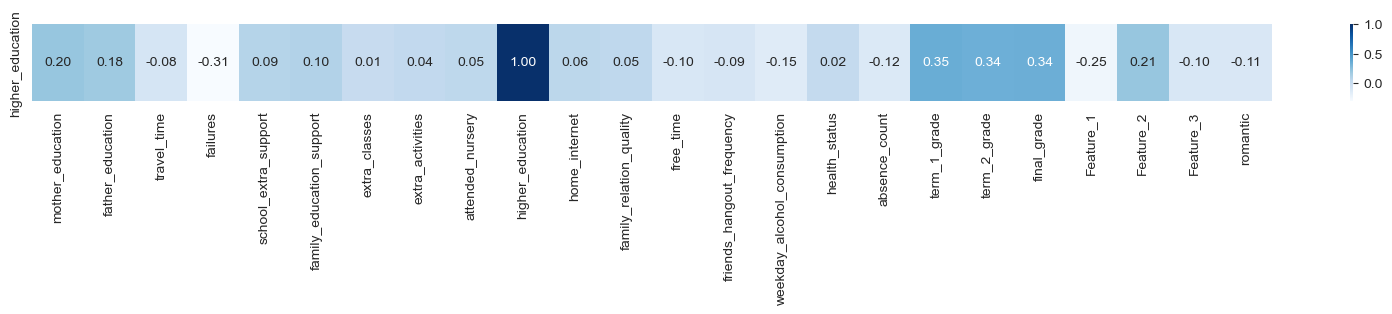

In [80]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['higher_education']],annot=True,fmt='.2f',cmap='Blues')

In [81]:
px.violin(df2,x='higher_education',y='final_grade')

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
train_cols=['failures','term_1_grade','term_2_grade','final_grade','Feature_1','Feature_2','father_education','mother_education','health_status','family_education_support','weekday_alcohol_consumption','friends_hangout_frequency','absence_count']

In [84]:
X=df2[df2.higher_education.notnull()][train_cols].copy()
Y=df2[df2.higher_education.notnull()].higher_education.copy()

In [85]:
Y.isna().sum()

np.int64(0)

In [86]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

In [87]:
model=RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,n_jobs=-1)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=42)

In [88]:
model.score(X_train,Y_train)

0.9890829694323144

In [89]:
model.score(X_val,Y_val)

0.9304347826086956

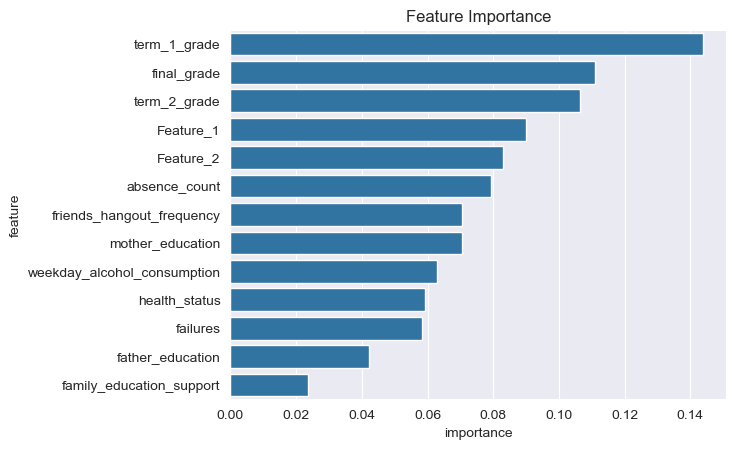

In [90]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature')
plt.show()

In [91]:
X_target=df2[df2.higher_education.isnull()][train_cols].copy()

predictions=model.predict(X_target)
df2.loc[df2.higher_education.isnull(),'higher_education']=predictions

In [92]:
df2.higher_education.isna().sum()

np.int64(0)

In [93]:
binarydict2={1:'yes',0:'no'}

In [94]:
predictions_2=pd.DataFrame(predictions)[0].map(binarydict2)

In [95]:
df.higher_education.isna().sum()

np.int64(76)

In [96]:
df.loc[df.higher_education.isnull(),'higher_education']=predictions_2.tolist()

In [97]:
df.higher_education.isna().sum()

np.int64(0)

<h3>Feature_3

<Axes: >

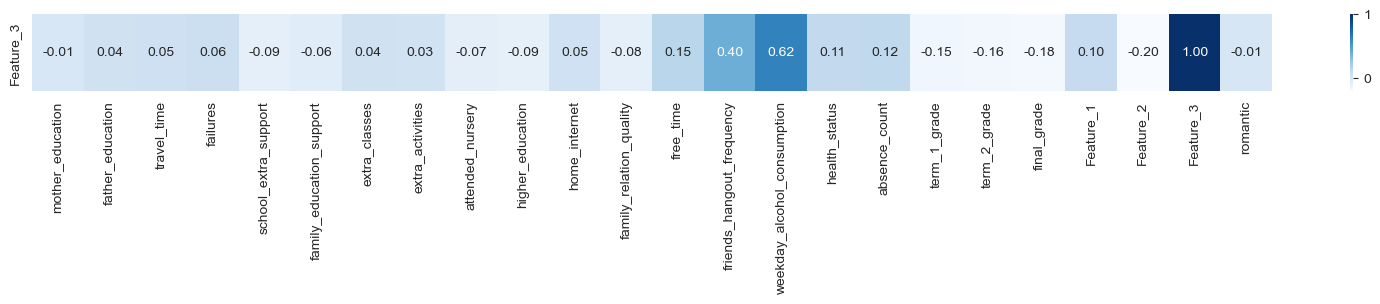

In [98]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['Feature_3']],annot=True,fmt='.2f',cmap='Blues')

In [99]:
df2[df2.Feature_3.isnull()].weekday_alcohol_consumption.value_counts()

weekday_alcohol_consumption
1    24
2     8
3     4
4     2
5     1
Name: count, dtype: int64

In [100]:
df2[df2.Feature_3.isnull()].friends_hangout_frequency.value_counts()

friends_hangout_frequency
5    10
2    10
3     9
4     7
1     3
Name: count, dtype: int64

In [101]:
train_cols=['friends_hangout_frequency','weekday_alcohol_consumption']

In [102]:
X=df2[df2.Feature_3.notnull()][train_cols].copy()
Y=df2[df2.Feature_3.notnull()].Feature_3.copy()

In [103]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

In [104]:
model=RandomForestClassifier(n_estimators=20,max_depth=5,random_state=42,n_jobs=-1)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, n_jobs=-1, random_state=42)

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import root_mean_squared_error

In [106]:
root_mean_squared_error(model.predict(X_train),Y_train)

1.1398159184135184

In [107]:
root_mean_squared_error(model.predict(X_val),Y_val)

1.238057706751144

In [108]:
(model.predict(X_train)-Y_train).value_counts()

Feature_3
 0.0    261
-1.0    119
-2.0     45
 1.0     26
-3.0     23
 2.0      9
 3.0      2
-4.0      2
 4.0      1
Name: count, dtype: int64

In [109]:
(model.predict(X_val)-Y_val).value_counts()

Feature_3
 0.0    61
-1.0    25
-2.0    20
 1.0     8
-3.0     5
 2.0     1
-4.0     1
 3.0     1
Name: count, dtype: int64

In [110]:
accuracy_score(model.predict(X_val),Y_val)

0.5

In [111]:
pre=(X_val.iloc[:,0]+X_val.iloc[:,1])/2


In [112]:
root_mean_squared_error(np.round(pre),Y_val)

1.1235190616839632

In [113]:
(model.predict(X_val)==Y_val).value_counts()

Feature_3
False    61
True     61
Name: count, dtype: int64

In [114]:
(model.predict(X_val)-Y_val).value_counts()

Feature_3
 0.0    61
-1.0    25
-2.0    20
 1.0     8
-3.0     5
 2.0     1
-4.0     1
 3.0     1
Name: count, dtype: int64

In [115]:
(np.round(pre)-Y_val).value_counts()

 1.0    42
 0.0    34
-1.0    29
-2.0     8
 2.0     6
-3.0     3
Name: count, dtype: int64

In [116]:
pre2=(X_train.iloc[:,0]+X_train.iloc[:,1])/2

In [117]:
(np.round(pre2)-Y_train).value_counts()

 1.0    172
 0.0    168
-1.0    101
-2.0     27
 2.0     17
 3.0      2
-3.0      1
Name: count, dtype: int64

In [118]:
df2.Feature_3.fillna((df2.weekday_alcohol_consumption+df2.friends_hangout_frequency)/2,inplace=True)
df.Feature_3.fillna((df.weekday_alcohol_consumption+df.friends_hangout_frequency)/2,inplace=True)


In [119]:
df2.Feature_3=np.round(df2.Feature_3)
df.Feature_3=np.round(df.Feature_3)

<h3>Feature_2

In [120]:
pd.DataFrame(df.isna().sum())[pd.DataFrame(df.isna().sum())[0]!=0]


0
family_size  50
travel_time  73
free_time    45
Feature_2    46

<Axes: >

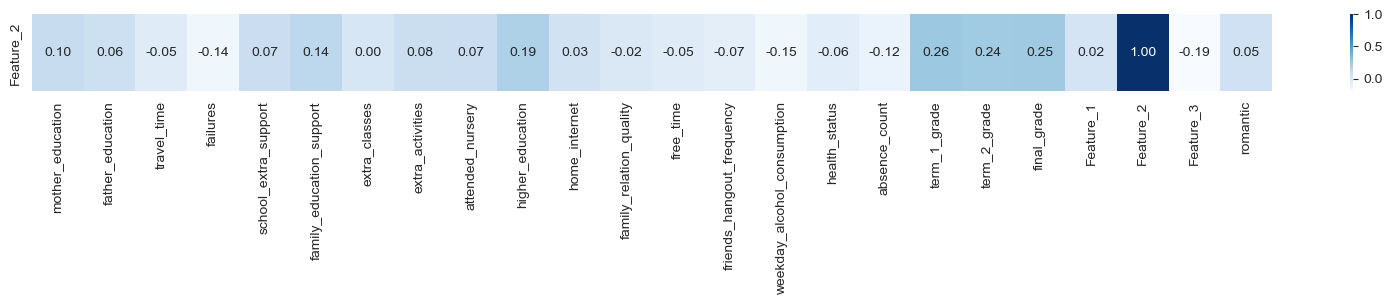

In [121]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['Feature_2']],annot=True,fmt='.2f',cmap='Blues')

In [122]:
train_cols=['term_1_grade','term_2_grade','final_grade','weekday_alcohol_consumption','friends_hangout_frequency','extra_classes','extra_activities']

In [123]:
X=df2[df2.Feature_2.notnull()][train_cols].copy()
Y=df2[df2.Feature_2.notnull()].Feature_2.copy()

In [124]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

In [125]:
model=RandomForestClassifier(n_estimators=450,max_depth=8,random_state=42,n_jobs=-1)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=8, n_estimators=450, n_jobs=-1,
                       random_state=42)

In [126]:
print(model.score(X_train,Y_train),model.score(X_val,Y_val))

0.7655601659751037 0.4793388429752066


In [127]:
print(root_mean_squared_error(model.predict(X_train),Y_train),root_mean_squared_error(model.predict(X_val),Y_val))


0.59213377427656 0.9136250564655355


In [128]:
(model.predict(X_val)-Y_val).value_counts()

Feature_2
 0.0    58
-1.0    28
 1.0    24
-2.0     9
-3.0     1
 2.0     1
Name: count, dtype: int64

In [129]:
(model.predict(X_train)-Y_train).value_counts()

Feature_2
 0.0    369
-1.0     48
 1.0     48
-2.0     16
-3.0      1
Name: count, dtype: int64

In [130]:
a=model.predict(df2[df2.Feature_2.isnull()][train_cols])

In [131]:
df.loc[df.Feature_2.isnull(),'Feature_2']=a
df2.loc[df2.Feature_2.isnull(),'Feature_2']=a


In [132]:
pd.DataFrame(df.isna().sum())[pd.DataFrame(df.isna().sum())[0]!=0]

0
family_size  50
travel_time  73
free_time    45

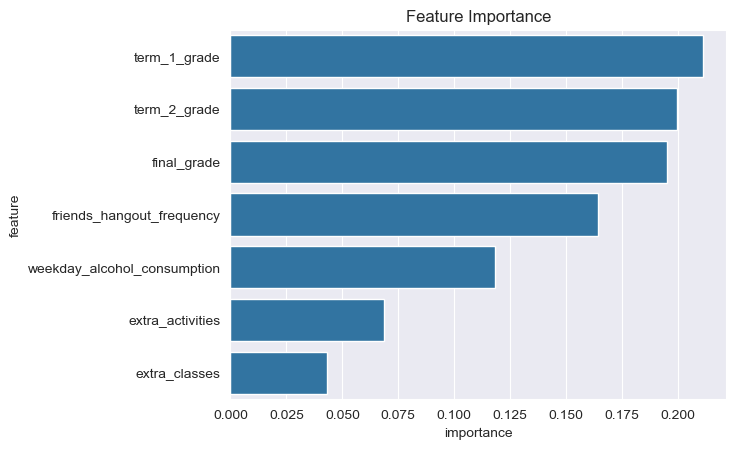

In [133]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

<h2>Travel time

<Axes: >

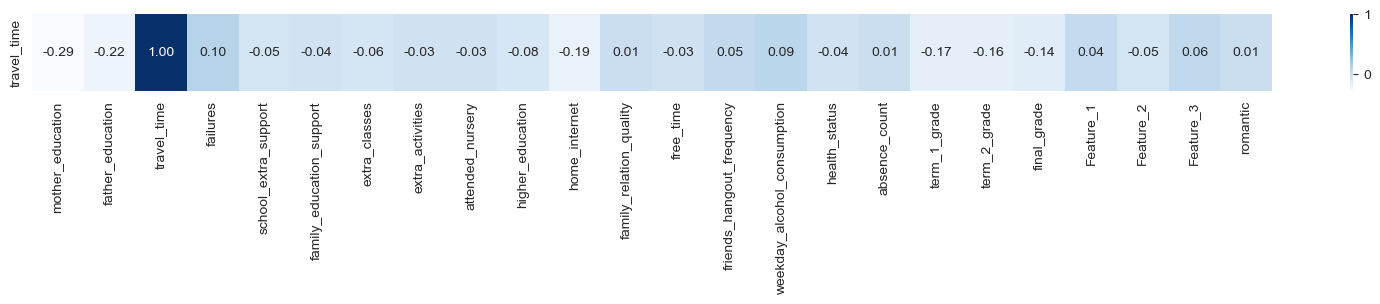

In [134]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['travel_time']],annot=True,fmt='.2f',cmap='Blues')

In [135]:
px.box(df2,'address','travel_time')

In [136]:
df2[df2.travel_time.isnull()].address.value_counts()

address
U    52
R    21
Name: count, dtype: int64

In [137]:
df2[df2.address=='R'].travel_time.describe()

count    176.000000
mean       1.971591
std        0.817166
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

<Axes: xlabel='travel_time', ylabel='count'>

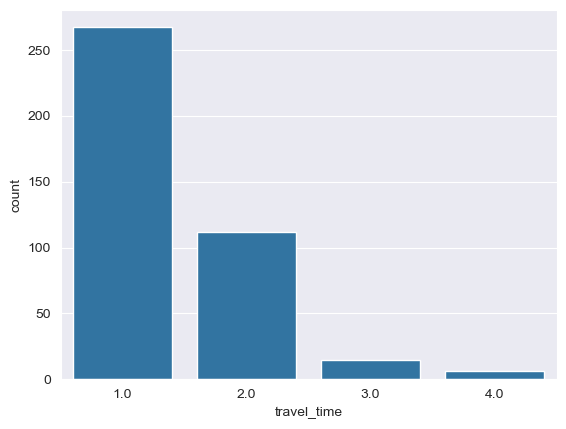

In [138]:
sns.barplot(df2[df2.address=='U'].travel_time.value_counts())

<Axes: xlabel='travel_time', ylabel='count'>

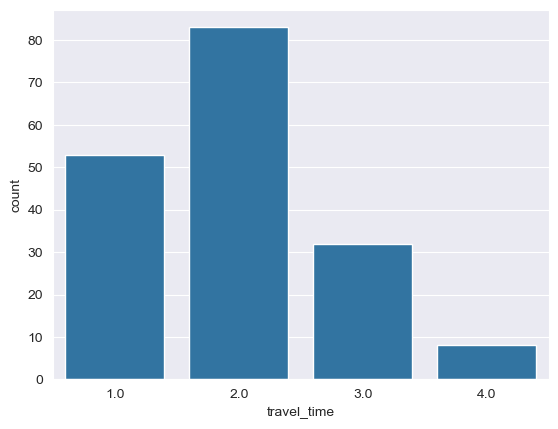

In [139]:
sns.barplot(df2[df2.address=='R'].travel_time.value_counts())

In [140]:
df2.loc[(df2.travel_time.isnull()) & (df2.address=='U'),'travel_time']=1
df2.loc[(df2.travel_time.isnull()) & (df2.address=='R'),'travel_time']=2


In [141]:
df2.travel_time.isnull().sum()

np.int64(0)

In [142]:
df.loc[(df.travel_time.isnull()) & (df.address=='U'),'travel_time']=1
df.loc[(df.travel_time.isnull()) & (df.address=='R'),'travel_time']=2


<h3>Family Size

In [143]:
pd.DataFrame(df2.isna().sum())[pd.DataFrame(df2.isna().sum())[0]!=0]

0
family_size  50
free_time    45

In [144]:
map={'GT3':1,'LE3':0}

In [145]:
df2.family_size=df2.family_size.map(map)
df2.family_size

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
644    1.0
645    0.0
646    1.0
647    0.0
648    0.0
Name: family_size, Length: 649, dtype: float64

In [146]:
map2={'A':0,'T':1}

df2.parent_status=df2.parent_status.map(map2)

<Axes: >

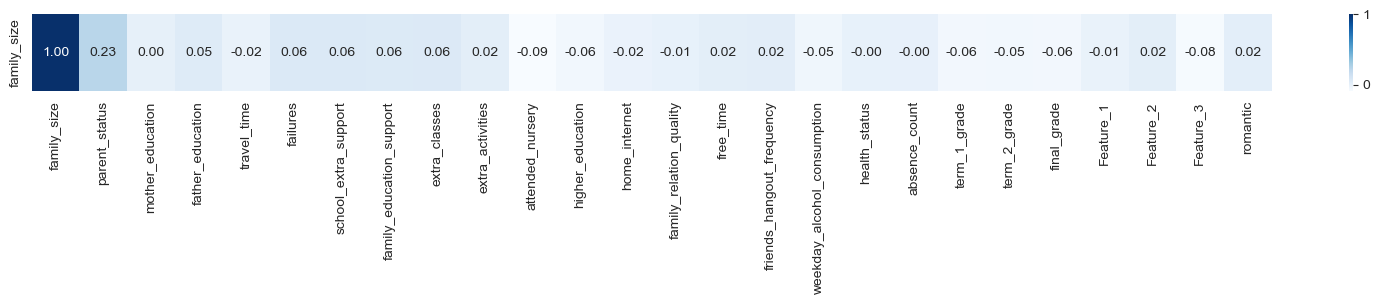

In [147]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['family_size']],annot=True,fmt='.2f',cmap='Blues')

In [148]:
df2[df2.family_size.isnull()]

school sex address  family_size  parent_status  mother_education  \
6       GP   M       U          NaN              1                 2   
16      GP   F       U          NaN              1                 4   
23      GP   M       U          NaN              1                 2   
35      GP   F       U          NaN              1                 2   
36      GP   M       U          NaN              1                 4   
83      GP   M       U          NaN              1                 2   
114     GP   M       R          NaN              1                 2   
121     GP   M       U          NaN              1                 2   
171     GP   M       R          NaN              1                 2   
181     GP   F       U          NaN              1                 4   
194     GP   M       U          NaN              1                 4   
195     GP   M       U          NaN              1                 3   
206     GP   M       U          NaN              1                 1   
208     GP   M       U          NaN              1                 2   
225     GP   M       U          NaN              1                 4   
235     GP   F       U          NaN              1                 1   
237     GP   M       U          NaN              1                 2   
251     GP   F       U          NaN              1                 2   
253     GP   F       U          NaN              0                 2   
271     GP   F       U          NaN              1                 4   
272     GP   M       R          NaN              1                 1   
302     GP   M       R          NaN              1                 3   
312     GP   F       U          NaN              1                 2   
355     GP   F       U          NaN              1                 2   
361     GP   M       U          NaN              1                 4   
364     GP   F       U          NaN              1                 4   
366     GP   F       U          NaN              0                 3   
379     GP   M       R          NaN              1                 2   
397     GP   F       U          NaN              0                 2   
419     GP   M       U          NaN              1                 2   
428     MS   F       R          NaN              1                 2   
434     MS   F       U          NaN              0                 2   
435     MS   F       R          NaN              1                 1   
441     MS   M       U          NaN              1                 1   
457     MS   M       R          NaN              1                 1   
472     MS   F       R          NaN              1                 2   
474     MS   M       R          NaN              1                 1   
475     MS   F       U          NaN              1                 2   
494     MS   F       R          NaN              1                 1   
513     MS   F       U          NaN              1                 3   
516     MS   F       R          NaN              1                 4   
523     MS   M       U          NaN              1                 4   
537     MS   M       U          NaN              0                 2   
540     MS   F       U          NaN              1                 3   
542     MS   F       U          NaN              1                 4   
557     MS   F       R          NaN              1                 3   
570     MS   M       R          NaN              1                 2   
585     MS   F       R          NaN              0                 3   
609     MS   F       U          NaN              1                 1   
642     MS   F       U          NaN              1                 4   

     father_education mother_job father_job school_reason guardian  \
6                 2.0      other      other          home   mother   
16                4.0   services   services    reputation   mother   
23                2.0      other      other    reputation   mother   
35                3.0      other      other        

<Axes: xlabel='parent_status'>

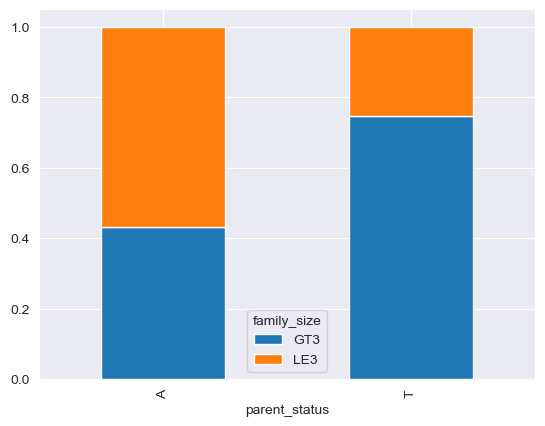

In [149]:
df.groupby('parent_status')['family_size'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

In [150]:
df2.loc[(df2.parent_status==1) & (df2.family_size.isnull()),'family_size']=1
df2.loc[(df2.parent_status==0) & (df2.family_size.isnull()),'family_size']=0
df.loc[(df.parent_status=='T') & (df.family_size.isnull()),'family_size']='GT3'
df.loc[(df.parent_status=='A') & (df.family_size.isnull()),'family_size']='LE3'

In [151]:
df.family_size.isnull().sum()

np.int64(0)

In [152]:
pd.DataFrame(df.isna().sum())[pd.DataFrame(df.isna().sum())[0]!=0]

0
free_time  45

<center><strong><h3>Free_time</h3></strong></center>

<Axes: >

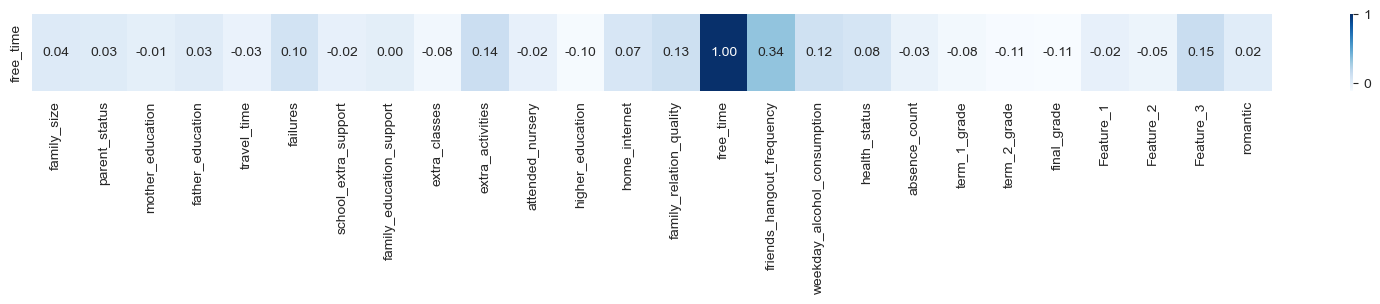

In [153]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['free_time']],annot=True,fmt='.2f',cmap='Blues')

In [154]:
df2[df2.free_time.isnull()]

school sex address  family_size  parent_status  mother_education  \
12      GP   M       U          0.0              1                 4   
32      GP   M       R          1.0              1                 4   
34      GP   M       U          1.0              1                 3   
77      GP   F       U          1.0              1                 2   
83      GP   M       U          1.0              1                 2   
84      GP   F       U          1.0              1                 1   
89      GP   M       U          0.0              0                 4   
105     GP   F       U          1.0              0                 3   
120     GP   F       U          1.0              1                 1   
129     GP   M       U          1.0              1                 2   
148     GP   F       R          1.0              1                 1   
159     GP   F       U          1.0              1                 1   
164     GP   M       U          0.0              1                 2   
176     GP   M       U          0.0              1                 1   
192     GP   M       R          1.0              1                 4   
199     GP   M       U          1.0              1                 3   
202     GP   F       U          1.0              0                 3   
234     GP   F       R          1.0              1                 2   
274     GP   F       U          1.0              1                 1   
287     GP   M       U          0.0              1                 1   
289     GP   F       U          0.0              1                 4   
311     GP   F       U          1.0              1                 3   
316     GP   F       U          1.0              1                 2   
317     GP   F       U          0.0              1                 2   
326     GP   M       U          0.0              0                 3   
362     GP   F       U          1.0              1                 4   
381     GP   F       U          1.0              1                 4   
395     GP   M       U          1.0              1                 4   
417     GP   F       U          1.0              1                 3   
444     MS   M       R          1.0              1                 3   
479     MS   F       U          1.0              1                 2   
512     MS   F       R          1.0              1                 1   
514     MS   F       U          1.0              1                 3   
529     MS   F       U          0.0              1                 4   
533     MS   F       U          0.0              1                 2   
535     MS   M       R          1.0              1                 1   
555     MS   F       R          1.0              1                 1   
565     MS   M       R          0.0              1                 1   
577     MS   M       R          1.0              1                 1   
583     MS   F       R          1.0              1                 2   
592     MS   F       U          1.0              1                 3   
599     MS   M       R          1.0              1                 4   
612     MS   M       R          1.0              1                 4   
636     MS   M       U          1.0              1                 4   
645     MS   F       U          0.0              1                 3   

     father_education mother_job father_job school_reason guardian  \
12                4.0     health   services        course   father   
32                1.0    teacher    at_home        course   mother   
34                2.0      other      other          home   mother   
77                2.0      other      other    reputation   mother   
83                2.0   services   services          home   mother   
84                1.0      other      other          home   father   
89                4.0    teacher     health    reputation   mother   
105               3.0      other     health    reputation   father   
120               2.0    at_home   services        course   m

<Axes: xlabel='school'>

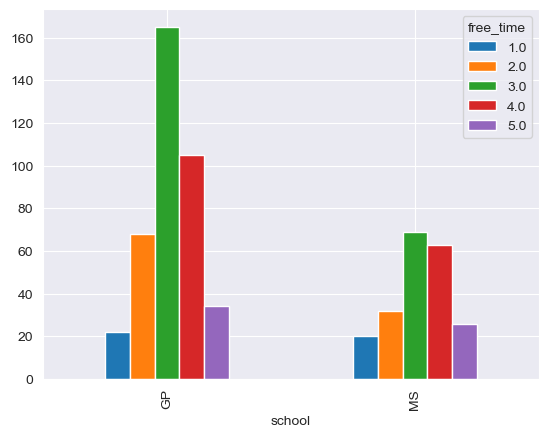

In [155]:
df2.groupby('school')['free_time'].value_counts().unstack().plot(kind='bar')

In [156]:
cols=['friends_hangout_frequency','weekday_alcohol_consumption','extra_activities','Feature_3','Feature_2','term_1_grade','term_2_grade','final_grade','free_time']

In [157]:
data_new=df2[cols]


In [158]:
scalar=StandardScaler()

In [159]:
data_scaled = pd.DataFrame(
    scalar.fit_transform(data_new),
    columns=cols
)

In [160]:
(scalar.inverse_transform(data_scaled)-data_new).sum()

friends_hangout_frequency      0.000000e+00
weekday_alcohol_consumption    0.000000e+00
extra_activities               0.000000e+00
Feature_3                      0.000000e+00
Feature_2                      0.000000e+00
term_1_grade                  -1.776357e-15
term_2_grade                   2.664535e-15
final_grade                    8.881784e-16
free_time                      0.000000e+00
dtype: float64

In [161]:
from sklearn.impute import KNNImputer

In [162]:
imputer=KNNImputer(n_neighbors=5,weights='distance')

In [163]:
data_imputed=pd.DataFrame( imputer.fit_transform(data_scaled),columns=cols)

In [164]:
data_imputed=pd.DataFrame(scalar.inverse_transform(data_imputed),columns=cols)

In [165]:
data_imputed['free_time'].describe()

count    649.000000
mean       3.176298
std        1.016056
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

In [166]:
missing_rows=df2.free_time.isnull()

In [167]:
df2.loc[missing_rows,'free_time']=np.round(data_imputed.loc[missing_rows,'free_time'])
df.loc[missing_rows,'free_time']=np.round(data_imputed.loc[missing_rows,'free_time'])

In [168]:
pd.DataFrame(df.isna().sum())[pd.DataFrame(df.isna().sum())[0]!=0]

Empty DataFrame
Columns: [0]
Index: []

In [169]:
pd.DataFrame(df2.isna().sum())[pd.DataFrame(df2.isna().sum())[0]!=0]

Empty DataFrame
Columns: [0]
Index: []

<div align="center"><h2>EDA

<h3>Q1. What is the distribution of absence count?


<Axes: title={'center': 'Distribution of Absence Count'}, xlabel='Absence Count', ylabel='Number of Students'>

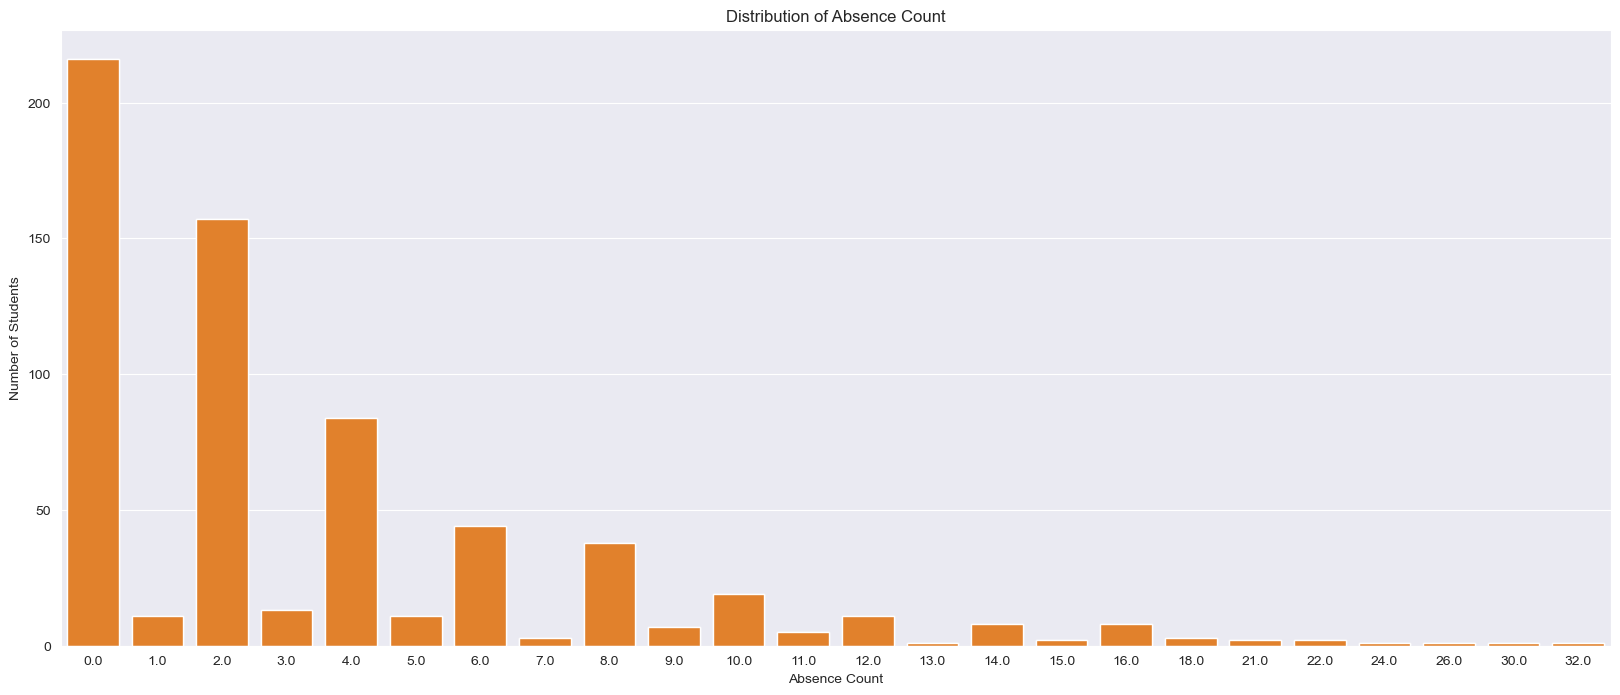

In [170]:
plt.figure(figsize=(20,8))
sns.barplot(df.absence_count.value_counts())
plt.title('Distribution of Absence Count')
plt.xlabel('Absence Count')
plt.ylabel('Number of Students')
sns.barplot(df.absence_count.value_counts())

There is a observation that the major absence count numbers are even.This might be due to some trend like school system or anything else

In [171]:
df.head(12)

school sex address family_size parent_status  mother_education  \
0      GP   F       U         GT3             A                 4   
1      GP   F       U         GT3             T                 1   
2      GP   F       U         LE3             T                 1   
3      GP   F       U         GT3             T                 4   
4      GP   F       U         GT3             T                 3   
5      GP   M       U         LE3             T                 4   
6      GP   M       U         GT3             T                 2   
7      GP   F       U         GT3             A                 4   
8      GP   M       U         LE3             A                 3   
9      GP   M       U         GT3             T                 3   
10     GP   F       U         GT3             T                 4   
11     GP   F       U         GT3             T                 2   

    father_education mother_job father_job school_reason guardian  \
0                4.0    at_home    teacher        course   mother   
1                1.0    at_home      other        course   father   
2                1.0    at_home      other         other   mother   
3                2.0     health   services          home   mother   
4                3.0      other      other          home   father   
5                3.0   services      other    reputation   mother   
6                2.0      other      other          home   mother   
7                4.0      other    teacher          home   mother   
8                2.0   services      other          home   mother   
9                4.0      other      other          home   mother   
10               4.0    teacher     health    reputation   mother   
11               2.0   services      other    reputation   father   

    travel_time  failures school_extra_support family_education_support  \
0           2.0         0                  yes                       no   
1           1.0         0                   no                      yes   
2           1.0         0                  yes                       no   
3           1.0         0                   no                      yes   
4           1.0         0                   no                      yes   
5           1.0         0                   no                      yes   
6           1.0         0                   no                       no   
7           1.0         0                  yes                      yes   
8           1.0         0                   no                      yes   
9           1.0         0                   no                      yes   
10          1.0         0                   no                      yes   
11          3.0         0                   no                      yes   

   extra_classes extra_activities attended_nursery higher_education  \
0             no               no              yes              yes   
1             no               no               no              yes   
2             no               no              yes              yes   
3             no              yes              yes              yes   
4             no               no              yes              yes   
5             no              yes              yes              yes   
6             no               no              yes              yes   
7             no               no              yes              yes   
8             no               no              yes              yes   
9             no              yes              yes              yes   
10            no               no              yes              yes   
11            no              yes              yes              yes   

   home_internet  family_relation_quality  free_time  \
0             no                        4        3.0   
1            yes                        5        3.0   
2            yes                        4        3.0   
3            yes                        3        2.0   
4             no           

<h3>Q2. What is Number of students going to each school

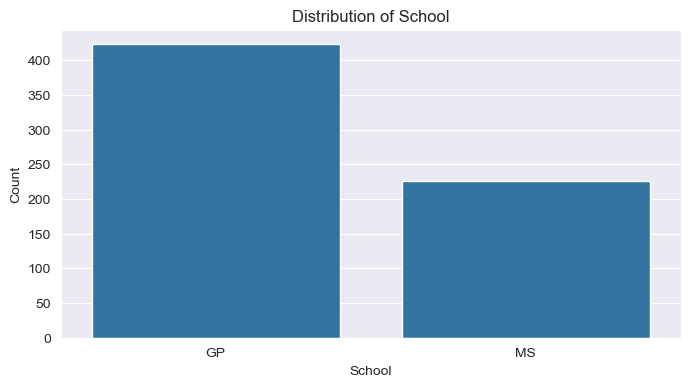

In [172]:
plt.figure(figsize=(8,4))
sns.barplot(x=df2.school.value_counts().index, y=df2.school.value_counts().values)
plt.title('Distribution of School')
plt.xlabel('School')
plt.ylabel('Count')
plt.show()

Most students belong to GP.

<h3>Q3. Students of which school perform better

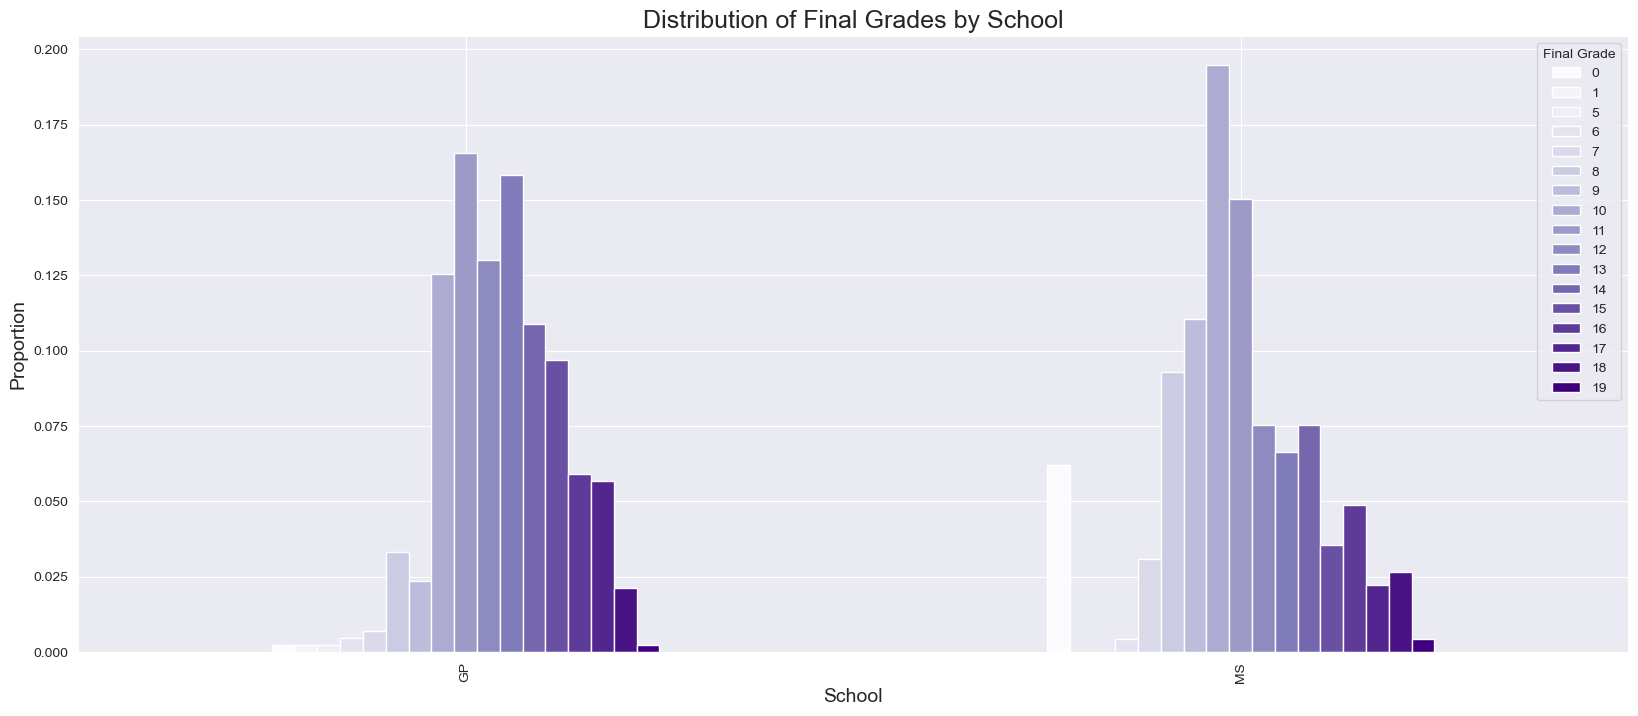

In [173]:
ax = df2.groupby('school')['final_grade'].value_counts(normalize=True).unstack().plot(
    kind='bar', figsize=(20,8), colormap='Purples'
)
ax.set_title('Distribution of Final Grades by School', fontsize=18)
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.legend(title='Final Grade')
plt.show()

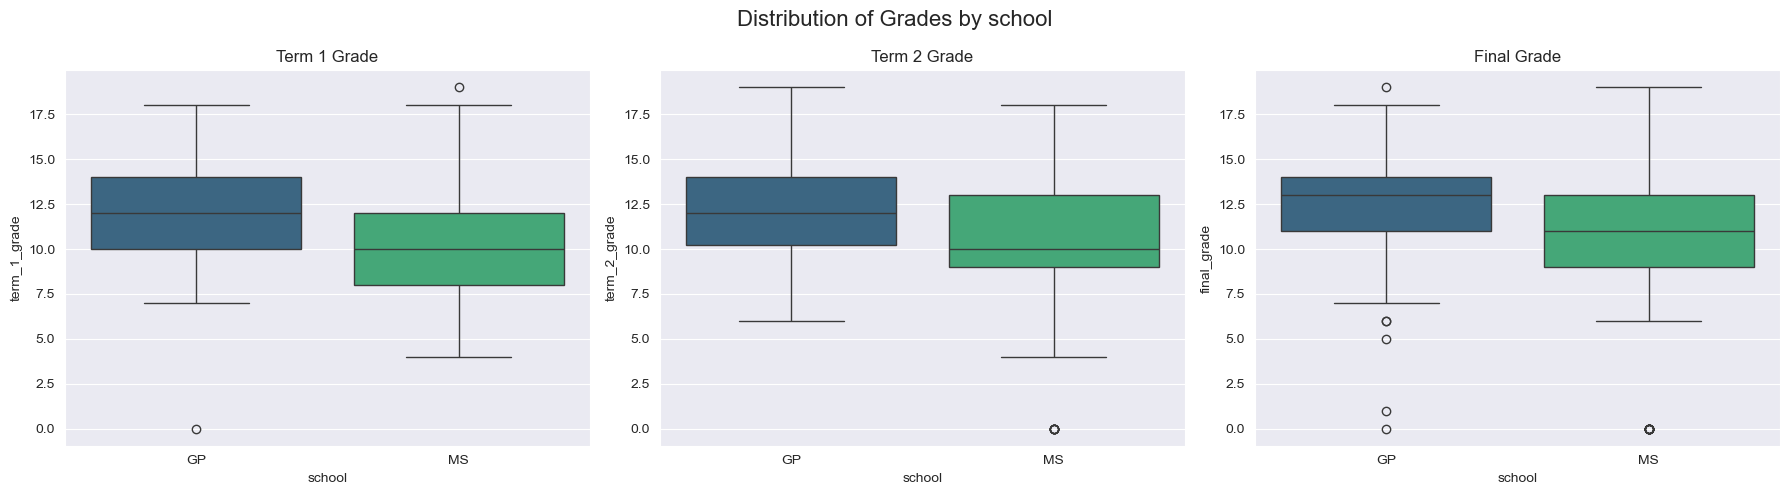

In [174]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(df2, x='school', y='term_1_grade', ax=axes[0],palette='viridis')
axes[0].set_title('Term 1 Grade')

sns.boxplot(data=df2, x='school', y='term_2_grade', ax=axes[1],palette='viridis')
axes[1].set_title('Term 2 Grade')

sns.boxplot(data=df2, x='school', y='final_grade', ax=axes[2],palette='viridis')
axes[2].set_title('Final Grade')
fig.suptitle('Distribution of Grades by school', fontsize=16)
plt.tight_layout()
plt.show()


So the students of GP school perform better on an average

<h3>Q4. Students from which area perform better

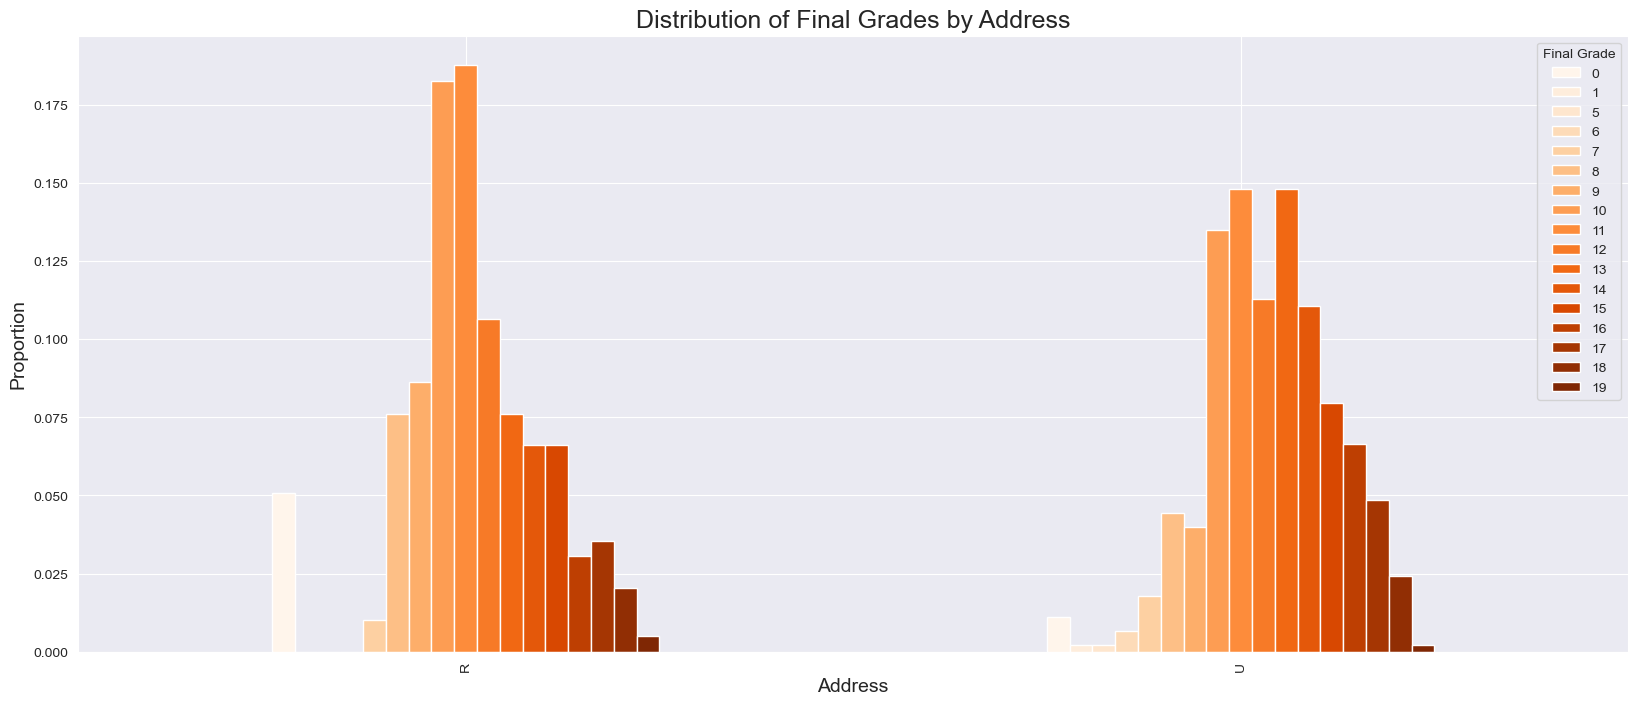

In [175]:
ax = df2.groupby('address')['final_grade'].value_counts(normalize=True).unstack().plot(
    kind='bar', figsize=(20,8), colormap='Oranges'
)
ax.set_title('Distribution of Final Grades by Address', fontsize=18)
ax.set_xlabel('Address', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.legend(title='Final Grade')
plt.show()

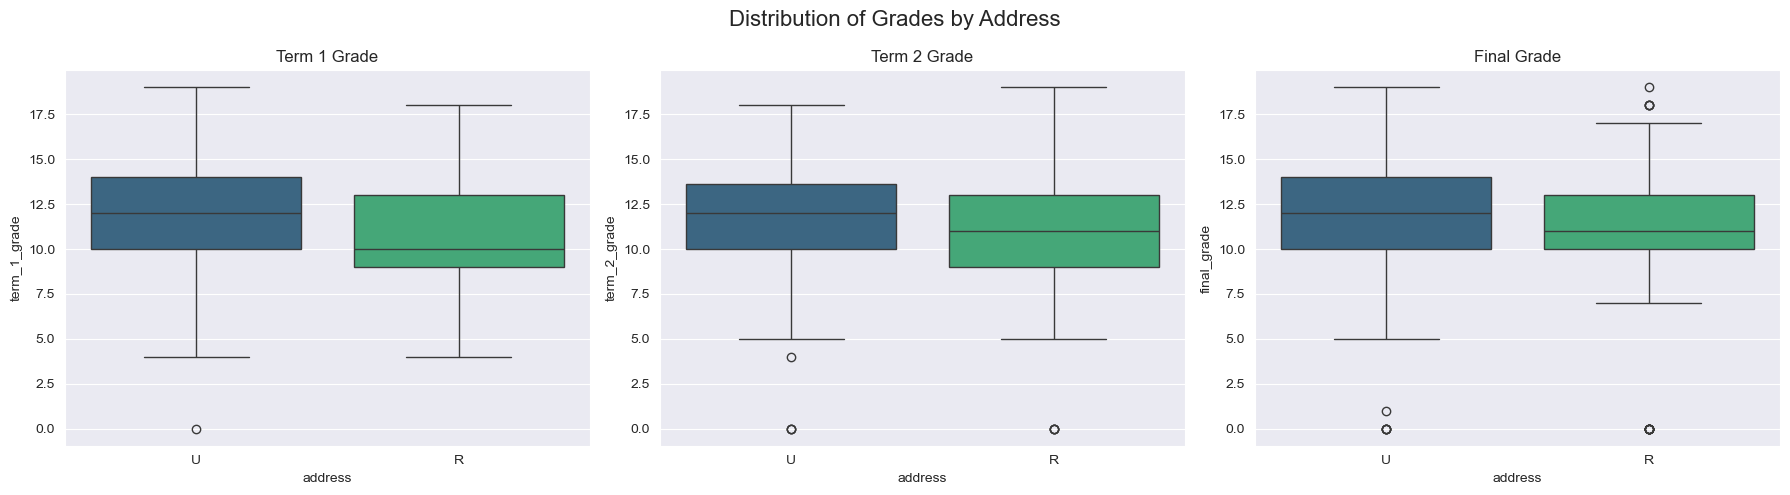

In [176]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(df2, x='address', y='term_1_grade', ax=axes[0],palette='viridis')
axes[0].set_title('Term 1 Grade')

sns.boxplot(data=df2, x='address', y='term_2_grade', ax=axes[1],palette='viridis')
axes[1].set_title('Term 2 Grade')

sns.boxplot(data=df2, x='address', y='final_grade', ax=axes[2],palette='viridis')
axes[2].set_title('Final Grade')

fig.suptitle('Distribution of Grades by Address', fontsize=16)
plt.tight_layout()
plt.show()

On an average studets form urban area have better grades

<h3>Q5. Popular school according to address

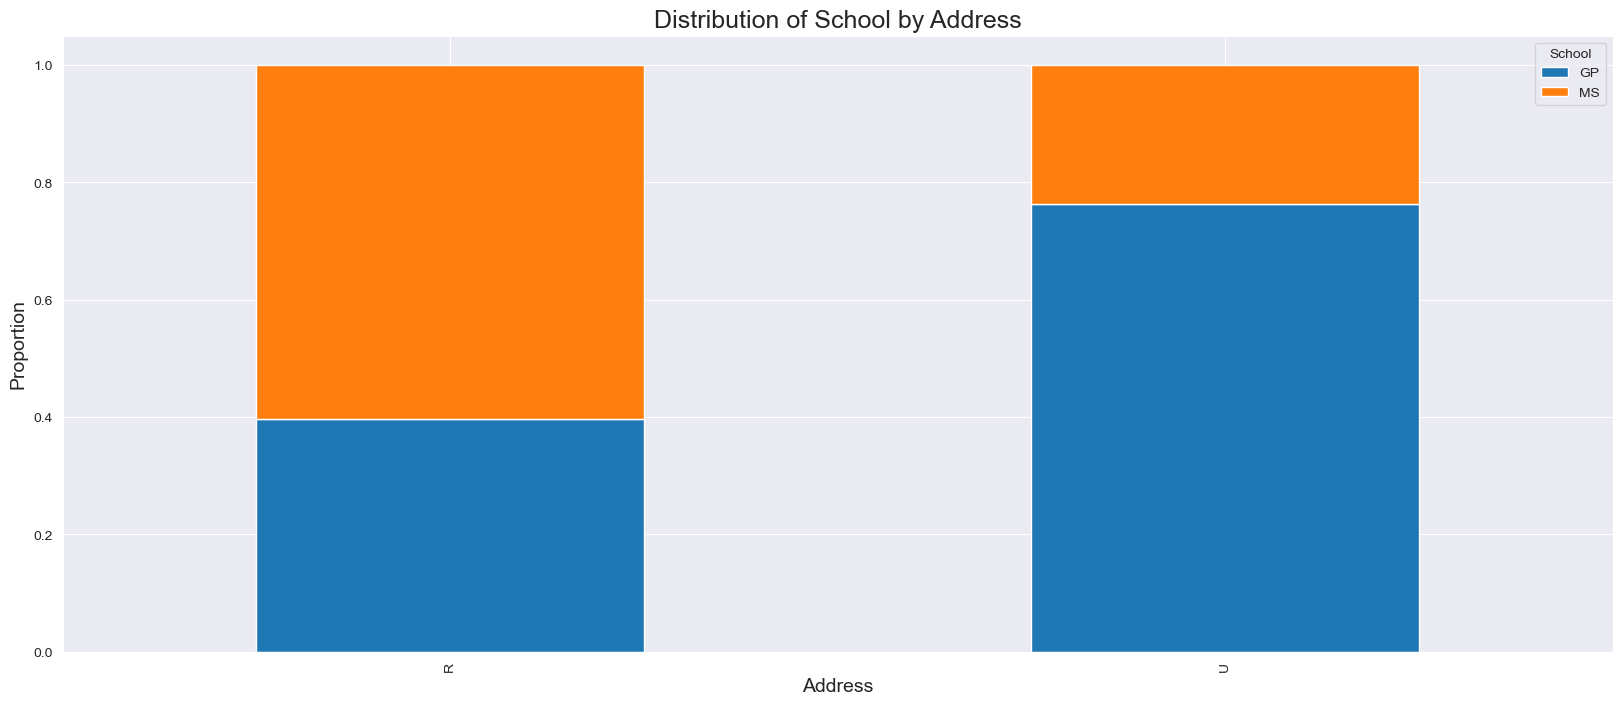

In [177]:
ax = df2.groupby('address')['school'].value_counts(normalize=True).unstack().plot(
    kind='bar', figsize=(20,8), stacked=True
)
ax.set_title('Distribution of School by Address', fontsize=18)
ax.set_xlabel('Address', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.legend(title='School')
plt.show()

Students from urban area are more likely to attend GP school which is the opposite of rural area

<h3>Q6. Students of which gender have better grades

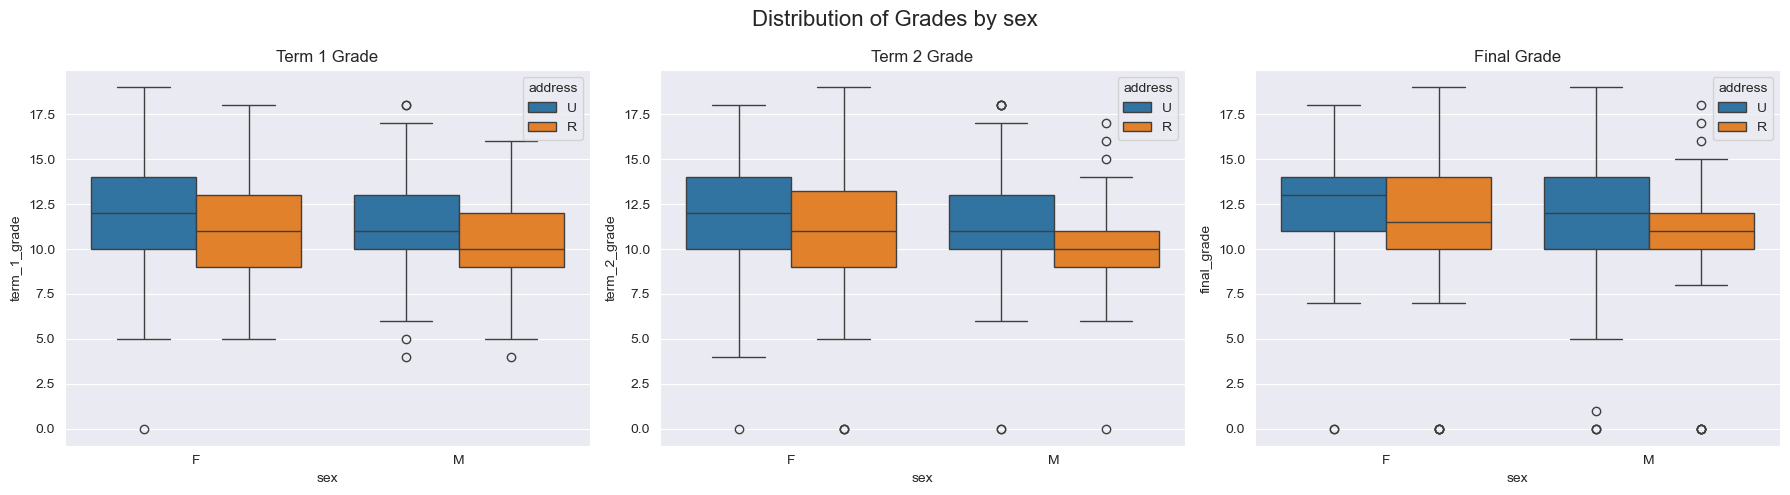

In [178]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(df2, x='sex', y='term_1_grade', ax=axes[0],hue='address')
axes[0].set_title('Term 1 Grade')

sns.boxplot(data=df2, x='sex', y='term_2_grade', ax=axes[1],hue='address')
axes[1].set_title('Term 2 Grade')

sns.boxplot(data=df2, x='sex', y='final_grade', ax=axes[2],hue='address')
axes[2].set_title('Final Grade')
fig.suptitle('Distribution of Grades by sex', fontsize=16)
plt.tight_layout()
plt.show()

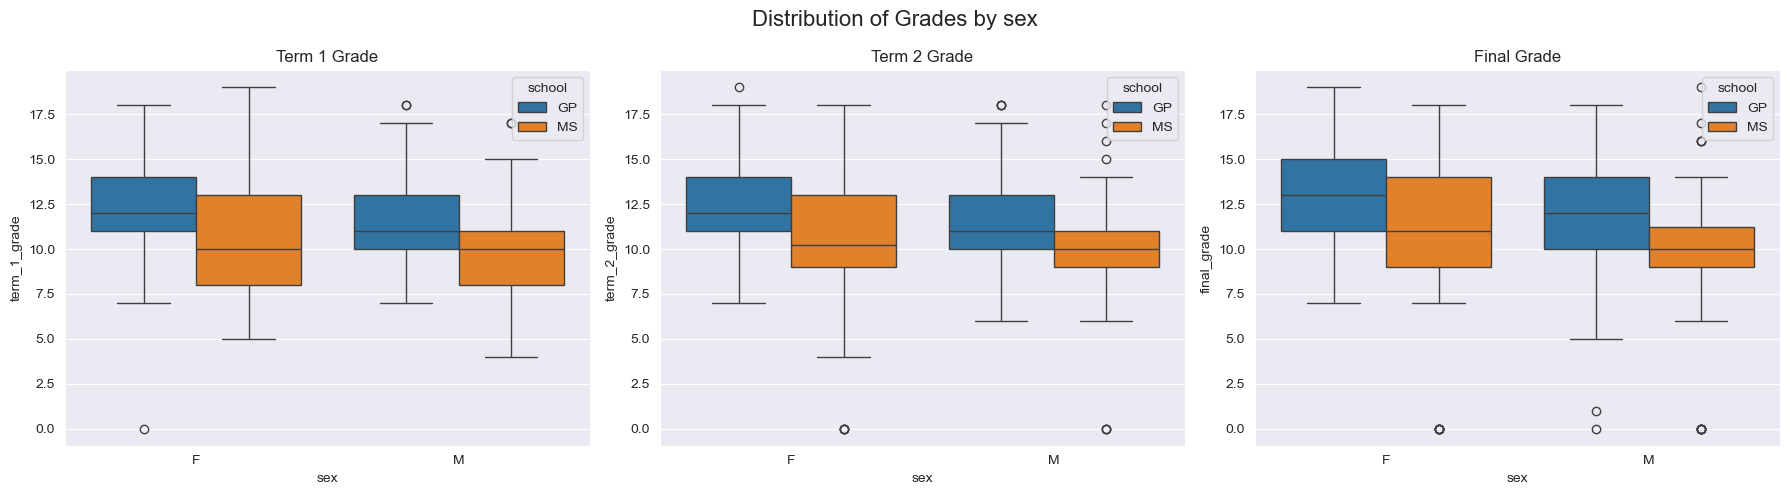

In [179]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(df2, x='sex', y='term_1_grade', ax=axes[0],hue='school')
axes[0].set_title('Term 1 Grade')

sns.boxplot(data=df2, x='sex', y='term_2_grade', ax=axes[1],hue='school')
axes[1].set_title('Term 2 Grade')

sns.boxplot(data=df2, x='sex', y='final_grade', ax=axes[2],hue='school')
axes[2].set_title('Final Grade')
fig.suptitle('Distribution of Grades by sex', fontsize=16)
plt.tight_layout()
plt.show()

The female students perform better on an average than male students in both term 1 and term 2 as well as in the final grade


<h3>Q7. what is the popular job among the parents

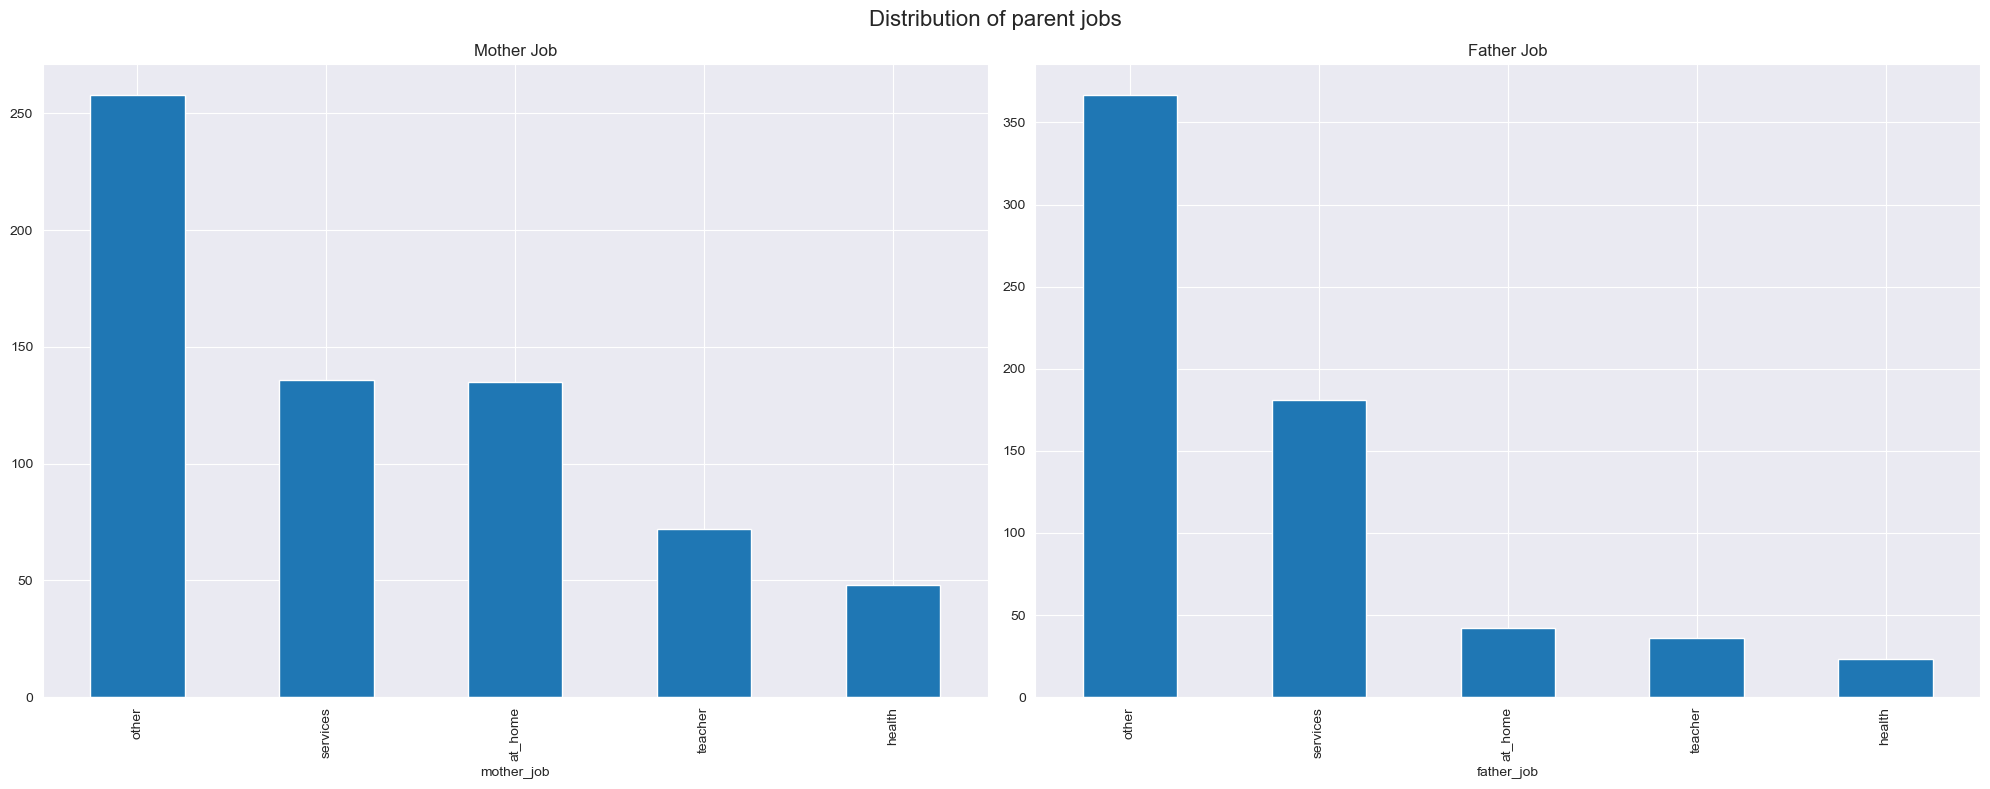

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
df2.mother_job.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Mother Job')
df2.father_job.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Father Job')
fig.suptitle('Distribution of parent jobs', fontsize=16)
plt.tight_layout()
plt.show()

So the most of the mothers are in services,at home or at other jobs and most of the fathers are in service jobs and other jobs

<h3>Q8. Which parents are the most likely to be guardian

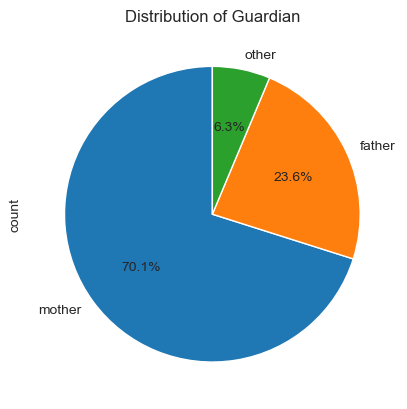

In [181]:
df2.guardian.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Guardian')
plt.show()

Most of the guardians are mothers


<h3>Q9. What is the major reason of choosing the school

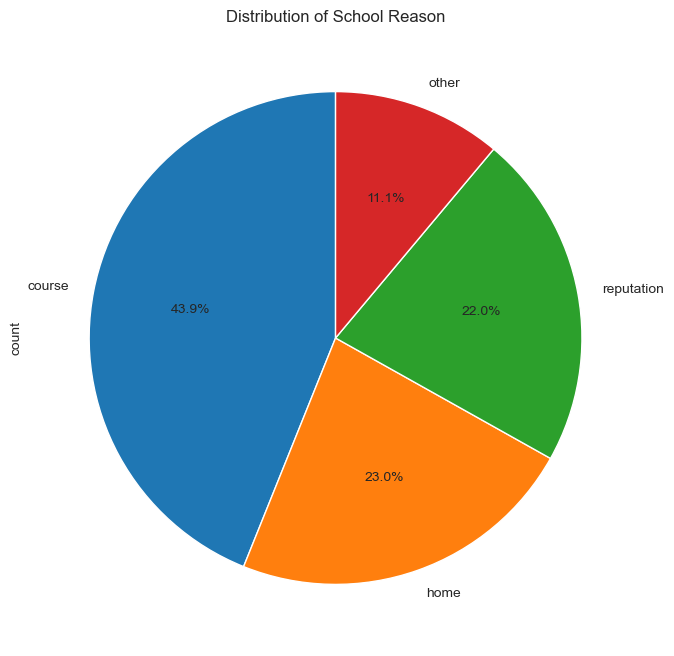

In [182]:
plt.figure(figsize=(8, 8))
df2.school_reason.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of School Reason')
plt.show()


Most of the students chooose the school due to course

<h3>Q10. Which sex has most alcohol consumption

In [222]:
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, subplot_titles=['Weekday Alcohol Consumption by Sex', 'Weekend alcohol consumption by Sex'])

box1 = px.box(df2, x='sex', y='weekday_alcohol_consumption')
for trace in box1.data:
    fig.add_trace(trace, row=1, col=1)

box2 = px.box(df2, x='sex', y='Feature_3')
for trace in box2.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_xaxes(title_text='Sex', row=1, col=1)
fig.update_yaxes(title_text='Weekday Alcohol Consumption', row=1, col=1)
fig.update_xaxes(title_text='Sex', row=1, col=2)
fig.update_yaxes(title_text='Feature_3', row=1, col=2)
fig.update_layout(title_text='Alcohol consumption comparison by Sex', width=1500, height=500)


In [223]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, subplot_titles=['Weekday Alcohol Consumption by Sex', 'Weekend alcohol consumption by Sex'])

violin1 = px.violin(df2, x='sex', y='weekday_alcohol_consumption')
for trace in violin1.data:
    fig.add_trace(trace, row=1, col=1)

violin2 = px.violin(df2, x='sex', y='Feature_3')
for trace in violin2.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_xaxes(title_text='Sex', row=1, col=1)
fig.update_yaxes(title_text='Weekday Alcohol Consumption', row=1, col=1)
fig.update_xaxes(title_text='Sex', row=2, col=1)
fig.update_yaxes(title_text='Feature_3', row=2, col=1)
fig.update_layout(title_text='Alcohol consumptionc Comparison by Sex', width=1500, height=1000)
fig.show()


On an average males consume more alcohol than females

<h3>Q11. Does performing good in one paper mean performing good in others

<Axes: >

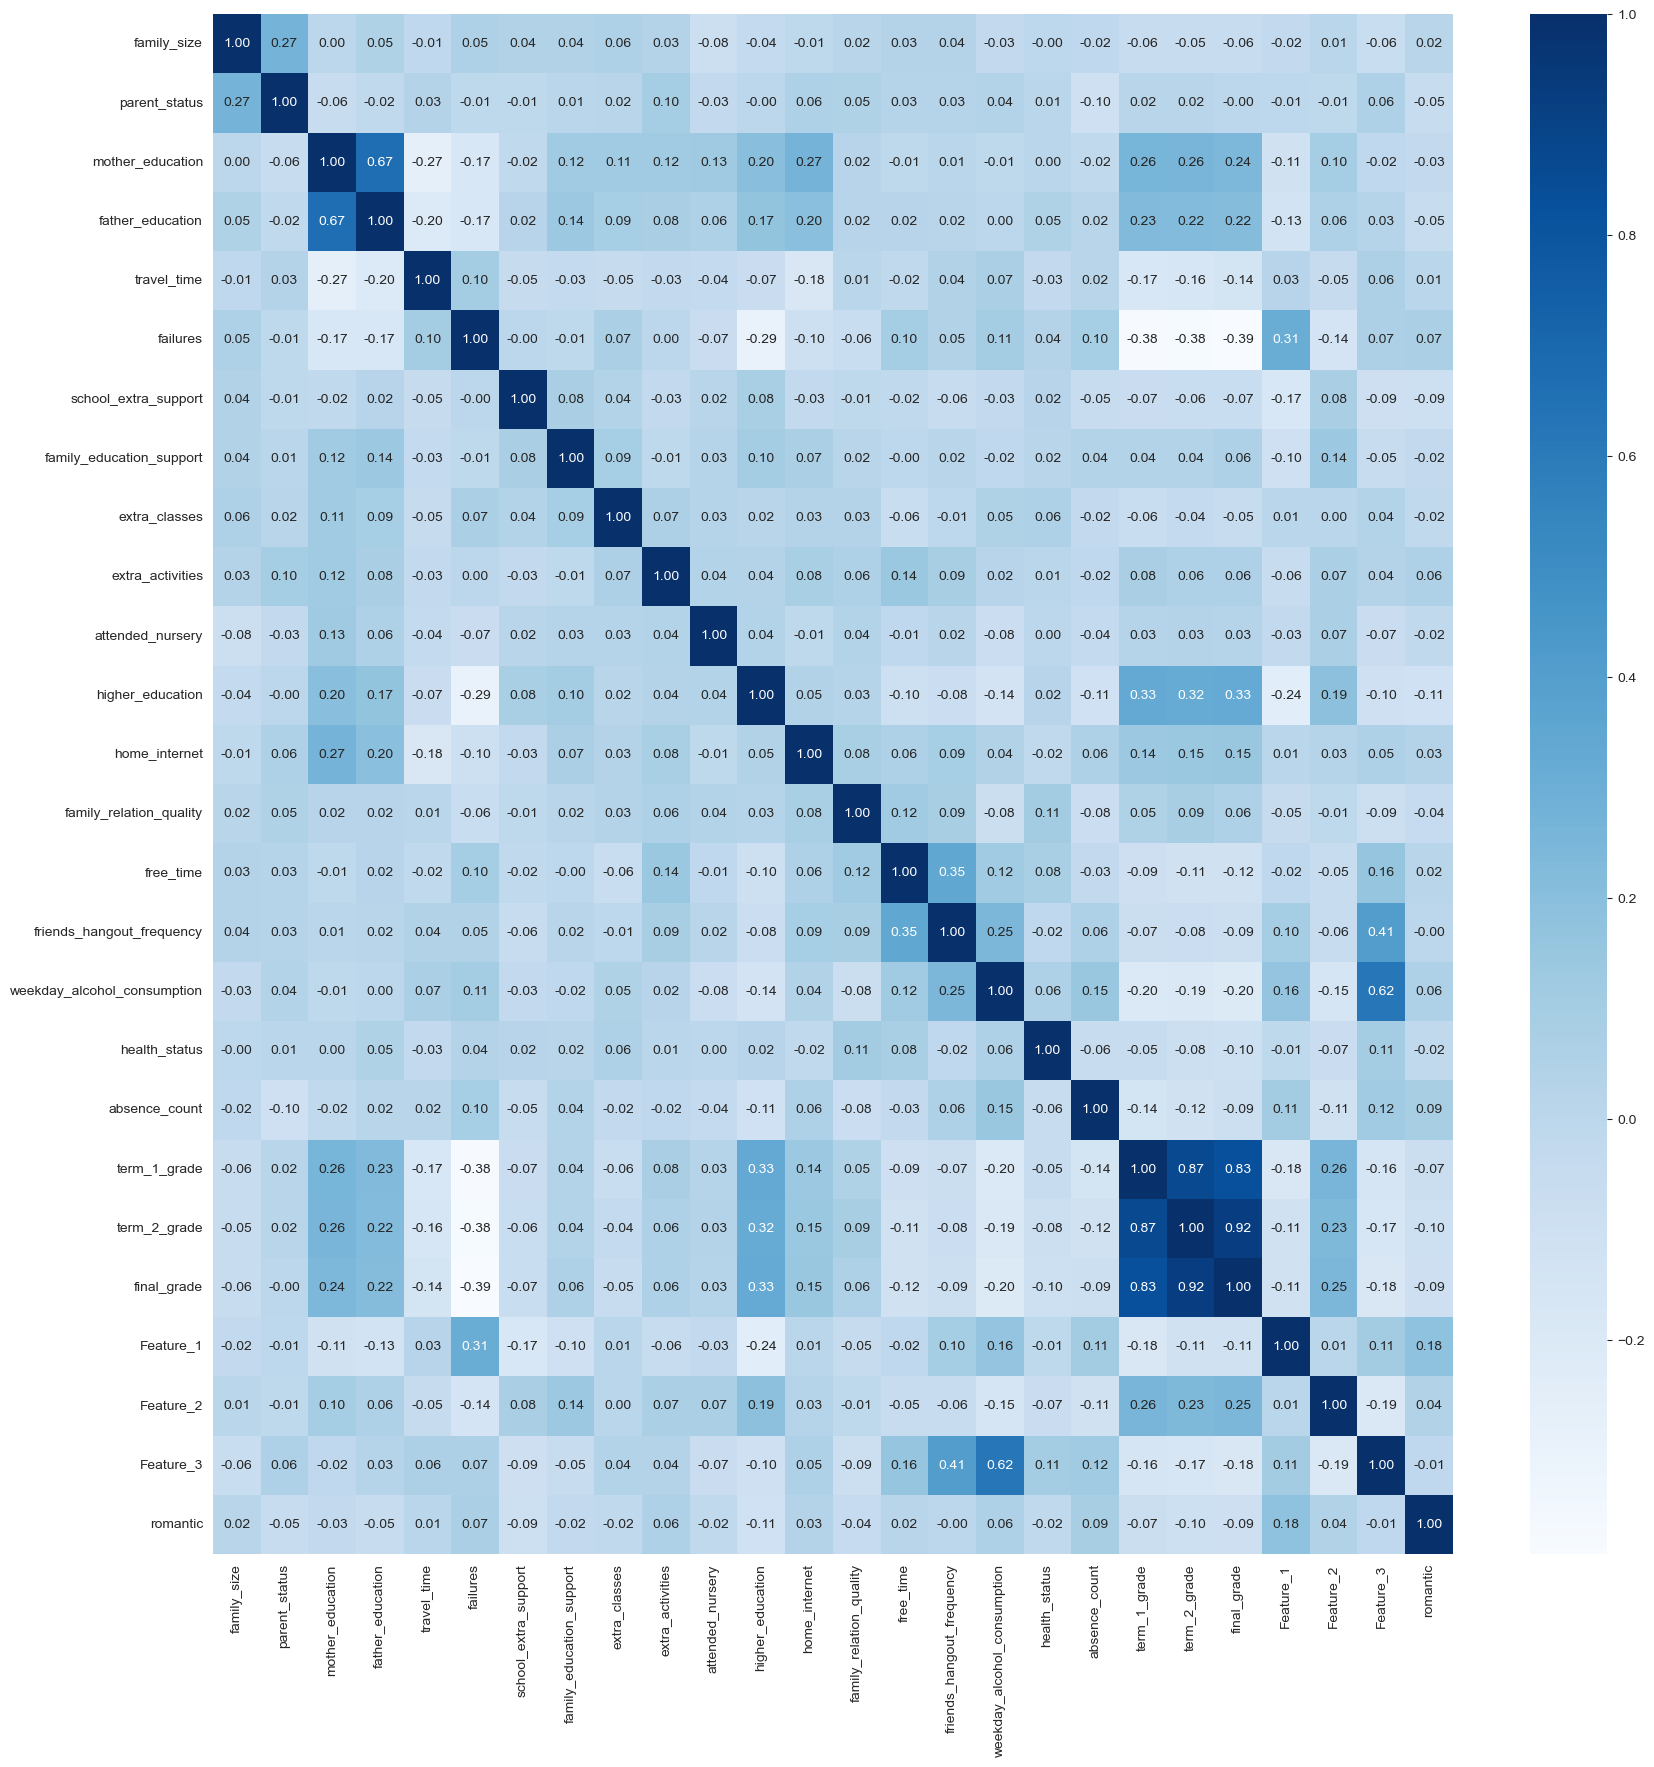

In [185]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.select_dtypes(np.number).corr(),annot=True,fmt='.2f',cmap='Blues')

As we can see from the correlation matrix,  all the grades have a strong positive correlation with each other. This means that performing well in one grade will generally lead to higher scores in all other grades and same for poor performance as well


<h3>Q12. Is there any impact of parent education on the grade of students


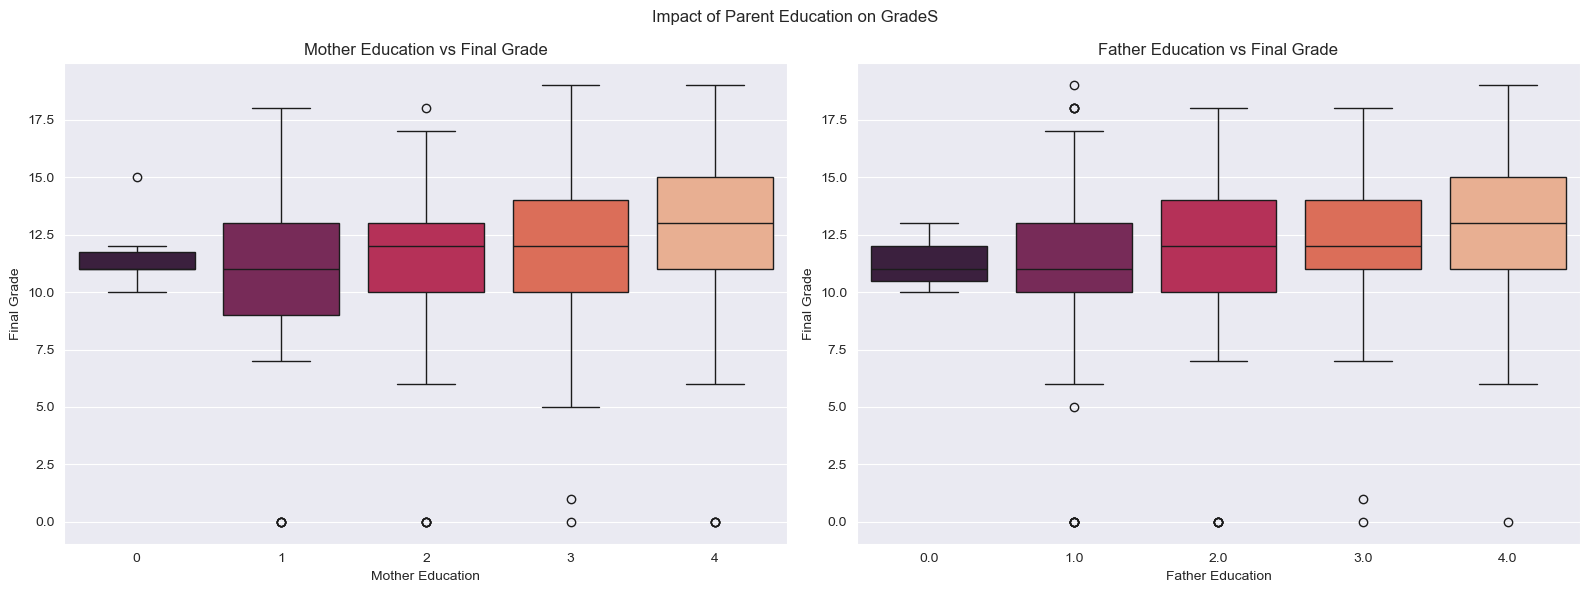

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df2, x='mother_education', y='final_grade', ax=axes[0],palette='rocket')
axes[0].set_title('Mother Education vs Final Grade')
axes[0].set_xlabel('Mother Education')
axes[0].set_ylabel('Final Grade')

sns.boxplot(data=df2, x='father_education', y='final_grade', ax=axes[1],palette='rocket')
axes[1].set_title('Father Education vs Final Grade')
axes[1].set_xlabel('Father Education')
axes[1].set_ylabel('Final Grade')
plt.suptitle('Impact of Parent Education on GradeS')
plt.tight_layout()
plt.show()



There is some positive correlation between mother's education and final grade, and father's education and final grade. This means that as a parent's education increases, the student's performance in school can increase.

<h3>Q13. Does studying more mean better grades

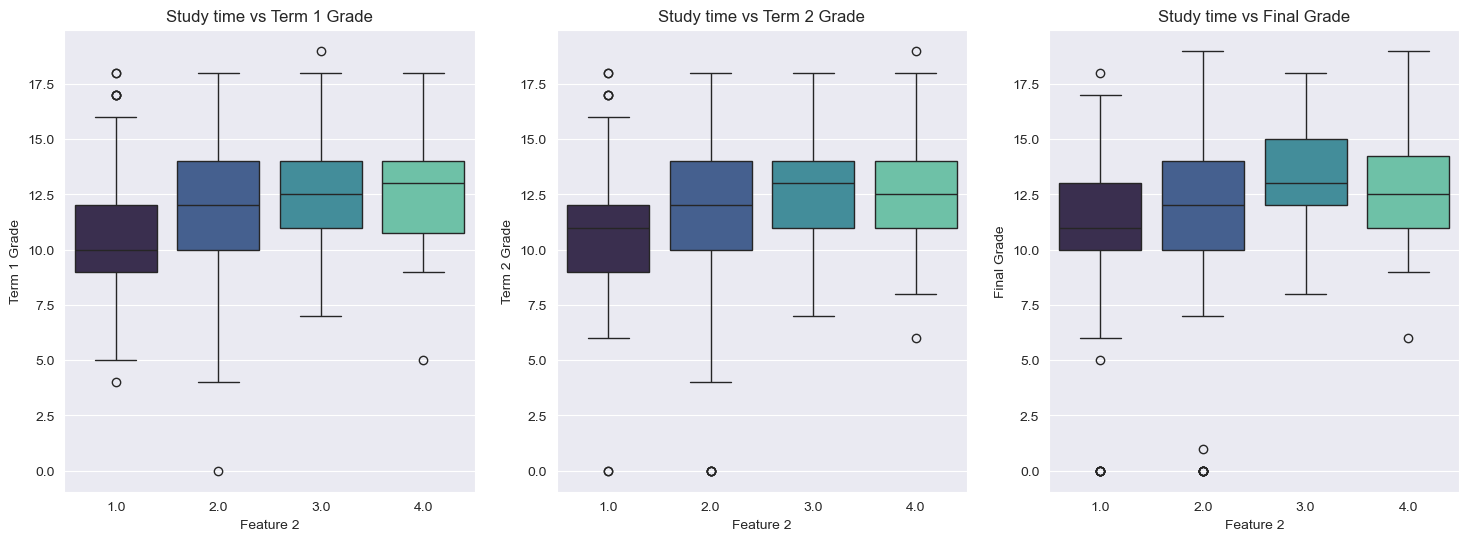

In [187]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df2, y='term_1_grade', x='Feature_2',palette='mako')
plt.title('Study time vs Term 1 Grade')
plt.xlabel('Feature 2')
plt.ylabel('Term 1 Grade')

plt.subplot(1, 3, 2)
sns.boxplot(data=df2, y='term_2_grade', x='Feature_2',palette='mako')
plt.title('Study time vs Term 2 Grade')
plt.xlabel('Feature 2')
plt.ylabel('Term 2 Grade')

plt.subplot(1, 3, 3)
sns.boxplot(data=df2, y='final_grade', x='Feature_2',palette='mako')
plt.title('Study time vs Final Grade')
plt.xlabel('Feature 2')
plt.ylabel('Final Grade')



plt.show()

There is some correlation between study time and grades.Means studying more may lead to better grades.There is some outliers in the data which can affect the interpretation of the results.In Term 2 and final grade exams the most studyious students have grades comparable to ones with not much study time

<h3>Q14. Does alcohol consumption affect the Grades

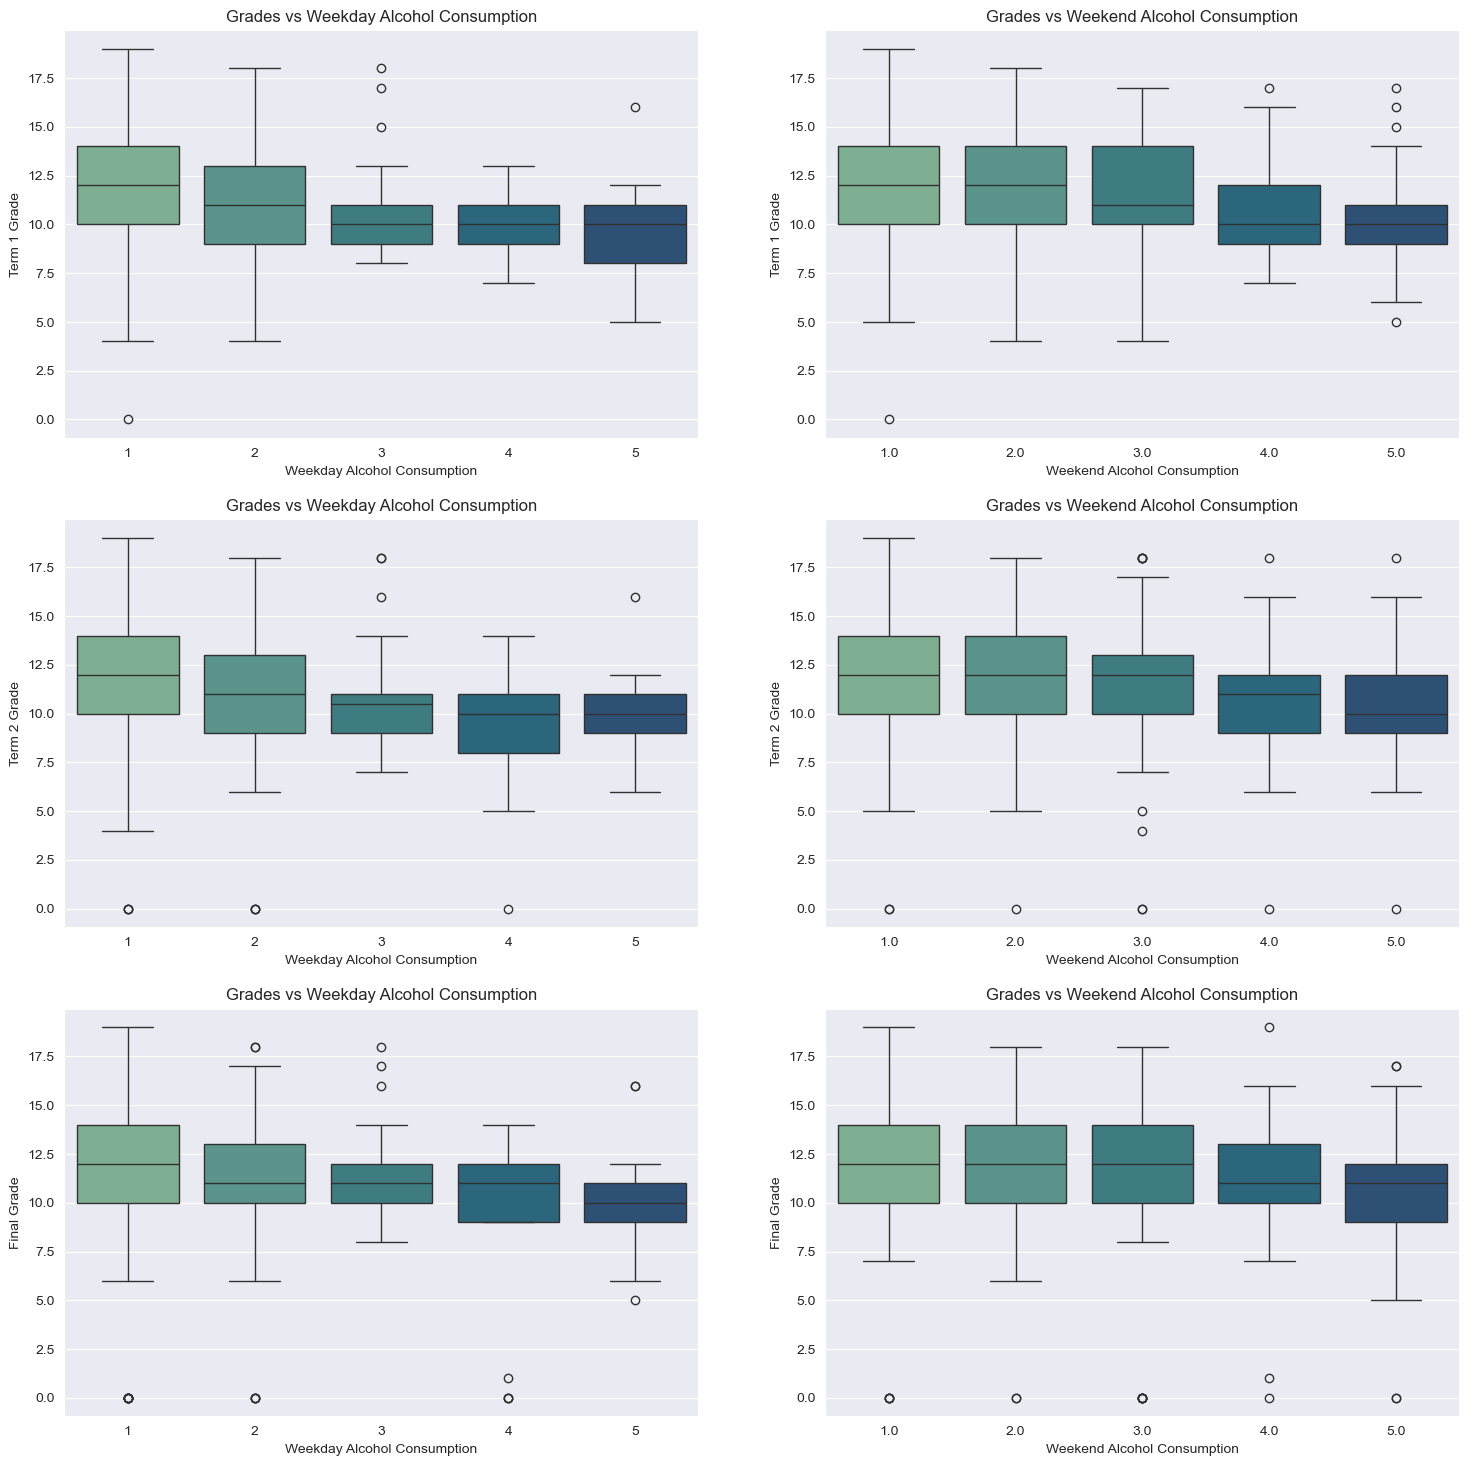

In [188]:
plt.figure(figsize=(18, 18))
plt.subplot(3,2,1)
sns.boxplot(data=df2, y='term_1_grade', x='weekday_alcohol_consumption',palette='crest')
plt.title('Grades vs Weekday Alcohol Consumption')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Term 1 Grade')
plt.subplot(3,2,2)
sns.boxplot(data=df2, y='term_1_grade', x='Feature_3',palette='crest')
plt.title('Grades vs Weekend Alcohol Consumption')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Term 1 Grade')  

plt.subplot(3,2,3)
sns.boxplot(data=df2, y='term_2_grade', x='weekday_alcohol_consumption',palette='crest')
plt.title('Grades vs Weekday Alcohol Consumption')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Term 2 Grade')
plt.subplot(3,2,4)
sns.boxplot(data=df2, y='term_2_grade', x='Feature_3',palette='crest')
plt.title('Grades vs Weekend Alcohol Consumption')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Term 2 Grade')

plt.subplot(3,2,5)
sns.boxplot(data=df2, y='final_grade', x='weekday_alcohol_consumption',palette='crest')
plt.title('Grades vs Weekday Alcohol Consumption')
plt.xlabel('Weekday Alcohol Consumption')
plt.ylabel('Final Grade')
plt.subplot(3,2,6)
sns.boxplot(data=df2, y='final_grade', x='Feature_3',palette='crest')
plt.title('Grades vs Weekend Alcohol Consumption')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Final Grade')
plt.show()


From the trends there is a observation that more alcohol consumption lead to deteoration of grades

<h3>Q15. Which age group consumes more alcohol

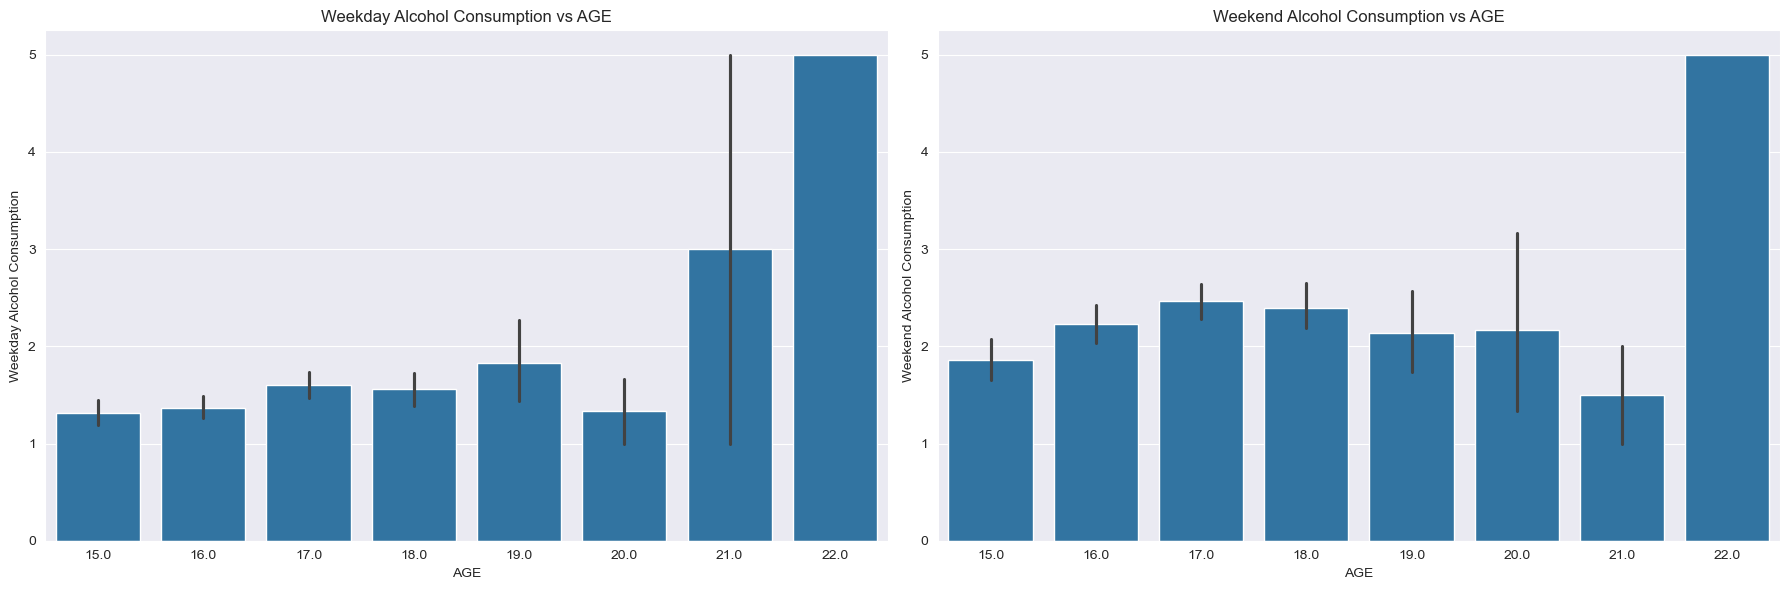

In [189]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.barplot(data=df2, y='weekday_alcohol_consumption', x='Feature_1')
plt.title('Weekday Alcohol Consumption vs AGE')
plt.ylabel('Weekday Alcohol Consumption')
plt.xlabel('AGE')

plt.subplot(1,2,2)
sns.barplot(data=df2, y='Feature_3', x='Feature_1')
plt.title('Weekend Alcohol Consumption vs AGE')
plt.ylabel('Weekend Alcohol Consumption')
plt.xlabel('AGE')


plt.tight_layout()
plt.show()

Weekday alcohol has increasing trend with age.In weekend alcohol consumption the consumtion increses until 18 age group and decrese till 21 and is maximum for 22.
THIS TREND IS MOST PROBABLY DUE TO THE LESS NUMBE OF SAMPLES OF THESE AGE GROUPS WHICH IS OBVIOUS AS THE SAMPLE IS OF SECONDARY SCHOOL STUDENTS AND BIGGER STUDENTS ARE MOST PROBABLY HAVE MORE FAILURES

<H3>Q16. Does having more failures affect the grades

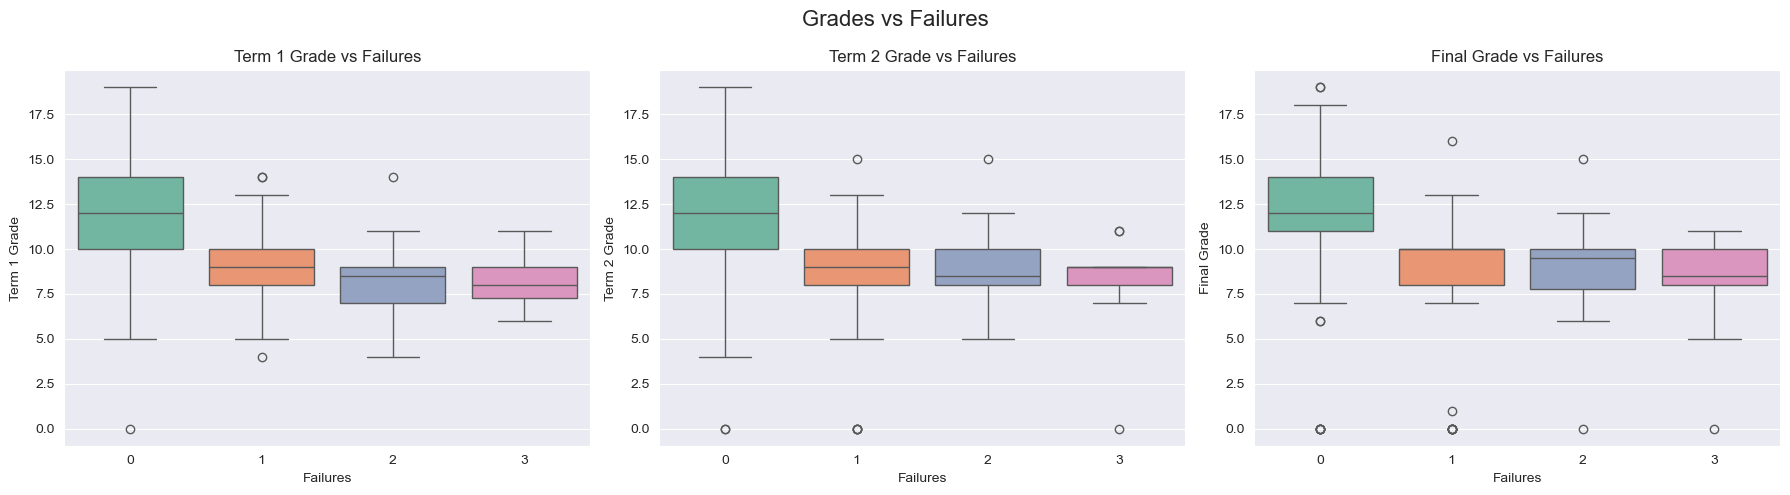

In [190]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
palette = sns.color_palette("Set2")

sns.boxplot(data=df2, x='failures', y='term_1_grade', ax=axes[0],palette=palette)
axes[0].set_title('Term 1 Grade vs Failures')
axes[0].set_xlabel('Failures')
axes[0].set_ylabel('Term 1 Grade')

sns.boxplot(data=df2, x='failures', y='term_2_grade', ax=axes[1],palette=palette)
axes[1].set_title('Term 2 Grade vs Failures')
axes[1].set_xlabel('Failures')
axes[1].set_ylabel('Term 2 Grade')

sns.boxplot(data=df2, x='failures', y='final_grade', ax=axes[2],palette=palette)
axes[2].set_title('Final Grade vs Failures')
axes[2].set_xlabel('Failures')
axes[2].set_ylabel('Final Grade')

fig.suptitle('Grades vs Failures', fontsize=16)
plt.tight_layout()
plt.show()

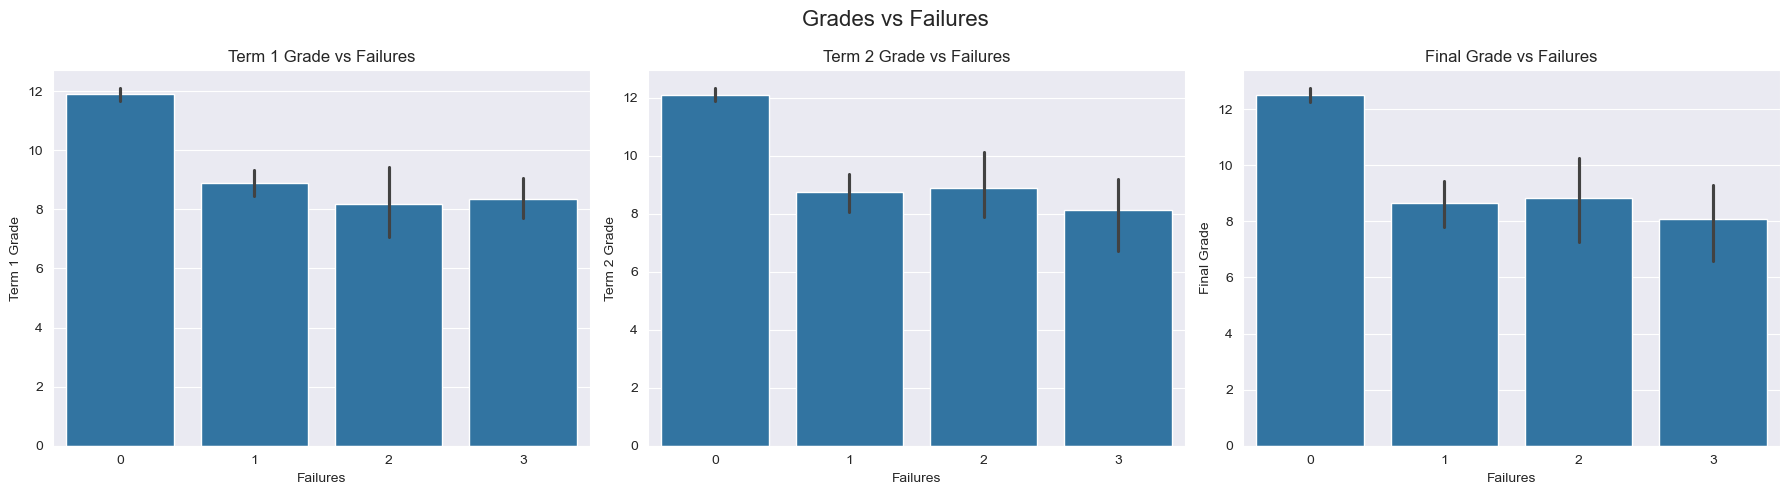

In [191]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df2, x='failures', y='term_1_grade', ax=axes[0])
axes[0].set_title('Term 1 Grade vs Failures')
axes[0].set_xlabel('Failures')
axes[0].set_ylabel('Term 1 Grade')

sns.barplot(data=df2, x='failures', y='term_2_grade', ax=axes[1])
axes[1].set_title('Term 2 Grade vs Failures')
axes[1].set_xlabel('Failures')
axes[1].set_ylabel('Term 2 Grade')

sns.barplot(data=df2, x='failures', y='final_grade', ax=axes[2])
axes[2].set_title('Final Grade vs Failures')
axes[2].set_xlabel('Failures')
axes[2].set_ylabel('Final Grade')

fig.suptitle('Grades vs Failures', fontsize=16)
plt.tight_layout()
plt.show()

The students with no failures have significantly higher grades than students with any number of failures.And on an average grades generally decrease with increase in number of failures.

<h3>Q17. Does friends hangout frequency affect the grades

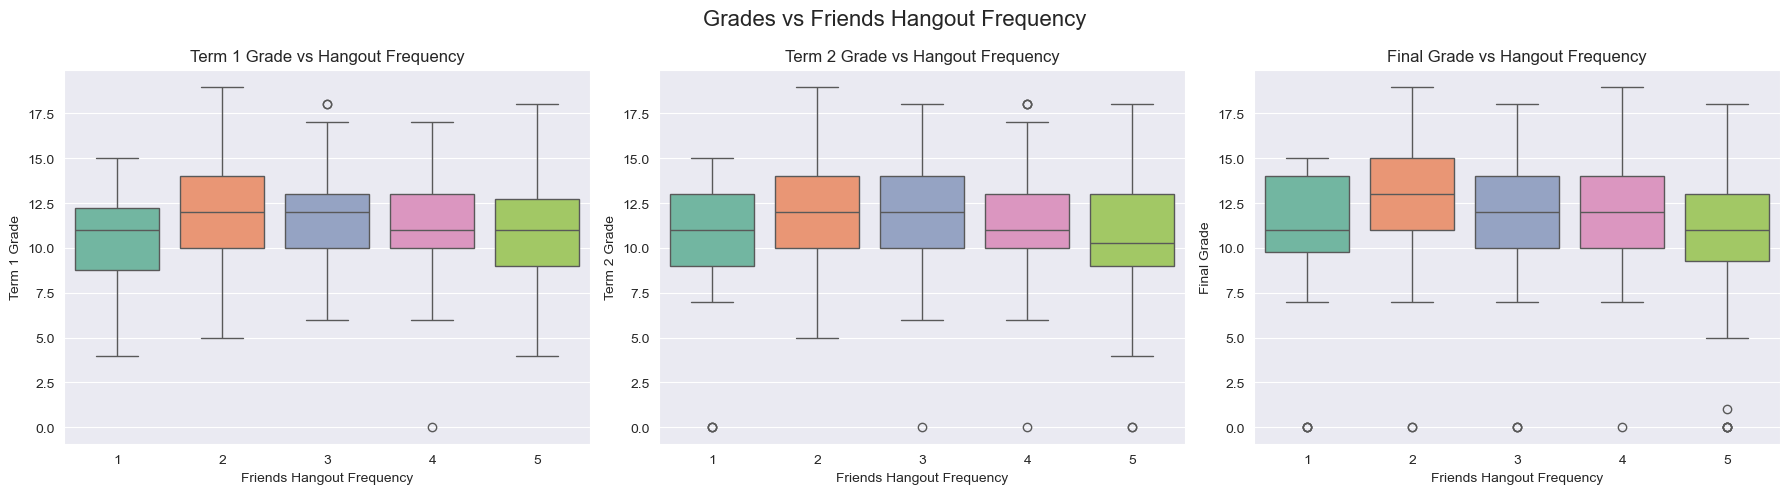

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

palette = sns.color_palette("Set2")

sns.boxplot(data=df2, x='friends_hangout_frequency', y='term_1_grade', ax=axes[0], palette=palette)
axes[0].set_title('Term 1 Grade vs Hangout Frequency')
axes[0].set_xlabel('Friends Hangout Frequency')
axes[0].set_ylabel('Term 1 Grade')

sns.boxplot(data=df2, x='friends_hangout_frequency', y='term_2_grade', ax=axes[1], palette=palette)
axes[1].set_title('Term 2 Grade vs Hangout Frequency')
axes[1].set_xlabel('Friends Hangout Frequency')
axes[1].set_ylabel('Term 2 Grade')

sns.boxplot(data=df2, x='friends_hangout_frequency', y='final_grade', ax=axes[2], palette=palette)
axes[2].set_title('Final Grade vs Hangout Frequency')
axes[2].set_xlabel('Friends Hangout Frequency')
axes[2].set_ylabel('Final Grade')

fig.suptitle('Grades vs Friends Hangout Frequency', fontsize=16)
plt.tight_layout()
plt.show()

There is no clear trend between friends hangout frequency and grades but students with very less friends hangout have generally lower grades as compared the students which balance both factors.

<h3>Q18. Does having home internet mean higher grades

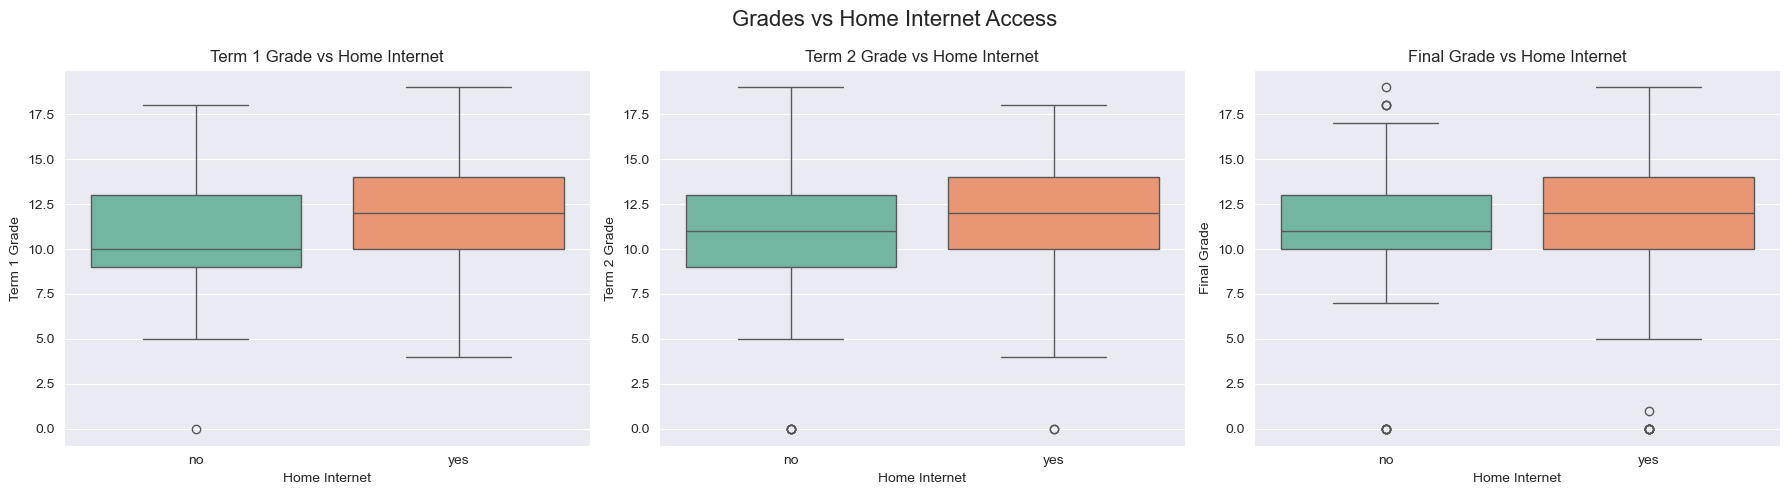

In [193]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='home_internet', y='term_1_grade', ax=axes[0], palette='Set2')
axes[0].set_title('Term 1 Grade vs Home Internet')
axes[0].set_xlabel('Home Internet')
axes[0].set_ylabel('Term 1 Grade')

sns.boxplot(data=df, x='home_internet', y='term_2_grade', ax=axes[1], palette='Set2')
axes[1].set_title('Term 2 Grade vs Home Internet')
axes[1].set_xlabel('Home Internet')
axes[1].set_ylabel('Term 2 Grade')


sns.boxplot(data=df, x='home_internet', y='final_grade', ax=axes[2], palette='Set2')
axes[2].set_title('Final Grade vs Home Internet')
axes[2].set_xlabel('Home Internet')
axes[2].set_ylabel('Final Grade')


fig.suptitle('Grades vs Home Internet Access', fontsize=16)
plt.tight_layout()
plt.show()

Having internet at home can increase the grades by some amount.

<h3>Q19. Is there any correlation between parents education vs internet access at home

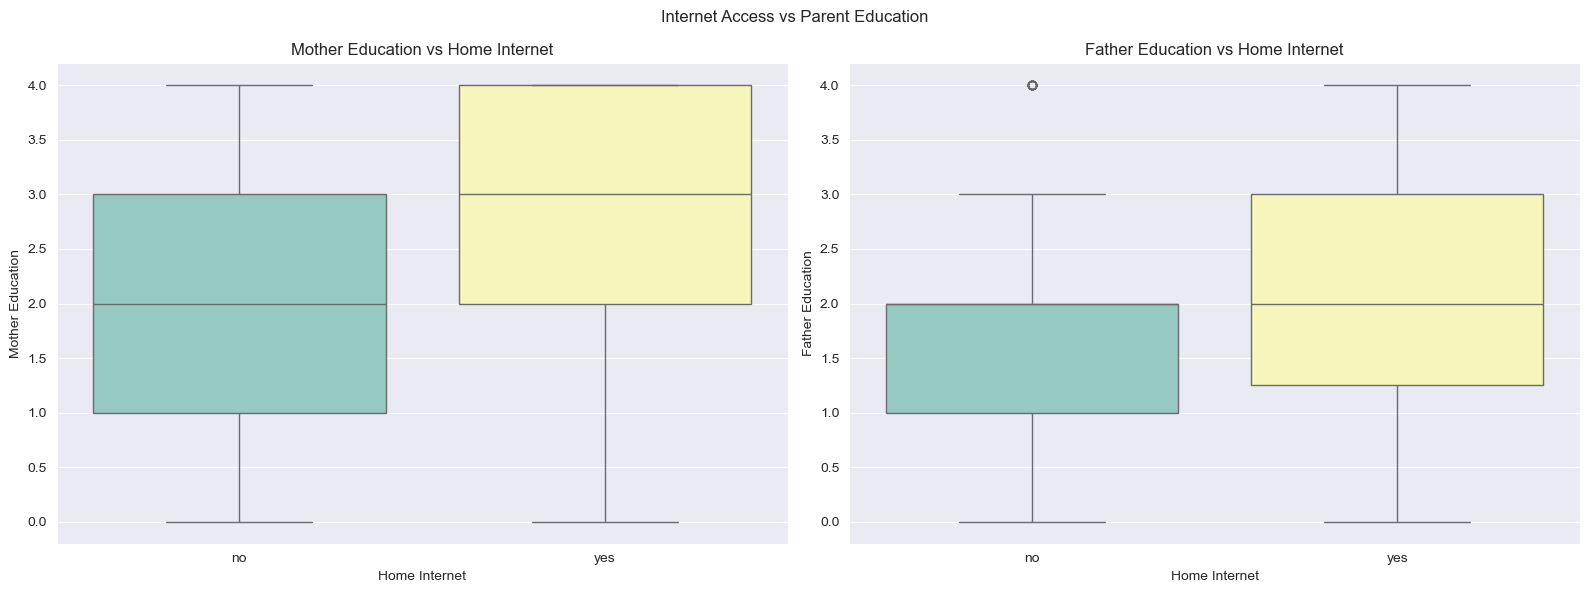

In [194]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='home_internet', y='mother_education', ax=axes[0], palette='Set3')
axes[0].set_title('Mother Education vs Home Internet')
axes[0].set_xlabel('Home Internet')
axes[0].set_ylabel('Mother Education')

sns.boxplot(data=df, x='home_internet', y='father_education', ax=axes[1], palette='Set3')
axes[1].set_title('Father Education vs Home Internet')
axes[1].set_xlabel('Home Internet')
axes[1].set_ylabel('Father Education')

plt.suptitle('Internet Access vs Parent Education')
plt.tight_layout()
plt.show()

In [195]:
px.violin(df2,'home_internet','mother_education',title='Mother Education vs Home Internet', color='home_internet')

In [196]:
px.violin(df2,'home_internet','father_education',title='Father Education vs Home Internet', color='home_internet')

The households with internet access at home in general have higher level of education of parents.

<div align="center"><h2>RelationShip Prediction model

<Axes: >

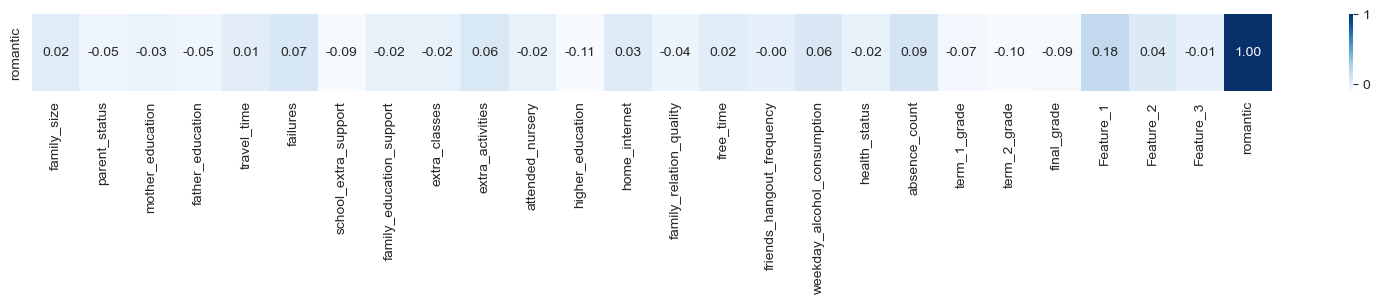

In [198]:
plt.figure(figsize=(20,1))
sns.heatmap(df2.select_dtypes(np.number).corr().loc[['romantic']],annot=True,fmt='.2f',cmap='Blues')

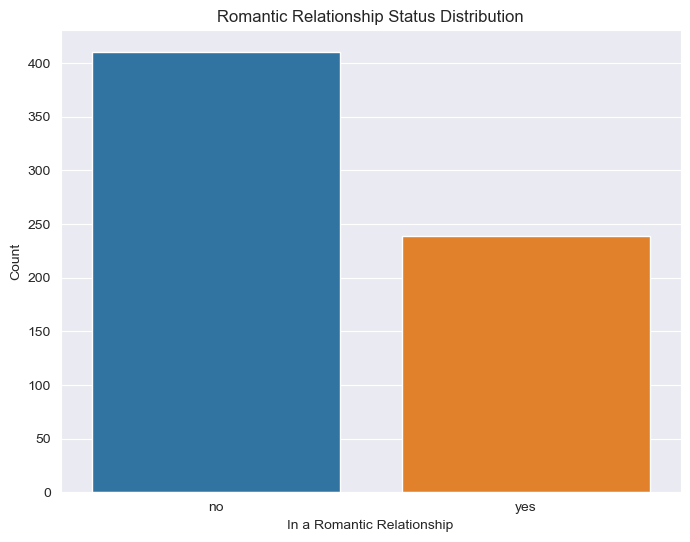

In [199]:
plt.figure(figsize=(8, 6))
sns.countplot(x='romantic', data=df,hue='romantic')
plt.title('Romantic Relationship Status Distribution')
plt.xlabel('In a Romantic Relationship')
plt.ylabel('Count')
plt.show()

<h3>Mostly of the students are not in a romantic relationship

In [200]:
df

school sex address family_size parent_status  mother_education  \
0       GP   F       U         GT3             A                 4   
1       GP   F       U         GT3             T                 1   
2       GP   F       U         LE3             T                 1   
3       GP   F       U         GT3             T                 4   
4       GP   F       U         GT3             T                 3   
..     ...  ..     ...         ...           ...               ...   
644     MS   F       R         GT3             T                 2   
645     MS   F       U         LE3             T                 3   
646     MS   F       U         GT3             T                 1   
647     MS   M       U         LE3             T                 3   
648     MS   M       R         LE3             T                 3   

     father_education mother_job father_job school_reason guardian  \
0                 4.0    at_home    teacher        course   mother   
1                 1.0    at_home      other        course   father   
2                 1.0    at_home      other         other   mother   
3                 2.0     health   services          home   mother   
4                 3.0      other      other          home   father   
..                ...        ...        ...           ...      ...   
644               3.0   services      other        course   mother   
645               1.0    teacher   services        course   mother   
646               1.0      other      other        course   mother   
647               1.0   services   services        course   mother   
648               2.0   services      other        course   mother   

     travel_time  failures school_extra_support family_education_support  \
0            2.0         0                  yes                       no   
1            1.0         0                   no                      yes   
2            1.0         0                  yes                       no   
3            1.0         0                   no                      yes   
4            1.0         0                   no                      yes   
..           ...       ...                  ...                      ...   
644          1.0         1                   no                       no   
645          1.0         0                   no                      yes   
646          2.0         0                   no                       no   
647          2.0         0                   no                       no   
648          3.0         0                   no                       no   

    extra_classes extra_activities attended_nursery higher_education  \
0              no               no              yes              yes   
1              no               no               no              yes   
2              no               no              yes              yes   
3              no              yes              yes              yes   
4              no               no              yes              yes   
..            ...              ...              ...              ...   
644            no              yes               no              yes   
645            no               no              yes              yes   
646            no              yes              yes              yes   
647            no               no               no              yes   
648            no               no               no              yes   

    home_internet  family_relation_quality  free_time  \
0              no                        4        3.0   
1             yes                        5        3.0   
2             yes                        4        3.0   
3             yes                        3        2.0   
4              no                        4        3.0   
..            ...                      ...        ...   
644           yes                        5        4.0   
645           yes                        4        3.0   
646            no              

In [201]:
df2.family_size=df.family_size
df2.parent_status=df.parent_status

In [202]:
df2

school sex address family_size parent_status  mother_education  \
0       GP   F       U         GT3             A                 4   
1       GP   F       U         GT3             T                 1   
2       GP   F       U         LE3             T                 1   
3       GP   F       U         GT3             T                 4   
4       GP   F       U         GT3             T                 3   
..     ...  ..     ...         ...           ...               ...   
644     MS   F       R         GT3             T                 2   
645     MS   F       U         LE3             T                 3   
646     MS   F       U         GT3             T                 1   
647     MS   M       U         LE3             T                 3   
648     MS   M       R         LE3             T                 3   

     father_education mother_job father_job school_reason guardian  \
0                 4.0    at_home    teacher        course   mother   
1                 1.0    at_home      other        course   father   
2                 1.0    at_home      other         other   mother   
3                 2.0     health   services          home   mother   
4                 3.0      other      other          home   father   
..                ...        ...        ...           ...      ...   
644               3.0   services      other        course   mother   
645               1.0    teacher   services        course   mother   
646               1.0      other      other        course   mother   
647               1.0   services   services        course   mother   
648               2.0   services      other        course   mother   

     travel_time  failures  school_extra_support  family_education_support  \
0            2.0         0                     1                         0   
1            1.0         0                     0                         1   
2            1.0         0                     1                         0   
3            1.0         0                     0                         1   
4            1.0         0                     0                         1   
..           ...       ...                   ...                       ...   
644          1.0         1                     0                         0   
645          1.0         0                     0                         1   
646          2.0         0                     0                         0   
647          2.0         0                     0                         0   
648          3.0         0                     0                         0   

     extra_classes  extra_activities  attended_nursery  higher_education  \
0                0                 0                 1               1.0   
1                0                 0                 0               1.0   
2                0                 0                 1               1.0   
3                0                 1                 1               1.0   
4                0                 0                 1               1.0   
..             ...               ...               ...               ...   
644              0                 1                 0               1.0   
645              0                 0                 1               1.0   
646              0                 1                 1               1.0   
647              0                 0                 0               1.0   
648              0                 0                 0               1.0   

     home_internet  family_relation_quality  free_time  \
0                0                        4        3.0   
1                1                        5        3.0   
2                1                        4        3.0   
3                1                        3        2.0   
4                0                        4        3.0   
..             ...                      ...        ...   
644              1                        5        4.0   
645     

<h2>Separating and encoding categorical columns 


In [203]:
categorical_cols=df2.select_dtypes(include='object').columns.tolist()
categorical_cols

['school',
 'sex',
 'address',
 'family_size',
 'parent_status',
 'mother_job',
 'father_job',
 'school_reason',
 'guardian']

In [204]:
numerical_cols=df2.select_dtypes(np.number).columns.tolist()
len(numerical_cols+categorical_cols)==len(df2.columns.tolist())

True

In [205]:
from sklearn.preprocessing import OneHotEncoder

In [206]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [207]:
encoder.fit(df2[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [208]:
encoded_columns = encoder.get_feature_names_out(categorical_cols)

In [209]:
df2[encoded_columns]=encoder.transform(df2[categorical_cols]).toarray()

In [210]:
input_columns=numerical_cols+encoded_columns.tolist()
input_columns.remove('romantic')

In [211]:
df2[input_columns]

mother_education  father_education  travel_time  failures  \
0                   4               4.0          2.0         0   
1                   1               1.0          1.0         0   
2                   1               1.0          1.0         0   
3                   4               2.0          1.0         0   
4                   3               3.0          1.0         0   
..                ...               ...          ...       ...   
644                 2               3.0          1.0         1   
645                 3               1.0          1.0         0   
646                 1               1.0          2.0         0   
647                 3               1.0          2.0         0   
648                 3               2.0          3.0         0   

     school_extra_support  family_education_support  extra_classes  \
0                       1                         0              0   
1                       0                         1              0   
2                       1                         0              0   
3                       0                         1              0   
4                       0                         1              0   
..                    ...                       ...            ...   
644                     0                         0              0   
645                     0                         1              0   
646                     0                         0              0   
647                     0                         0              0   
648                     0                         0              0   

     extra_activities  attended_nursery  higher_education  home_internet  \
0                   0                 1               1.0              0   
1                   0                 0               1.0              1   
2                   0                 1               1.0              1   
3                   1                 1               1.0              1   
4                   0                 1               1.0              0   
..                ...               ...               ...            ...   
644                 1                 0               1.0              1   
645                 0                 1               1.0              1   
646                 1                 1               1.0              0   
647                 0                 0               1.0              1   
648                 0                 0               1.0              1   

     family_relation_quality  free_time  friends_hangout_frequency  \
0                          4        3.0                          4   
1                          5        3.0                          3   
2                          4        3.0                          2   
3                          3        2.0                          2   
4                          4        3.0                          2   
..                       ...        ...                        ...   
644                        5        4.0                          2   
645                        4        3.0                          4   
646                        1        1.0                          1   
647                        2        4.0                          5   
648                        4        4.0                          1   

     weekday_alcohol_consumption  health_status  absence_count  term_1_grade  \
0                              1              3            4.0             0   
1                              1              3            2.0             9   
2                              2              3            6.0            12   
3                              1              5            0.0            14   
4                              1              5            0.0            11   
..                           ...            ...            ...           ...   
644                            1              5          

In [212]:
df2['social_activity']=df2['friends_hangout_frequency']+df2['weekday_alcohol_consumption']+df2['Feature_3']
input_columns.append('social_activity')

<div align="center"><h2>Model training

<h2>Random Forest

In [213]:
model_1=RandomForestClassifier(random_state=42,n_jobs=-1) 

In [214]:
X_train, X_test, y_train, y_test = train_test_split(df2[input_columns], df2['romantic'], test_size=0.2,random_state=0)

In [215]:
df.romantic.value_counts()/len(df.romantic)

romantic
no     0.631741
yes    0.368259
Name: count, dtype: float64

In [216]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [217]:
'romantic' in input_columns

False

In [219]:
hyper_params=[{'n_estimators': [1,5,10,20,50,100,500,1000],'max_features':[None,'log2','auto'], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 'auto'],
                          'n_estimators': [1, 5, 10, 20, 50, 100, 500, 1000]}],
             scoring='f1', verbose=1)

In [ ]:
gscv.best_score_

np.float64(0.4099076569692591)

In [ ]:
hyper_params=[{'n_estimators': [1,5,10,20,50,100,500,1000],'max_features':[None,'log2','auto'], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='roc_auc')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 'auto'],
                          'n_estimators': [1, 5, 10, 20, 50, 100, 500, 1000]}],
             scoring='roc_auc', verbose=1)

In [ ]:
gscv.best_score_

np.float64(0.6111167137286542)

In [ ]:
RandomForestClassifier(max_features=None, n_estimators=1000, n_jobs=-1,
                       random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5307692307692308

In [ ]:
hyper_params=[{'n_estimators': [1,5,10,20,50,100,500,1000],'max_features':[None,'log2','auto'], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 'auto'],
                          'n_estimators': [1, 5, 10, 20, 50, 100, 500, 1000]}],
             scoring='accuracy', verbose=1)

In [ ]:
gscv.best_score_

np.float64(0.6647871545929799)

In [ ]:
gscv.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 50}

In [ ]:
hyper_params=[{'n_estimators': np.arange(100),'max_features':[None,'log2','auto'], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 'auto'],
                          'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='accuracy', verbose=1)

In [ ]:
gscv.best_score_

np.float64(0.680227781926811)

In [ ]:
len(y_test)

130

In [ ]:
yes_array = np.array([1] * 130)
accuracy_score(y_test, yes_array)

0.4230769230769231

In [ ]:
hyper_params=[{'n_estimators': [16],'max_features':[None,'log2','auto',3,4,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 'auto', 3, 4, 5, 6],
                          'n_estimators': [16]}],
             scoring='accuracy', verbose=1)

In [ ]:
hyper_params=[{'n_estimators': np.arange(100),'max_features':[None,'log2','auto',3,4,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 7000 candidates, totalling 35000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 'auto', 3, 4, 5, 6],
                          'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='f1', verbose=1)

In [ ]:
RandomForestClassifier(class_weight='balanced', max_features=3,
                       n_estimators=np.int64(1), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5461538461538461

In [ ]:
RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=16, n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5230769230769231

In [ ]:
RandomForestClassifier(max_features=None, n_estimators=1000, n_jobs=-1,
                       random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5307692307692308

In [ ]:
hyper_params=[{'n_estimators': np.arange(10),'max_features':[None,'log2','auto',3,4,5,6,10], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,1,2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5, 6],
                          'max_features': [None, 'log2', 'auto', 3, 4, 5, 6,
                                           10],
                          'n_estimators': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             scoring='f1', verbose=1)

In [ ]:
RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=10,
                       n_estimators=np.int64(4), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5307692307692308

In [ ]:
hyper_params=[{'n_estimators': np.arange(10),'max_features':[None,'log2','auto',3,4,5,6,10], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,1,2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5, 6],
                          'max_features': [None, 'log2', 'auto', 3, 4, 5, 6,
                                           10],
                          'n_estimators': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             scoring='accuracy', verbose=1)

In [ ]:
RandomForestClassifier(criterion='entropy', max_depth=3, max_features=6,
                       n_estimators=np.int64(3), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5307692307692308

In [ ]:
hyper_params=[{'n_estimators': np.arange(100,500,100),'max_features':[None,'log2','auto',3,4,5,6,7,8,9,10], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,1,2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 3080 candidates, totalling 15400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5, 6],
                          'max_features': [None, 'log2', 'auto', 3, 4, 5, 6, 7,
                                           8, 9, 10],
                          'n_estimators': array([100, 200, 300, 400])}],
             scoring='accuracy', verbose=1)

In [ ]:
RandomForestClassifier(class_weight='balanced', max_features=4,
                       n_estimators=np.int64(300), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5538461538461539

In [ ]:
hyper_params=[{'n_estimators': np.arange(1000),'max_features':[4], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'], 'max_features': [4],
                          'n_estimators': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  3...
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922,
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987,
       988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])}],
             scoring='accuracy', verbose=1)

In [ ]:
RandomForestClassifier(criterion='entropy', max_features=4,
                       n_estimators=np.int64(18), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5692307692307692

In [ ]:
hyper_params=[{'n_estimators': np.arange(100),'max_features':['log2',4], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['log2', 4],
                          'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='accuracy', verbose=1)

In [ ]:
RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=np.int64(16), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5230769230769231

In [ ]:
RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=np.int64(16), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_train, y_train)

0.9980732177263969

In [ ]:
RandomForestClassifier(criterion='entropy', max_features=4,
                       n_estimators=np.int64(18), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_train, y_train)

0.9903660886319846

<div align="center"><h2>Hyperparameter training

In [ ]:
hyper_params=[{'n_estimators': np.arange(5,30,1),'max_features':['log2',1,2,3,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['log2', 1, 2, 3, 5, 6],
                          'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])}],
             scoring='accuracy', verbose=1)

In [ ]:
hyper_params=[{'n_estimators': np.arange(5,30,1),'max_features':[None,'log2',10,20,30,40,50], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1750 candidates, totalling 8750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 10, 20, 30, 40, 50],
                          'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])}],
             scoring='accuracy', verbose=1)

In [ ]:
hyper_params=[{'n_estimators':[16,100,200,300,400,500,600,700,800,900,1000],'max_features':[None,'log2',3,4,5,6,10,20], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 880 candidates, totalling 4400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 3, 4, 5, 6, 10, 20],
                          'n_estimators': [16, 100, 200, 300, 400, 500, 600,
                                           700, 800, 900, 1000]}],
             scoring='accuracy', verbose=1)

In [ ]:
hyper_params=[{'n_estimators': [16],'max_features':[None,'log2',3,4,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,7,8,9,10,11,12,13,14,15]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                          'max_features': [None, 'log2', 3, 4, 5, 6],
                          'n_estimators': [16]}],
             scoring='accuracy', verbose=1)

In [ ]:
hyper_params=[{'n_estimators': [16],'max_features':[None,'log2',3,4,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,1,2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5, 6],
                          'max_features': [None, 'log2', 3, 4, 5, 6],
                          'n_estimators': [16]}],
             scoring='accuracy', verbose=1)

In [ ]:
hyper_params=[{'n_estimators': [16],'max_features':[None,'log2',3,4,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,16,17,18,19,20,21,22,23,24,25]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 660 candidates, totalling 3300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25],
                          'max_features': [None, 'log2', 3, 4, 5, 6],
                          'n_estimators': [16]}],
             scoring='accuracy', verbose=1)

In [ ]:
RandomForestClassifier(criterion='entropy', max_depth=22, max_features='log2',
                       n_estimators=16, n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5230769230769231

In [ ]:
hyper_params=[{'n_estimators': np.arange(5,30,1),'max_features':['log2'], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,16,17,18,19,20,21,22,23,24,25]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 2750 candidates, totalling 13750 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25],
                          'max_features': ['log2'],
                          'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])}],
             scoring='accuracy', verbose=1)

In [ ]:
RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=np.int64(14), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5384615384615384

In [ ]:
hyper_params=[{'n_estimators': np.arange(5,20,1),'max_features':['log2'], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,16,17,18,19,20,21,22,23,24,25],'max_leaf_nodes':[None,128]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 3300 candidates, totalling 16500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25],
                          'max_features': ['log2'],
                          'max_leaf_nodes': [None, 128],
                          'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}],
             scoring='accuracy', verbose=1)

In [ ]:
hyper_params=[{'n_estimators': np.arange(100),'max_features':[None,'log2',6,8,10,12,15,20,30], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 6, 8, 10, 12, 15, 20,
                                           30],
                          'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='f1', verbose=1)

In [ ]:
RandomForestClassifier(class_weight='balanced', max_features=8,
                       n_estimators=np.int64(3), n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5461538461538461

In [ ]:
hyper_params=[{'n_estimators': np.arange(10),'max_features':[8,9,40,45,50], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None],'max_depth':[None,1,2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 3500 candidates, totalling 17500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5, 6],
                          'max_features': [8, 9, 40, 45, 50],
                          'n_estimators': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             scoring='f1', verbose=1)

In [ ]:
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, max_features=9, n_estimators=np.int64(4),
                       n_jobs=-1, random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.49230769230769234

In [ ]:
hyper_params=[{'n_estimators': [500,600,700,800,900,1000,1200,1400],'max_features':[None,'log2','auto',4,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 2},{'No': 1, 'Yes': 3},None]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='roc_auc')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', {'No': 1, 'Yes': 1},
                                           {'No': 1, 'Yes': 2},
                                           {'No': 1, 'Yes': 3}, None],
                          'criterion': ['gini', 'entropy'],
                          'max_features': [None, 'log2', 'auto', 4, 5, 6],
                          'n_estimators': [500, 600, 700, 800, 900, 1000, 1200,
                                           1400]}],
             scoring='roc_auc', verbose=1)

In [ ]:
RandomForestClassifier(max_features=None, n_estimators=800, n_jobs=-1,
                       random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5461538461538461

In [ ]:
hyper_params=[{'n_estimators': [100,300,500,600,700,800,900,1000,1200,1400],'max_features':[None,'log2','auto',4,5,6], 'criterion':['gini','entropy'],'class_weight':['balanced',None],'max_depth':[None,1,2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='roc_auc')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5, 6],
                          'max_features': [None, 'log2', 'auto', 4, 5, 6],
                          'n_estimators': [100, 300, 500, 600, 700, 800, 900,
                                           1000, 1200, 1400]}],
             scoring='roc_auc', verbose=1)

In [ ]:
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=1, max_features='log2', n_jobs=-1,
                       random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5461538461538461

In [ ]:
hyper_params=[{'n_estimators': [18,19,20],'max_features':[None,'log2',4,5,6], 'criterion':['entropy'],'class_weight':['balanced',None],'max_depth':[None,1,2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV

gscv=GridSearchCV(model_1, hyper_params, cv=5, verbose=1, n_jobs=-1,scoring='roc_auc')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid=[{'class_weight': ['balanced', None],
                          'criterion': ['entropy'],
                          'max_depth': [None, 1, 2, 3, 4, 5, 6],
                          'max_features': [None, 'log2', 4, 5, 6],
                          'n_estimators': [18, 19, 20]}],
             scoring='roc_auc', verbose=1)

In [ ]:
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=6, n_estimators=19, n_jobs=-1,
                       random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.5076923076923077

<div align="center"><h2>Selecting two models after hyperparameter tuning


<h1>MODEL_1


In [226]:
model_1=RandomForestClassifier(criterion='entropy', max_features=4,
                       n_estimators=np.int64(18), n_jobs=-1, random_state=42)

In [240]:
model_1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=4,
                       n_estimators=np.int64(18), n_jobs=-1, random_state=42)

In [ ]:
model_1.score(X_test, y_test)

0.5692307692307692

In [ ]:
f1_score(y_test, model_1.predict(X_test))

0.2

<h1>MODEL_2

In [227]:
model_2=RandomForestClassifier(class_weight='balanced', max_features=8,
                       n_estimators=np.int64(3), n_jobs=-1, random_state=42)

In [241]:
model_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=8,
                       n_estimators=np.int64(3), n_jobs=-1, random_state=42)

In [ ]:
model_2.score(X_test, y_test)

0.5461538461538461

In [ ]:
f1_score(y_test, model_2.predict(X_test))

0.3058823529411765

In [ ]:
roc_auc_score(y_test, model_1.predict_proba(X_test)[:,1])

np.float64(0.4934545454545454)

In [ ]:
roc_auc_score(y_test, model_2.predict_proba(X_test)[:,1])

np.float64(0.5195151515151515)

<div align="center"><h2>Logistic Regression

<h1>MODEL_3

In [228]:
from sklearn.linear_model import LogisticRegression
model_3=LogisticRegression(solver='liblinear')

In [239]:
model_3.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
model_3.score(X_test, y_test)

0.5846153846153846

In [ ]:
f1_score(y_test, model_3.predict(X_test))

0.325

In [ ]:
roc_auc_score(y_test, model_3.predict_proba(X_test)[:,1])

np.float64(0.5323636363636364)

<h3>Hyperparameter training

In [ ]:
hyper_params_2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'], 
    'max_iter': [1000, 5000]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=model_3,
    param_grid=hyper_params_2,
    cv=5,
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 5000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [ ]:
LogisticRegression(C=1, max_iter=1000, solver='saga').fit(X_train, y_train).score(X_test, y_test)

0.5846153846153846

In [ ]:
hyper_params_2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'], 
    'max_iter': [1000, 5000,None]
}
grid_search = GridSearchCV(
    estimator=model_3,
    param_grid=hyper_params_2,
    cv=5,
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 5000, None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [ ]:
hyper_params_2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'], 
    'max_iter': [1000, 5000,None]
}
grid_search = GridSearchCV(
    estimator=model_3,
    param_grid=hyper_params_2,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 5000, None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
LogisticRegression(C=0.01, max_iter=5000, solver='saga').fit(X_train, y_train).score(X_test, y_test)

0.5538461538461539

In [ ]:
LogisticRegression(C=0.01, max_iter=5000, solver='saga').fit(X_train, y_train).score(X_train, y_train)

0.6897880539499036

In [ ]:
LogisticRegression(C=1, max_iter=1000, solver='saga').fit(X_train, y_train).score(X_train, y_train)

0.6994219653179191

In [ ]:
f1_score(y_test,LogisticRegression(C=1, max_iter=1000, solver='saga').fit(X_train, y_train).predict(X_test))

0.325

In [ ]:
LogisticRegression(C=1, max_iter=1000, solver='saga').fit(X_test, y_test).score(X_test, y_test)

0.7384615384615385

In [ ]:
f1_score(y_test,LogisticRegression(C=0.01, max_iter=5000, solver='saga').fit(X_train, y_train).predict(X_test))

0.06451612903225806

In [ ]:
roc_auc_score(y_test, LogisticRegression(C=1, max_iter=1000, solver='saga').fit(X_train, y_train).predict(X_test))

np.float64(0.5381818181818181)

In [ ]:
roc_auc_score(y_test, LogisticRegression(solver='liblinear').fit(X_train, y_train).predict(X_test))

np.float64(0.5381818181818181)

<div align="center"><h2>XGBoost Classifier

In [ ]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.1/150.0 MB 5.9 MB/s eta 0:00:26
    --------------------------------------- 3.7/150.0 MB 6.1 MB/s eta 0:00:25
   - -------------------------------------- 5.0/150.0 MB 6.0 MB/s eta 0:00:24
   - -------------------------------------- 6.3/150.0 MB 6.0 MB/s eta 0:00:24
   - -------------------------------------- 6.6/150.0 MB 5.4 MB/s eta 0:00:27
   - -------------------------------------- 6.8/150.0 MB 4.9 MB/s eta 0:00:30
   - -------------------------------------- 7.1/150.0 MB 4.5 MB/s eta 0:00:33
   - -------------------------------------- 7.3/150.0 MB 3.9 MB/s eta 0:00:37
   -- ------------------------------------- 7.6/150.0 MB 3.8 MB/s eta 0:00:38
   -- ------------------------------------- 7.9/150.0 MB 3.6 MB/s eta 0:00:40
   -- ------------------------------------- 8.1/150.0 MB 3.2 MB/s eta 0

In [231]:
import xgboost

In [230]:
from xgboost import XGBClassifier

<h1>MODEL_4

In [232]:
model_4=XGBClassifier(random_state=42,n_jobs=-1)

In [242]:
model_4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
model_4.score(X_test, y_test)

0.5230769230769231

In [ ]:
f1_score(y_test, model_4.predict(X_test))

0.27906976744186046

In [ ]:
from sklearn.model_selection import GridSearchCV

<h2>Hyperparameter training

In [ ]:
parameters = {
'n_estimators': [50, 100, 200, 500, 1000,None],
'learning_rate': [0.1, 0.3, 0.6, 0.8, 1.0,None],
'max_depth': [1, 3, 6, 10,None],
'reg_alpha':[0.0, 0.1, 0.5, 1.0,None],
'reg_lambda': [0.1, 0.5, 1.0, 1.5,None]

}
grid=GridSearchCV(XGBClassifier(random_state=42,n_jobs=-1),parameters,cv=5, verbose=1, n_jobs=-1,scoring='f1')

grid.fit(X_train,y_train)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.8, 1.0, None],
                         'max_depth': [1, 3, 6, 10, None],
                         'n_estimators': [50, 100, 200, 500, 1000, None],
                         'reg_alpha': [0.0, 0.1, 0.5, 1.0, None],
                         'reg_lambda': [0.1, 0.5, 1.0, 1.5, None]},
             scoring='f1', verbose=1)

In [ ]:
grid.score(X_test, y_test)

0.2988505747126437

In [ ]:
f1_score(y_test, grid.predict(X_test))

0.2988505747126437

In [ ]:
parameters = {
'n_estimators': [50, 100, 200, 500, 1000,None],
'learning_rate': [0.1, 0.3, 0.6, 0.8, 1.0,None],
'max_depth': [1, 3, 6, 10,None],
'reg_alpha':[0.0, 0.1, 0.5, 1.0,None],
'reg_lambda': [0.1, 0.5, 1.0, 1.5,None]

}
grid=GridSearchCV(XGBClassifier(random_state=42,n_jobs=-1),parameters,cv=5, verbose=1, n_jobs=-1,scoring='accuracy')

grid.fit(X_train,y_train)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.8, 1.0, None],
                         'max_depth': [1, 3, 6, 10, None],
                         'n_estimators': [50, 100, 200, 500, 1000, None],
                         'reg_alpha': [0.0, 0.1, 0.5, 1.0, None],
                         'reg_lambda': [0.1, 0.5, 1.0, 1.5, None]},
             scoring='accuracy', verbose=1)

In [ ]:
grid.score(X_test, y_test)

0.5461538461538461

In [ ]:
f1_score(y_test, grid.predict(X_test))

0.11940298507462686

In [ ]:
parameters = {
'n_estimators': [50, 100, 200, 500, 1000,None],
'learning_rate': [0.1, 0.3, 0.6, 0.8, 1.0,None],
'max_depth': [1, 3, 6, 10,None],
'reg_alpha':[0.0, 0.1, 0.5, 1.0,None],
'reg_lambda': [0.1, 0.5, 1.0, 1.5,None]

}
grid=GridSearchCV(XGBClassifier(random_state=42,n_jobs=-1),parameters,cv=5, verbose=1, n_jobs=-1,scoring='roc_auc')

grid.fit(X_train,y_train)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.8, 1.0, None],
                         'max_depth': [1, 3, 6, 10, None],
                         'n_estimators': [50, 100, 200, 500, 1000, None],
                         'reg_alpha': [0.0, 0.1, 0.5, 1.0, None],
                         'reg_lambda': [0.1, 0.5, 1.0, 1.5, None]},
             scoring='roc_auc', verbose=1)

In [ ]:
grid.score(X_test, y_test)

np.float64(0.5197575757575758)

In [ ]:
print(roc_auc_score(y_test, model_3.predict(X_test)),f1_score(y_test, model_3.predict(X_test)),accuracy_score(y_test, model_3.predict(X_test)))

0.5381818181818181 0.325 0.5846153846153846


In [ ]:
print(roc_auc_score(y_test, model_1.predict(X_test)),f1_score(y_test, model_1.predict(X_test)),accuracy_score(y_test, model_1.predict(X_test)))

0.5103030303030303 0.2 0.5692307692307692


In [ ]:
print(roc_auc_score(y_test, model_2.predict(X_test)),f1_score(y_test, model_2.predict(X_test)),accuracy_score(y_test, model_2.predict(X_test)))

0.5048484848484848 0.3058823529411765 0.5461538461538461


In [ ]:
print(roc_auc_score(y_test, model_4.predict(X_test)),f1_score(y_test, model_4.predict(X_test)),accuracy_score(y_test, model_4.predict(X_test)))

0.48242424242424237 0.27906976744186046 0.5230769230769231


<h3>Finally selected 4 model -RandomForest->model_1,model_2, LogisticRegression-model_3, XBGclassifier-model_4

<div align="center"><h2>SHAP ANALYSIS

In [233]:
import shap
shap.initjs()

In [236]:
model_3

LogisticRegression(solver='liblinear')

In [243]:
explainer_3 = shap.Explainer(model_3, X_train)
shap_values_3 = explainer_3(X_test)

In [244]:
shap_values_3.shape

(130, 51)

<h2>Feature importance for model_3

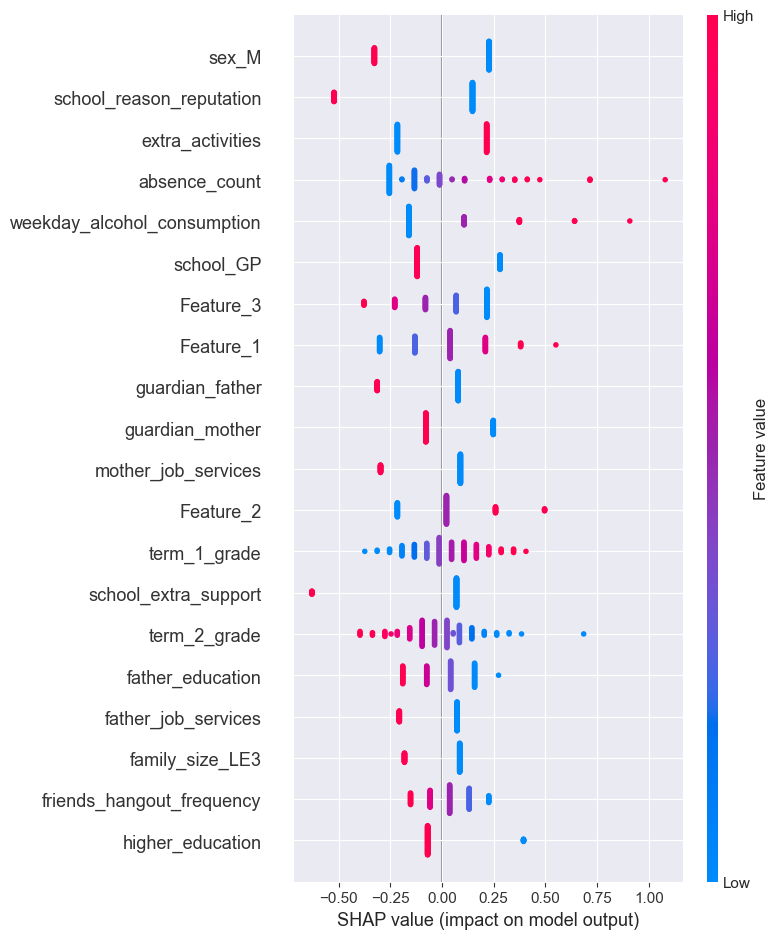

In [245]:
shap.summary_plot(shap_values_3, X_test)

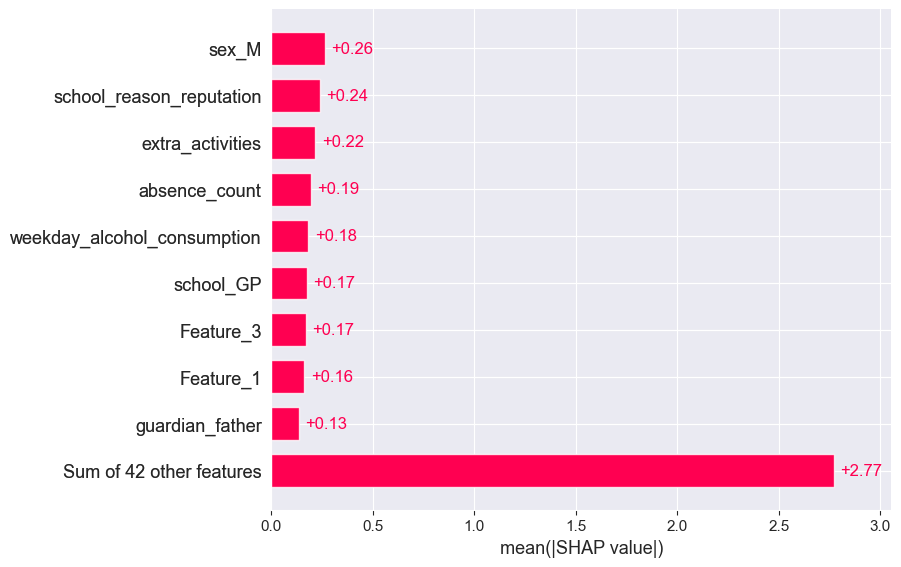

In [247]:
shap.plots.bar(shap_values_3)

In [248]:
explainer_2=shap.TreeExplainer(model_2, X_train)
shap_values_2 = explainer_2(X_test)

<h2>Feature importance for model_2

In [249]:
shap_values_2.shape

(130, 51, 2)

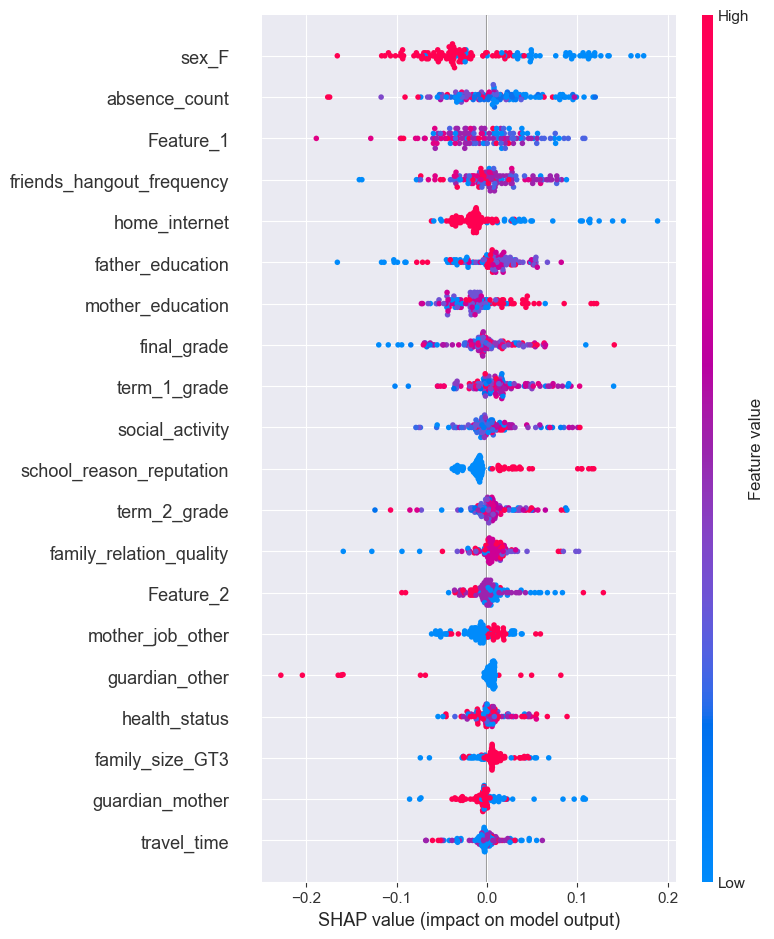

In [250]:
shap.summary_plot(shap_values_2[:,:,0], X_test)

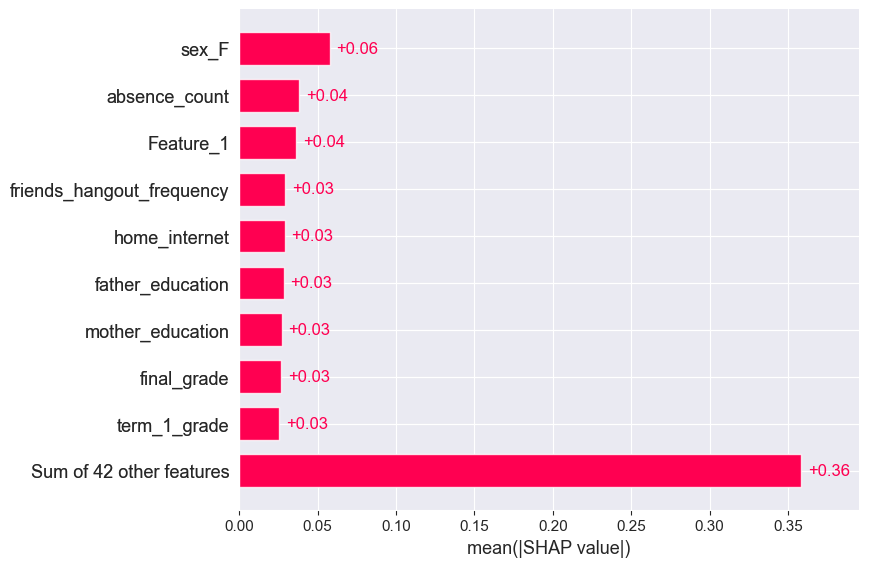

In [251]:
shap.plots.bar(shap_values_2[:,:,0])

<h2>Feature importance for model_4

In [252]:
explainer_4 = shap.TreeExplainer(model_4, X_train)
shap_values_4 = explainer_4(X_test)
shap_values_4.shape

(130, 51)

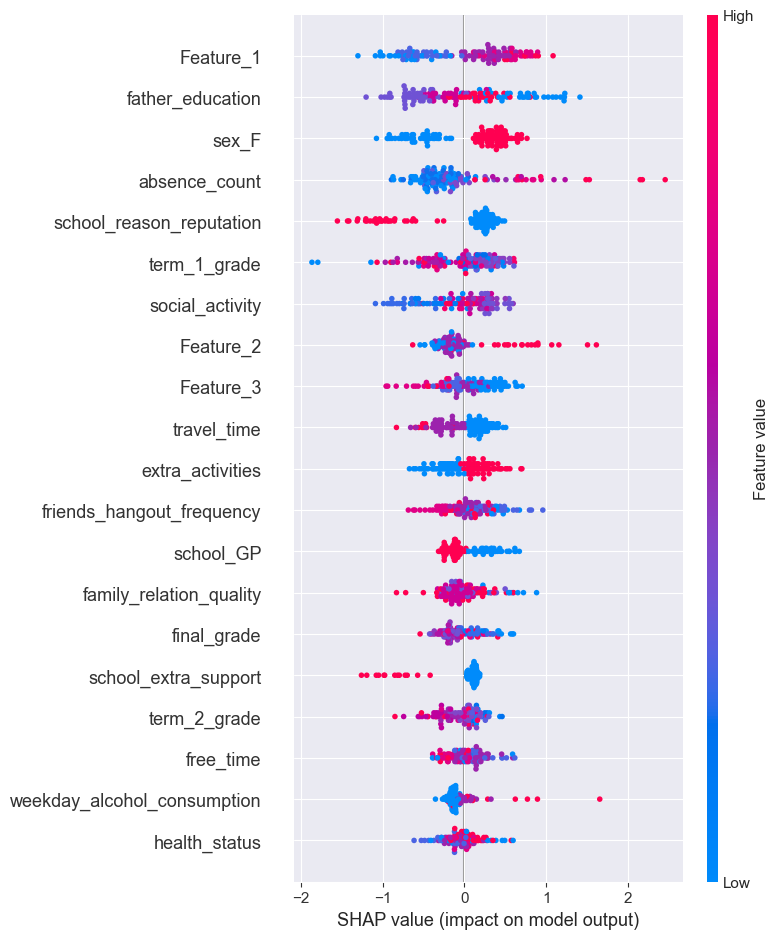

In [253]:
shap.summary_plot(shap_values_4, X_test)

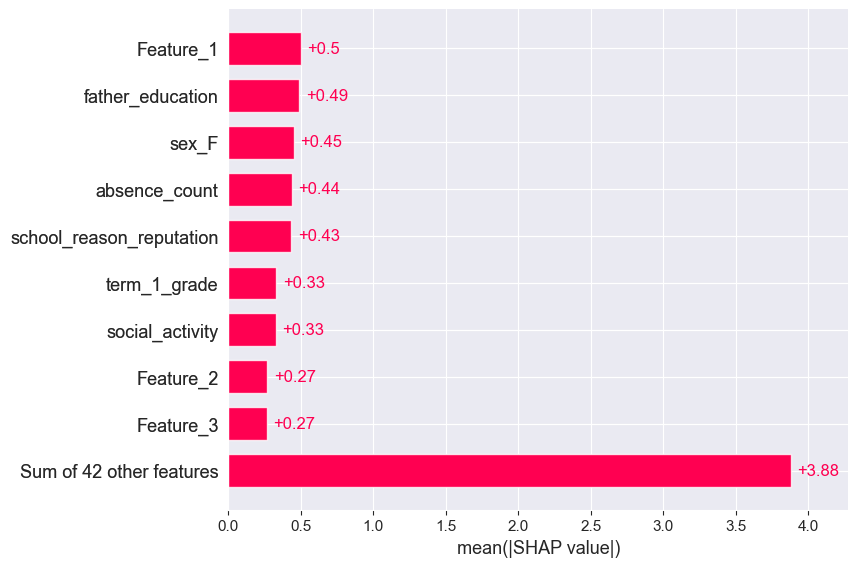

In [254]:
shap.plots.bar(shap_values_4)

<h2>Decision boundary between 2 important features for Logistic Regression model

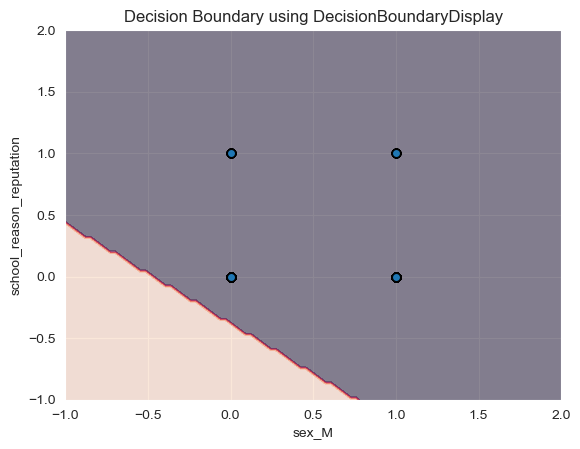

In [257]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Generate dataset
X_3, y_3 = X_train[['sex_M', 'school_reason_reputation']].values, y_train


# Train logistic regression
classifier_3 = LogisticRegression(solver='liblinear').fit(X_3, y_3)


disp = DecisionBoundaryDisplay.from_estimator(
    classifier_3, X_3, 
    response_method="predict",
    xlabel="sex_M", 
    ylabel="school_reason_reputation",
    alpha=0.5,
)

# Add scatter plot of actual data points
disp.ax_.scatter(X_3[:, 0], X_3[:, 1], edgecolor="k")
plt.title('Decision Boundary using DecisionBoundaryDisplay')
plt.show()


<h2>Decision boundary by taking three pairs of feature with one feature(sex_F) common in all features for model_2

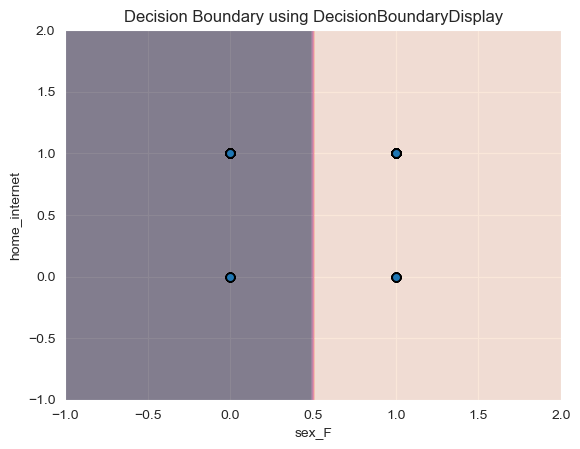

In [258]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Generate dataset
X_2, y_2 = X_train[['sex_F', 'home_internet']].values, y_train


# Train logistic regression
classifier_2 =RandomForestClassifier(class_weight='balanced', max_features=8,
                       n_estimators=np.int64(3), n_jobs=-1, random_state=42).fit(X_2, y_2) 

# Create decision boundary display
disp = DecisionBoundaryDisplay.from_estimator(
    classifier_2, X_2, 
    response_method="predict",
    xlabel="sex_F", 
    ylabel="home_internet",
    alpha=0.5,
)

# Add scatter plot of actual data points
disp.ax_.scatter(X_2[:, 0], X_2[:, 1], edgecolor="k")
plt.title('Decision Boundary using DecisionBoundaryDisplay')
plt.show()

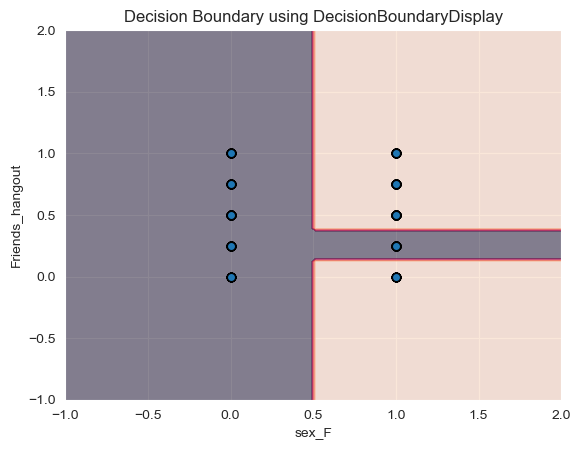

In [259]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
# Generate dataset
X_2, y_2 = X_train[['sex_F', 'friends_hangout_frequency']].values, y_train
X_2[:,1]=(scalar.fit_transform(X_2[:,1].reshape(-1,1))).reshape(519,)

# Train logistic regression
classifier_2 =RandomForestClassifier(class_weight='balanced', max_features=8,
                       n_estimators=np.int64(3), n_jobs=-1, random_state=42).fit(X_2, y_2) 

# Create decision boundary display
disp = DecisionBoundaryDisplay.from_estimator(
    classifier_2, X_2, 
    response_method="predict",
    xlabel="sex_F", 
    ylabel="Friends_hangout",
    alpha=0.5,
)

# Add scatter plot of actual data points
disp.ax_.scatter(X_2[:, 0], X_2[:, 1], edgecolor="k")
plt.title('Decision Boundary using DecisionBoundaryDisplay')
plt.show()

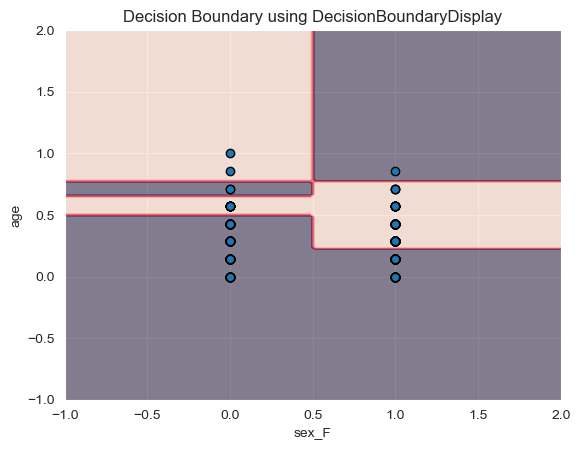

In [260]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Generate dataset
X_2, y_2 = X_train[['sex_F', 'Feature_1']].values, y_train
X_2[:,1]=(scalar.fit_transform(X_2[:,1].reshape(-1,1))).reshape(519,)


# Train logistic regression
classifier_2 =RandomForestClassifier(class_weight='balanced', max_features=8,
                       n_estimators=np.int64(3), n_jobs=-1, random_state=42).fit(X_2, y_2) 

# Create decision boundary display
disp = DecisionBoundaryDisplay.from_estimator(
    classifier_2, X_2, 
    response_method="predict",
    xlabel="sex_F", 
    ylabel="age",
    alpha=0.5,
)

# Add scatter plot of actual data points
disp.ax_.scatter(X_2[:, 0], X_2[:, 1], edgecolor="k")
plt.title('Decision Boundary using DecisionBoundaryDisplay')
plt.show()

<h2>Decision boundary between 2 important features for XGBClassifier model

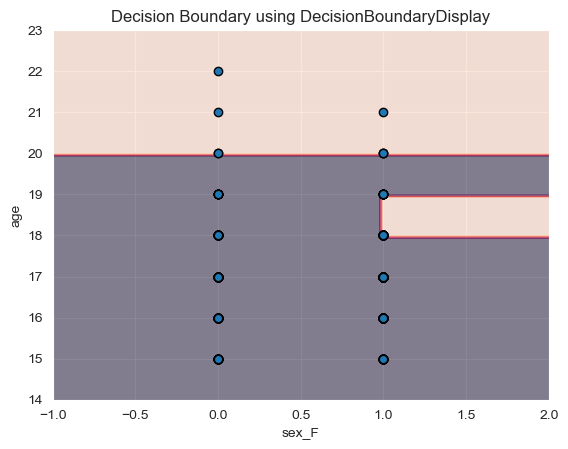

In [261]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Generate dataset
X_4, y_4 = X_train[['sex_F', 'Feature_1']].values, y_train
# X_4[:,1]=(scalar.fit_transform(X_4[:,1].reshape(-1,1))).reshape(519,)


# Train logistic regression
classifier_4 =XGBClassifier(random_state=42,n_jobs=-1).fit(X_4, y_4) 

# Create decision boundary display
disp = DecisionBoundaryDisplay.from_estimator(
    classifier_4, X_4, 
    response_method="predict",
    xlabel="sex_F", 
    ylabel="age",
    alpha=0.5,
)

# Add scatter plot of actual data points
disp.ax_.scatter(X_4[:, 0], X_4[:, 1], edgecolor="k")
plt.title('Decision Boundary using DecisionBoundaryDisplay')
plt.show()

In [262]:
shap_values_3.shape

(130, 51)

In [263]:
explainer_3.expected_value

np.float64(-0.6420611411020973)

<h2>Selecting two predicted values one positive and one negative for logistic regression model and exploring

In [264]:
pd.DataFrame(model_3.predict_proba(X_test)).sort_values(by=1, ascending=False).head(10)

0         1
57   0.223804  0.776196
36   0.227209  0.772791
120  0.229229  0.770771
95   0.264787  0.735213
55   0.276505  0.723495
118  0.299520  0.700480
29   0.304123  0.695877
39   0.311070  0.688930
4    0.315047  0.684953
68   0.323313  0.676687

In [265]:
pd.DataFrame(model_3.predict_proba(X_test)).sort_values(by=1).head(10)

0         1
67   0.935177  0.064823
20   0.931204  0.068796
93   0.917286  0.082714
109  0.913960  0.086040
123  0.894754  0.105246
50   0.892699  0.107301
9    0.889408  0.110592
74   0.886955  0.113045
92   0.875754  0.124246
80   0.874599  0.125401

In [266]:
model_3.predict(X_test)[57]

np.int64(1)

<h3>In a relationship

In [267]:
shap.force_plot(explainer_3.expected_value, shap_values_3[57].values, X_test.iloc[57])

<h3>Not in a relationship

In [268]:
shap.force_plot(explainer_3.expected_value, shap_values_3[67].values, X_test.iloc[67])

<h2>Selecting two predicted values one positive and one negative for RandomForest model and exploring

In [269]:
print(pd.DataFrame(model_2.predict_proba(X_test)).sort_values(by=1, ascending=False).head(10))
print(pd.DataFrame(model_2.predict_proba(X_test)).sort_values(by=1).head(10))

            0         1
36   0.000000  1.000000
21   0.000000  1.000000
116  0.000000  1.000000
82   0.333333  0.666667
94   0.333333  0.666667
18   0.333333  0.666667
27   0.333333  0.666667
23   0.333333  0.666667
32   0.333333  0.666667
14   0.333333  0.666667
      0    1
1   1.0  0.0
4   1.0  0.0
11  1.0  0.0
9   1.0  0.0
15  1.0  0.0
42  1.0  0.0
37  1.0  0.0
34  1.0  0.0
48  1.0  0.0
52  1.0  0.0


In [270]:
shap_values_2.shape

(130, 51, 2)

<h3>In a relationship

In [271]:
shap.plots.force(explainer_2.expected_value[1], shap_values_2[36,:,1].values, X_test.iloc[36])

<h3>Not in a relationship


In [272]:
shap.plots.force(explainer_2.expected_value[0], shap_values_2[1,:,0].values, X_test.iloc[1])